# DEFAULTS

In [1]:
# === Magic =======================================================================================

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # adjust the width of the window too 100% creen size in this notebook 

# === Package reloading ============================================================================

%load_ext autoreload
%autoreload 2

# === Plot settings ============================================================================

%config InlineBackend.figure_formats = 'svg'
%matplotlib inline


# === Third party imports ==========================================================================

import pickle as pkl
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import os

# === Function/packages imports ===================================================================

from uncertainties import ufloat, unumpy, wrap
from collections import defaultdict
from scipy import stats
from scipy.odr import Data, RealData, Model, ODR

# === Projekt imports ============================================================================

import weac

C:\Users\walet\AppData\Local\Temp\ipykernel_8936\762919259.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
from datetime import datetime

from uncertainties import ufloat, unumpy, wrap
from collections import defaultdict
from scipy import stats
from scipy.odr import Data, RealData, Model, ODR

workspace = "C:\\Users\\walet\\Desktop\\April_Hackathon_2025\\2023_PST_DICE\\2023_PST_optimization_results\\"
save_fig_path = "C:\\Users\\walet\\Desktop\\April_Hackathon_2025\\Fracture_envelope_plots\\"

In [3]:
import regression as reg

In [6]:
colors_paper1 = ["#d3a836",
"#ce1b30",
"#447cab",
"#89c9d9",
"#77664c",
"#c99076",
"#69a0c5",
"#2d5a7d"]

In [8]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


# FUNCTIONS

In [7]:
# Bergfeld function
def bergfeld(rho, rho0=917, C0=6.5, C1=4.4):
    """
    Compute Young's modulus from density according to Bergfeld et al. (2023).
    
    Arguments
    ---------
    rho : float or ndarray
        Density (kg/m^3).
    rho0 : float, optional
        Density of ice (kg/m^3). Default is 917.
    C0 : float, optional
        Multiplicative constant of Young modulus parametrization
        according to Bergfeld et al. (2023). Default is 6.5.
    C1 : float, optional
        Exponent of Young modulus parameterization according to
        Bergfeld et al. (2023). Default is 4.4.
    
    Returns
    -------
    E : float or ndarray
        Young's modulus (MPa).
    """
    return C0 * 1000 * (rho/rho0)**C1

# IMPORT DATA

In [410]:
df = pd.read_excel(workspace + "df_with_fracture_toughness_final_incl_bendingstiffness.xlsx")
df.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        exp_id       date  \
0             0             0           0  2023_02_15_1 2023-02-15   
1             1             1           1  2023_02_15_2 2023-02-15   
2             2             2           2  2023_02_15_3 2023-02-15   
3             3             3           3  2023_02_15_4 2023-02-15   
4             4             4           4  2023_02_15_5 2023-02-15   

   datetime_x  fieldsite   slope_incl  h_wl_notch  h_wl_sledge  ...  \
0  2023-02-15          2    0.0+/-2.0        13.5          8.3  ...   
1  2023-02-15          2  -46.0+/-2.0        12.5          8.3  ...   
2  2023-02-15          2  -56.0+/-2.0        13.0          8.3  ...   
3  2023-02-15          2  -36.0+/-2.0        13.0          8.3  ...   
4  2023-02-15          2  -25.0+/-2.0        12.5          8.3  ...   

   GIc_video_seriesopt  GIIc_video_seriesopt  Gc_video_seriesopt  \
0          0.28+/-0.06       0.0140+/-0.0034         0.30+/-0.06   
1          0.27+/-0.07           0.25+/-0.05         0.52+/-0.11   
2          0.32+/-0.10           0.47+/-0.09         0.80+/-0.16   
3          0.37+/-0.09           0.20+/-0.04         0.57+/-0.12   
4          0.18+/-0.05         0.062+/-0.016         0.24+/-0.06   

   GIIG_video_seriesopt E_wl_series_opt C1_series_opt ci1_series_opt  \
0         0.047+/-0.009           0.551         5.197          0.001   
1           0.48+/-0.06           0.551         5.197          0.001   
2           0.59+/-0.07           0.551         5.197          0.001   
3           0.36+/-0.04           0.551         5.197          0.001   
4           0.26+/-0.04           0.551         5.197          0.001   

  ci2_series_opt    DII_video_series_opt     DII_manual_default  
0          0.002   2818518.782009967+/-0  7268239.250016471+/-0  
1          0.002   2789893.515151375+/-0  6961788.959660842+/-0  
2          0.002  3233691.8527471637+/-0  8016467.997014966+/-0  
3          0.002   2556346.436529965+/-0  6593843.146850312+/-0  
4          0.002  2587864.9304773933+/-0  6525249.561940514+/-0  

[5 rows x 82 columns]

mean E_slab daily error is  0.07236755686110641
mean E_slab daily error is  0.07182745070023583
mean E_slab daily error is  0.08880529996044106
mean E_slab daily error is  0.13002742840472603
mean E_slab series error is  0.025131303375072585
mean E_slab series error is  0.024945881879368942
mean E_slab series error is  0.030789282500949283
mean E_slab series error is  0.044959248514818445
mean E_slab daily error is  0.015405856891532227
mean E_slab daily error is  0.015377960816833729
mean E_slab daily error is  0.024675882857286332
mean E_slab series error is  0.020383813596894375
mean E_slab series error is  0.020349190840643766
mean E_slab series error is  0.03192694124956114
mean E_slab series error is  0.11618237781631205
mean E_slab series error is  0.13538050538496596
mean E_slab series error is  0.174152104687911
mean E_slab series error is  0.22293004686438977
mean E_slab daily error is  0.14085298704680907
mean E_slab daily error is  0.1711984297211847
mean E_slab daily error

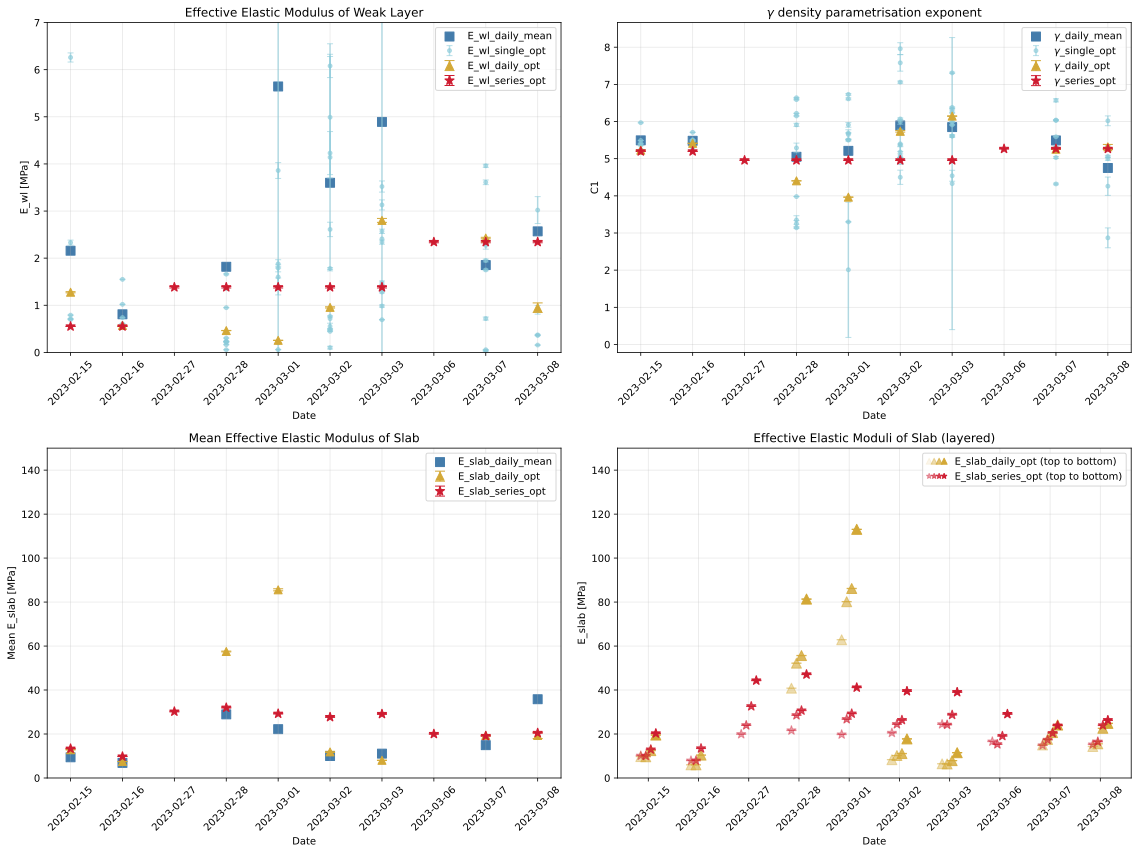

In [411]:
# FINAL PLOT WITHOUT DEFAULT VALUES AS REFERENCE
# Plot the E_wl and C1 values including their confidence intervals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import ast  # For safely evaluating string representations of lists

colors = colors_paper1
# Read the merged data file
#df = pd.read_excel("code/merged_data_f1_w0.75_20250624_115512.xlsx")
# Convert date column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Remove rows with invalid dates (NaT values)
df = df.dropna(subset=['date'])

# Sort by date
df = df.sort_values('date')

# Define the density column name
density_column = 'layers'  # Change this to match your actual column name

# Bergfeld function
def bergfeld(rho, rho0=916.7, C0=6.5, C1=4.4):
    """
    Compute Young's modulus using Bergfeld exponential function
    """
    return C0 * 1000 * (rho/rho0)**C1

# Function to extract density values from string
def extract_densities(density_str):
    """Extract density values from string format like '[[262, 33.75], [242, 33.75], ...]'"""
    try:
        # Parse the string representation of the list
        density_list = ast.literal_eval(density_str)
        # Extract just the density values (first element of each sublist)
        densities = [item[0] for item in density_list]
        return densities
    except:
        return None

# Calculate E_slab for different C1 types
def calculate_E_slab_values(row, C1_col, density_col):
    """Calculate E_slab for a specific C1 column and density data"""
    if pd.isna(row[C1_col]) or pd.isna(row[density_col]):
        return None
    
    densities = extract_densities(row[density_col])
    if densities is None:
        return None
    
    C1_value = row[C1_col]
    E_slab_values = [bergfeld(rho, C1=C1_value) for rho in densities]
    return E_slab_values

# Add this function to calculate E_slab error bars using C1 error propagation
def calculate_E_slab_with_errors(row, C1_col, C1_error_col, density_col):
    """Calculate E_slab and its error using C1 and C1 error through Bergfeld equation"""
    if pd.isna(row[C1_col]) or pd.isna(row[density_col]):
        return None, None
    
    densities = extract_densities(row[density_col])
    if densities is None:
        return None, None
    
    C1_value = row[C1_col]
    C1_error = row[C1_error_col] if not pd.isna(row[C1_error_col]) else 0
    
    # Calculate E_slab values and errors for each density
    E_slab_values = []
    E_slab_errors = []
    
    for rho in densities:
        # Base E_slab value
        E_slab_base = bergfeld(rho, C1=C1_value)
        
        # Error propagation through Bergfeld equation
        # dE/dC1 = E * ln(rho/rho0) * dC1
        rho0 = 916.7
        dE_dC1 = E_slab_base * np.log(rho/rho0) * C1_error
        E_slab_error = abs(dE_dC1)
        
        E_slab_values.append(E_slab_base)
        E_slab_errors.append(E_slab_error)
    
    return E_slab_values, E_slab_errors

# Function to calculate E_slab with default C1=4.4
def calculate_E_slab_default(row, density_col, default_C1=4.4):
    """Calculate E_slab using default C1 value"""
    if pd.isna(row[density_col]):
        return None
    
    densities = extract_densities(row[density_col])
    if densities is None:
        return None
    
    E_slab_values = [bergfeld(rho, C1=default_C1) for rho in densities]
    return E_slab_values
    
# Define error bar columns (customize these as needed)
error_bar_config = {
    'E_wl_single': 'ci1',           # Error bar column for E_wl_single
    'E_wl_daily_opt': 'ci1_daily_opt',     # Error bar column for E_wl_daily_opt
    'E_wl_series_opt': 'ci1_series_opt',   # Error bar column for E_wl_series_opt
    'C1_single': 'ci2',               # Error bar column for C1_single
    'C1_daily_opt': 'ci2_daily_opt',         # Error bar column for C1_daily_opt
    'C1_series_opt': 'ci2_series_opt',  
    'daily_mean_value2': 'your_error_column_name',
    'daily_mean_value1': 'your_error_column_name'# Error bar column for C1_series_opt
}

# Create figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Get unique dates for x-axis
unique_dates = sorted(df['date'].unique())
date_labels = [d.strftime('%Y-%m-%d') for d in unique_dates]

# Create x-axis positions
date_to_x = {date: i for i, date in enumerate(unique_dates)}

# Track which labels have been added to legend for 4th subplot
added_labels_4th = set()

# Plot 1: E_wl values with error bars

for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Plot individual E_wl_single values with error bars
    if 'E_wl_single' in df.columns:
        single_values = date_data['E_wl_single'].dropna()
        if len(single_values) > 0:
            # Check if error bar column exists
            if error_bar_config['E_wl_single'] in df.columns:
                single_errors = date_data[error_bar_config['E_wl_single']].dropna()
                if len(single_errors) > 0:
                    ax1.errorbar([x_pos] * len(single_values), single_values, 
                               yerr=single_errors, fmt='o', color=colors[3], 
                               alpha=0.6, markersize=4, capsize=3, capthick=1,
                               label='E_wl_single_opt' if x_pos == 0 else "")
                else:
                    ax1.scatter([x_pos] * len(single_values), single_values, 
                              color=colors[3], alpha=0.6, s=40, 
                              label='E_wl_single_opt' if x_pos == 0 else "")
            else:
                ax1.scatter([x_pos] * len(single_values), single_values, 
                          color=colors[3], alpha=0.6, s=40, 
                          label='E_wl_single_opt' if x_pos == 0 else "")
    
    # Plot daily mean E_wl values with error bars
    if 'daily_mean_value1' in df.columns:
        daily_mean = date_data['daily_mean_value1'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_mean):
            ax1.scatter(x_pos, daily_mean, color=colors[2], s=80, marker='s', 
                       label='E_wl_daily_mean' if x_pos == 0 else "")
    
    # Plot daily optimized E_wl values with error bars
    if 'E_wl_daily_opt' in df.columns:
        daily_opt = date_data['E_wl_daily_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_opt):
            # Check if error bar column exists
            if error_bar_config['E_wl_daily_opt'] in df.columns:
                daily_opt_error = date_data[error_bar_config['E_wl_daily_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(daily_opt_error):
                    ax1.errorbar(x_pos, daily_opt, yerr=daily_opt_error, fmt='^', 
                               color=colors[0], markersize=8, capsize=5, capthick=1,
                               label='E_wl_daily_opt' if x_pos == 0 else "")
                else:
                    ax1.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                               label='E_wl_daily_opt' if x_pos == 0 else "")
            else:
                ax1.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                           label='E_wl_daily_opt' if x_pos == 0 else "")
    
    # Plot series optimized E_wl values with error bars
    if 'E_wl_series_opt' in df.columns:
        series_opt = date_data['E_wl_series_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(series_opt):
            # Check if error bar column exists
            if error_bar_config['E_wl_series_opt'] in df.columns:
                series_opt_error = date_data[error_bar_config['E_wl_series_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(series_opt_error):
                    ax1.errorbar(x_pos, series_opt, yerr=series_opt_error, fmt='*', 
                               color=colors[1], markersize=10, capsize=5, capthick=1,
                               label='E_wl_series_opt' if x_pos == 0 else "")
                else:
                    ax1.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                               label='E_wl_series_opt' if x_pos == 0 else "")
            else:
                ax1.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                           label='E_wl_series_opt' if x_pos == 0 else "")


for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Plot individual C1_single values with error bars
    # Plot 2: C1 values with error bars
    if 'C1_single' in df.columns:
        single_values = date_data['C1_single'].dropna()
        if len(single_values) > 0:
            # Check if error bar column exists
            if error_bar_config['C1_single'] in df.columns:
                single_errors = date_data[error_bar_config['C1_single']].dropna()
                if len(single_errors) > 0:
                    ax2.errorbar([x_pos] * len(single_values), single_values, 
                               yerr=single_errors, fmt='o', color=colors[3], 
                               alpha=0.6, markersize=4, capsize=3, capthick=1,
                               label=r'$\gamma$_single_opt' if x_pos == 0 else "")
                else:
                    ax2.scatter([x_pos] * len(single_values), single_values, 
                              color=colors[3], alpha=0.6, s=40, 
                              label=r'$\gamma$_single_opt' if x_pos == 0 else "")
            else:
                ax2.scatter([x_pos] * len(single_values), single_values, 
                          color=colors[3], alpha=0.6, s=40, 
                          label=r'$\gamma$_single_opt' if x_pos == 0 else "")
    
    # Plot daily mean C1 values with error bars
    if 'daily_mean_value2' in df.columns:
        daily_mean = date_data['daily_mean_value2'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_mean):
            ax2.scatter(x_pos, daily_mean, color=colors[2], s=80, marker='s', 
                       label=r'$\gamma$_daily_mean' if x_pos == 0 else "")
    
    # Plot daily optimized C1 values with error bars
    if 'C1_daily_opt' in df.columns:
        daily_opt = date_data['C1_daily_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_opt):
            # Check if error bar column exists
            if error_bar_config['C1_daily_opt'] in df.columns:
                daily_opt_error = date_data[error_bar_config['C1_daily_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(daily_opt_error):
                    ax2.errorbar(x_pos, daily_opt, yerr=daily_opt_error, fmt='^', 
                               color=colors[0], markersize=8, capsize=5, capthick=1,
                               label=r'$\gamma$_daily_opt' if x_pos == 0 else "")
                else:
                    ax2.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                               label=r'$\gamma$_daily_opt' if x_pos == 0 else "")
            else:
                ax2.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                           label=r'$\gamma$_daily_opt' if x_pos == 0 else "")
    
    # Plot series optimized C1 values with error bars
    if 'C1_series_opt' in df.columns:
        series_opt = date_data['C1_series_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(series_opt):
            # Check if error bar column exists
            if error_bar_config['C1_series_opt'] in df.columns:
                series_opt_error = date_data[error_bar_config['C1_series_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(series_opt_error):
                    ax2.errorbar(x_pos, series_opt, yerr=series_opt_error, fmt='*', 
                               color=colors[1], markersize=10, capsize=5, capthick=1,
                               label=r'$\gamma$_series_opt' if x_pos == 0 else "")
                else:
                    ax2.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                               label=r'$\gamma$_series_opt' if x_pos == 0 else "")
            else:
                ax2.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                           label=r'$\gamma$_series_opt' if x_pos == 0 else "")


# Update the plotting code for Plot 3 (Mean E_slab values)
for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Calculate and plot mean E_slab for different C1 types
    if density_column in df.columns:

        # Daily mean C1 - process all rows for each date
        if 'daily_mean_value2' in df.columns:
            # Get all daily mean C1 values for this date
            daily_mean_C1_values = date_data['daily_mean_value2'].dropna()
            
            if len(daily_mean_C1_values) > 0:
                # Calculate E_slab for each row and collect all values
                all_E_slab_values = []
                all_C1_values = []
                
                for idx, row in date_data.iterrows():
                    if not pd.isna(row['daily_mean_value2']):
                        E_slab_values = calculate_E_slab_values(row, 'daily_mean_value2', density_column)
                        #print("E_slab_values_per_pst", E_slab_values)
                        E_mean_single = np.mean(E_slab_values) #average value of a single PST
                        if E_slab_values:
                            all_E_slab_values.append(E_mean_single)
                            all_C1_values.append([row['daily_mean_value2']])
                
                # Calculate overall mean of the mean per PST
                if all_E_slab_values:
                    #print("len all_E_slab_means", len(all_E_slab_values))
                    mean_E_slab = np.mean(all_E_slab_values)
                    #print(f"Date: {date}, daily_mean_value2: {np.mean(all_C1_values):.3f}, Mean E_slab: {mean_E_slab}")
                    ax3.scatter(x_pos, mean_E_slab, color=colors[2], s=80, marker='s', 
                               label='E_slab_daily_mean' if x_pos == 0 else "")
                
        if 'C1_daily_opt' in df.columns:
            # Get all C1 values for this date
            daily_opt_C1_values = date_data['C1_daily_opt'].dropna()
            
            if len(daily_opt_C1_values) > 0:
                # Calculate E_slab for each row and collect all values
                all_E_slab_values = []
                all_E_slab_errors = []
                
                for idx, row in date_data.iterrows():
                    if not pd.isna(row['C1_daily_opt']):
                        # Check if error bar column exists for C1
                        C1_error_col = error_bar_config.get('C1_daily_opt', None)
                        if C1_error_col and C1_error_col in df.columns:
                            # Calculate E_slab with errors
                            E_slab_result = calculate_E_slab_with_errors(row, 'C1_daily_opt', C1_error_col, density_column)
                            if E_slab_result:
                                E_slab_values, E_slab_errors = E_slab_result
                                #print("len of E_slab_values", len(E_slab_values))
                                E_slab_mean_single = np.mean(E_slab_values)
                                E_slab_error_mean_single = np.mean(E_slab_errors)
                                all_E_slab_values.append(E_slab_mean_single)
                                all_E_slab_errors.append(E_slab_error_mean_single)
                        else:
                            E_slab_values = calculate_E_slab_values(row, 'C1_daily_opt', density_column)
                            E_slab_mean_single = np.mean(E_slab_values)
                            if E_slab_values:
                                all_E_slab_values.append(E_slab_mean_single)
                
                # Calculate overall mean and error
                if all_E_slab_values:
                    mean_E_slab = np.mean(all_E_slab_values)
                    if all_E_slab_errors:
                        mean_E_slab_error = np.mean(all_E_slab_errors)
                        #print(f"Date: {date}, C1_daily_opt: {daily_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.errorbar(x_pos, mean_E_slab, yerr=mean_E_slab_error, fmt='^', 
                                   color=colors[0], markersize=8, capsize=5, capthick=1,
                                   label='E_slab_daily_opt' if x_pos == 0 else "")
                    else:
                        #print(f"Date: {date}, C1_daily_opt: {daily_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.scatter(x_pos, mean_E_slab, color=colors[0], s=80, marker='^', 
                                   label='E_slab_daily_opt' if x_pos == 0 else "")
 
        # Series optimized C1 - process all rows for each date
        if 'C1_series_opt' in df.columns:
            # Get all C1 values for this date
            series_opt_C1_values = date_data['C1_series_opt'].dropna()
            
            if len(series_opt_C1_values) > 0:
                # Calculate E_slab for each row and collect all values
                all_E_slab_values = []
                all_E_slab_errors = []
                
                for idx, row in date_data.iterrows():
                    if not pd.isna(row['C1_series_opt']):
                        # Check if error bar column exists for C1
                        C1_error_col = error_bar_config.get('C1_series_opt', None)
                        if C1_error_col and C1_error_col in df.columns:
                            # Calculate E_slab with errors
                            E_slab_result = calculate_E_slab_with_errors(row, 'C1_series_opt', C1_error_col, density_column)
                            if E_slab_result:
                                E_slab_values, E_slab_errors = E_slab_result
                                E_slab_mean_single = np.mean(E_slab_values)
                                E_slab_error_mean_single = np.mean(E_slab_errors)
                                all_E_slab_values.append(E_slab_mean_single)
                                all_E_slab_errors.append(E_slab_error_mean_single)
                        else:
                            E_slab_values = calculate_E_slab_values(row, 'C1_series_opt', density_column)
                            E_slab_mean_single = np.mean(E_slab_values)
                            if E_slab_values:
                                all_E_slab_values.append(E_slab_mean_single)
                
                # Calculate overall mean and error
                if all_E_slab_values:
                    mean_E_slab = np.mean(all_E_slab_values)
                    if all_E_slab_errors:
                        mean_E_slab_error = np.mean(all_E_slab_errors)
                        #print(f"Date: {date}, C1_series_opt: {series_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.errorbar(x_pos, mean_E_slab, yerr=mean_E_slab_error, fmt='*', 
                                   color=colors[1], markersize=10, capsize=5, capthick=1,
                                   label='E_slab_series_opt' if x_pos == 0 else "")
                    else:
                        #print(f"Date: {date}, C1_series_opt: {series_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.scatter(x_pos, mean_E_slab, color=colors[1], s=100, marker='*', 
                                   label='E_slab_series_opt' if x_pos == 0 else "")
    
# Update the plotting code for Plot 4 (Individual E_slab values)
for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Daily optimized C1 - plot mean E_slab values per layer
    if 'C1_daily_opt' in df.columns:
        daily_opt_C1_values = date_data['C1_daily_opt'].dropna()
        
        if len(daily_opt_C1_values) > 0:
            all_layer_E_slab_values = {0: [], 1: [], 2: [], 3: []}
            all_layer_E_slab_errors = {0: [], 1: [], 2: [], 3: []}
            
            for idx, row in date_data.iterrows():
                if not pd.isna(row['C1_daily_opt']):
                    C1_error_col = error_bar_config.get('C1_daily_opt', None)
                    if C1_error_col and C1_error_col in df.columns:
                        E_slab_result = calculate_E_slab_with_errors(row, 'C1_daily_opt', C1_error_col, density_column)
                        if E_slab_result:
                            E_slab_values, E_slab_errors = E_slab_result
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
                                                       
                            for layer_idx, E_slab_err in enumerate(E_slab_errors):
                                if layer_idx < 4:
                                    all_layer_E_slab_errors[layer_idx].append(E_slab_err)
                                
                    else:
                        E_slab_values = calculate_E_slab_values(row, 'C1_daily_opt', density_column)
                        if E_slab_values:
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
                            
            # Plot mean values for each layer
            if any(all_layer_E_slab_values.values()):
                for layer_idx in range(4):
                    if all_layer_E_slab_values[layer_idx]:
                        mean_layer_E_slab = np.mean(all_layer_E_slab_values[layer_idx])
                        x_offset = x_pos + (layer_idx - 1.5) * 0.1
                        alpha = 0.4 + (layer_idx * 0.2)

                        #ax4.plot(x_offset, mean_layer_E_slab, color=colors[0], markersize=6, marker='^', linestyle="",alpha=alpha, label="")

                        if all_layer_E_slab_errors:

                            mean_layer_E_slab_error = np.mean(all_layer_E_slab_errors[layer_idx])
                            print("mean E_slab daily error is ", str(mean_layer_E_slab_error))
                            ax4.errorbar(x_offset, mean_layer_E_slab, yerr=mean_E_slab_error, fmt='^', 
                                       color=colors[0], markersize=10, capsize=5, alpha= alpha, capthick=1,
                                       label="")
                        else:
                            ax4.plot(x_offset, mean_layer_E_slab, color=colors[0], markersize=10, marker='^', linestyle="",alpha=alpha, label="")

    
    # Series optimized C1 - plot mean E_slab values per layer
    if 'C1_series_opt' in df.columns:
        series_opt_C1_values = date_data['C1_series_opt'].dropna()
        
        if len(series_opt_C1_values) > 0:
            all_layer_E_slab_values = {0: [], 1: [], 2: [], 3: []}
            all_layer_E_slab_errors = {0: [], 1: [], 2: [], 3: []}
            
            for idx, row in date_data.iterrows():
                if not pd.isna(row['C1_series_opt']):
                    C1_error_col = error_bar_config.get('C1_series_opt', None)
                    if C1_error_col and C1_error_col in df.columns:
                        E_slab_result = calculate_E_slab_with_errors(row, 'C1_series_opt', C1_error_col, density_column)
                        if E_slab_result:
                            E_slab_values, E_slab_errors = E_slab_result
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
                            for layer_idx, E_slab_err in enumerate(E_slab_errors):
                                if layer_idx < 4:
                                    all_layer_E_slab_errors[layer_idx].append(E_slab_err)
                    else:
                        E_slab_values = calculate_E_slab_values(row, 'C1_series_opt', density_column)
                        if E_slab_values:
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
            
            # Plot mean values for each layer
            if any(all_layer_E_slab_values.values()):
                for layer_idx in range(4):
                    if all_layer_E_slab_values[layer_idx]:
                        mean_layer_E_slab = np.mean(all_layer_E_slab_values[layer_idx])
                        x_offset = x_pos + (layer_idx - 1.5) * 0.1
                        alpha = 0.4 + (layer_idx * 0.2)
                        if all_layer_E_slab_errors:
                            mean_layer_E_slab_error = np.mean(all_layer_E_slab_errors[layer_idx])
                            print("mean E_slab series error is ", str(mean_layer_E_slab_error))
                            ax4.errorbar(x_offset, mean_layer_E_slab, yerr=mean_E_slab_error, fmt='*', 
                                       color=colors[1], markersize=10, capsize=5, alpha= alpha, capthick=1,
                                       label="")
                        else:
                            ax4.plot(x_offset, mean_layer_E_slab, color=colors[1], markersize=10, marker='*', linestyle="",alpha=alpha, label="")
    
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

legend_elements = []

class MultiSymbolHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # Create 4 symbols side by side
        artists = []
        symbol_width = width / 4
        
        for i in range(4):
            alpha = 0.4 + (i * 0.2)
            x_pos = xdescent + (i * symbol_width) + (symbol_width / 2)
            y_pos = ydescent + height / 2
            
            # Create a scatter plot for each symbol
            line = plt.Line2D([x_pos], [y_pos], marker='*', color=colors[1], 
                                markersize=6, alpha=alpha, linestyle="", transform=trans)
            artists.append(line)
        
        return artists

class DailyMultiSymbolHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # Create 4 symbols side by side
        artists = []
        symbol_width = width / 4
        
        for i in range(4):
            alpha = 0.1 + (i * 0.3)
            x_pos = xdescent + (i * symbol_width) + (symbol_width / 2)
            y_pos = ydescent + height / 2
            
            # Create a scatter plot for each symbol
            line = plt.Line2D([x_pos], [y_pos], marker='^', color=colors[0], 
                                markersize=6, alpha=alpha, linestyle="", transform=trans)
            artists.append(line)
        
        return artists


# Create a custom legend handle for daily optimized
daily_legend_handle = mpatches.Patch(color='none', label='E_slab_daily_opt (top to bottom)')

# Replace the daily_handles creation
legend_elements.append(daily_legend_handle)

# Create a custom legend handle
series_legend_handle = mpatches.Patch(color='none', label='E_slab_series_opt (top to bottom)')

# Register the custom handler
legend_elements.append(series_legend_handle)



ax4.legend(handles=legend_elements, loc='best', 
           handler_map={series_legend_handle: MultiSymbolHandler(),
                       daily_legend_handle: DailyMultiSymbolHandler()})


# Set labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('E_wl [MPa]')
ax1.set_ylim(0,7)
ax1.set_title('Effective Elastic Modulus of Weak Layer')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel('Date')
ax2.set_ylabel('C1')
ax2.set_title(r'$\gamma$ density parametrisation exponent')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3.set_xlabel('Date')
ax3.set_ylabel('Mean E_slab [MPa]')
ax3.set_title('Mean Effective Elastic Modulus of Slab')
ax3.set_ylim(0,150)
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.set_xlabel('Date')
ax4.set_ylabel('E_slab [MPa]')
ax4.set_ylim(0,150)
ax4.set_title('Effective Elastic Moduli of Slab (layered)')

# Add the custom legend

ax4.grid(True, alpha=0.3)

# Set x-axis ticks
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks(range(len(unique_dates)))
    ax.set_xticklabels(date_labels, rotation=45)

plt.tight_layout()

# Save the figure
figure_path = "C:\\Users\\walet\\Desktop\\April_Hackathon_2025\\2023_PST_DICE\\2023_PST_optimization_results\\daily_figures\\"
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"E_wl_C1_E_slab_zoom{timestamp}.png"
plt.savefig(save_fig_path + "20250706_Paper1\\elastic_properties\\" + filename, dpi=600, bbox_inches='tight')

plt.show()


len of E_slab_default_values 4
E_slab_default_values_single_mean 28.25207323912407
len of E_slab_default_values 4
E_slab_default_values_single_mean 39.80014321366719
len of E_slab_default_values 4
E_slab_default_values_single_mean 36.7932915345299
len of E_slab_default_values 4
E_slab_default_values_single_mean 30.973293682347595
len of E_slab_default_values 4
E_slab_default_values_single_mean 36.135119908869726
len of E_slab_default_values 4
E_slab_default_values_single_mean 35.52672656055183
len of E_slab_default_values 4
E_slab_default_values_single_mean 31.36003243668594
len of E_slab_default_values 4
E_slab_default_values_single_mean 34.67020807145279
len of E_slab_default_values 3
E_slab_default_values_single_mean 26.124969800679622
len of E_slab_default_values 3
E_slab_default_values_single_mean 24.836298593225013
len of E_slab_default_values 3
E_slab_default_values_single_mean 30.09455659099721
len of E_slab_default_values 3
E_slab_default_values_single_mean 24.794272783494335


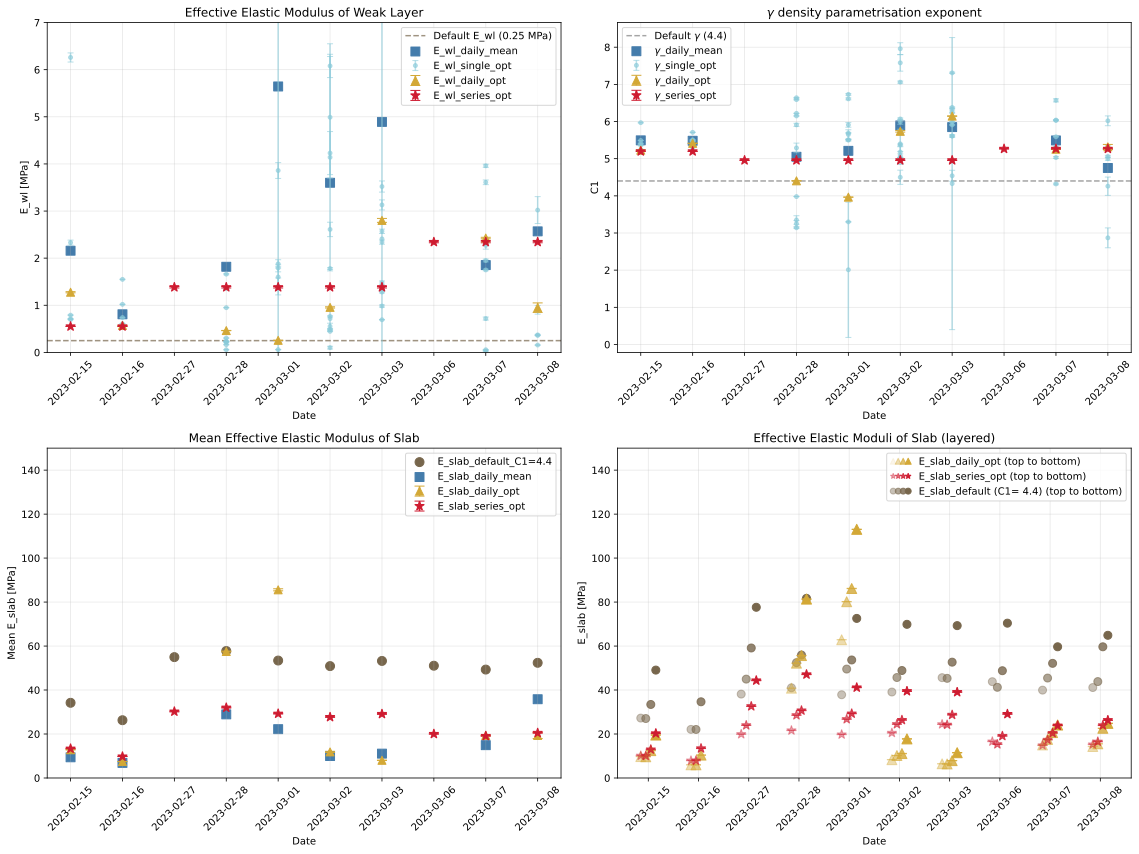

In [21]:
# FINAL PLOT WITH DEFAULT VALUES AS REFERENCE
# Plot the E_wl and C1 values including their confidence intervals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import ast  # For safely evaluating string representations of lists

colors = colors_paper1
# Read the merged data file
#df = pd.read_excel("code/merged_data_f1_w0.75_20250624_115512.xlsx")
df = pd.read_excel(save_fig_path + "20250706_Paper1\\" + "df_with_fracture_toughness_final.xlsx")

# Convert date column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Remove rows with invalid dates (NaT values)
df = df.dropna(subset=['date'])

# Sort by date
df = df.sort_values('date')

# Define the density column name
density_column = 'layers'  # Change this to match your actual column name

# Bergfeld function
def bergfeld(rho, rho0=916.7, C0=6.5, C1=4.4):
    """
    Compute Young's modulus using Bergfeld exponential function
    """
    return C0 * 1000 * (rho/rho0)**C1

# Function to extract density values from string
def extract_densities(density_str):
    """Extract density values from string format like '[[262, 33.75], [242, 33.75], ...]'"""
    try:
        # Parse the string representation of the list
        density_list = ast.literal_eval(density_str)
        # Extract just the density values (first element of each sublist)
        densities = [item[0] for item in density_list]
        return densities
    except:
        return None

# Calculate E_slab for different C1 types
def calculate_E_slab_values(row, C1_col, density_col):
    """Calculate E_slab for a specific C1 column and density data"""
    if pd.isna(row[C1_col]) or pd.isna(row[density_col]):
        return None
    
    densities = extract_densities(row[density_col])
    if densities is None:
        return None
    
    C1_value = row[C1_col]
    E_slab_values = [bergfeld(rho, C1=C1_value) for rho in densities]
    return E_slab_values

# Add this function to calculate E_slab error bars using C1 error propagation
def calculate_E_slab_with_errors(row, C1_col, C1_error_col, density_col):
    """Calculate E_slab and its error using C1 and C1 error through Bergfeld equation"""
    if pd.isna(row[C1_col]) or pd.isna(row[density_col]):
        return None, None
    
    densities = extract_densities(row[density_col])
    if densities is None:
        return None, None
    
    C1_value = row[C1_col]
    C1_error = row[C1_error_col] if not pd.isna(row[C1_error_col]) else 0
    
    # Calculate E_slab values and errors for each density
    E_slab_values = []
    E_slab_errors = []
    
    for rho in densities:
        # Base E_slab value
        E_slab_base = bergfeld(rho, C1=C1_value)
        
        # Error propagation through Bergfeld equation
        # dE/dC1 = E * ln(rho/rho0) * dC1
        rho0 = 916.7
        dE_dC1 = E_slab_base * np.log(rho/rho0) * C1_error
        E_slab_error = abs(dE_dC1)
        
        E_slab_values.append(E_slab_base)
        E_slab_errors.append(E_slab_error)
    
    return E_slab_values, E_slab_errors

# Function to calculate E_slab with default C1=4.4
def calculate_E_slab_default(row, density_col, default_C1=4.4):
    """Calculate E_slab using default C1 value"""
    if pd.isna(row[density_col]):
        return None
    
    densities = extract_densities(row[density_col])
    if densities is None:
        return None
    
    E_slab_values = [bergfeld(rho, C1=default_C1) for rho in densities]
    return E_slab_values

    
    
# Define error bar columns (customize these as needed)
error_bar_config = {
    'E_wl_single': 'ci1',           # Error bar column for E_wl_single
    'E_wl_daily_opt': 'ci1_daily_opt',     # Error bar column for E_wl_daily_opt
    'E_wl_series_opt': 'ci1_series_opt',   # Error bar column for E_wl_series_opt
    'C1_single': 'ci2',               # Error bar column for C1_single
    'C1_daily_opt': 'ci2_daily_opt',         # Error bar column for C1_daily_opt
    'C1_series_opt': 'ci2_series_opt',  
    'daily_mean_value2': 'your_error_column_name',
    'daily_mean_value1': 'your_error_column_name'# Error bar column for C1_series_opt
}

# Create figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Get unique dates for x-axis
unique_dates = sorted(df['date'].unique())
date_labels = [d.strftime('%Y-%m-%d') for d in unique_dates]

# Create x-axis positions
date_to_x = {date: i for i, date in enumerate(unique_dates)}

# Track which labels have been added to legend for 4th subplot
added_labels_4th = set()

# Plot 1: E_wl values with error bars
ax1.axhline(y=0.25, color=colors[4], linestyle='--', alpha=0.7, 
            label='Default E_wl (0.25 MPa)')
for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Plot individual E_wl_single values with error bars
    if 'E_wl_single' in df.columns:
        single_values = date_data['E_wl_single'].dropna()
        if len(single_values) > 0:
            # Check if error bar column exists
            if error_bar_config['E_wl_single'] in df.columns:
                single_errors = date_data[error_bar_config['E_wl_single']].dropna()
                if len(single_errors) > 0:
                    ax1.errorbar([x_pos] * len(single_values), single_values, 
                               yerr=single_errors, fmt='o', color=colors[3], 
                               alpha=0.6, markersize=4, capsize=3, capthick=1,
                               label='E_wl_single_opt' if x_pos == 0 else "")
                else:
                    ax1.scatter([x_pos] * len(single_values), single_values, 
                              color=colors[3], alpha=0.6, s=40, 
                              label='E_wl_single_opt' if x_pos == 0 else "")
            else:
                ax1.scatter([x_pos] * len(single_values), single_values, 
                          color=colors[3], alpha=0.6, s=40, 
                          label='E_wl_single_opt' if x_pos == 0 else "")
    
    # Plot daily mean E_wl values with error bars
    if 'daily_mean_value1' in df.columns:
        daily_mean = date_data['daily_mean_value1'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_mean):
            ax1.scatter(x_pos, daily_mean, color=colors[2], s=80, marker='s', 
                       label='E_wl_daily_mean' if x_pos == 0 else "")
    
    # Plot daily optimized E_wl values with error bars
    if 'E_wl_daily_opt' in df.columns:
        daily_opt = date_data['E_wl_daily_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_opt):
            # Check if error bar column exists
            if error_bar_config['E_wl_daily_opt'] in df.columns:
                daily_opt_error = date_data[error_bar_config['E_wl_daily_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(daily_opt_error):
                    ax1.errorbar(x_pos, daily_opt, yerr=daily_opt_error, fmt='^', 
                               color=colors[0], markersize=8, capsize=5, capthick=1,
                               label='E_wl_daily_opt' if x_pos == 0 else "")
                else:
                    ax1.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                               label='E_wl_daily_opt' if x_pos == 0 else "")
            else:
                ax1.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                           label='E_wl_daily_opt' if x_pos == 0 else "")
    
    # Plot series optimized E_wl values with error bars
    if 'E_wl_series_opt' in df.columns:
        series_opt = date_data['E_wl_series_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(series_opt):
            # Check if error bar column exists
            if error_bar_config['E_wl_series_opt'] in df.columns:
                series_opt_error = date_data[error_bar_config['E_wl_series_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(series_opt_error):
                    ax1.errorbar(x_pos, series_opt, yerr=series_opt_error, fmt='*', 
                               color=colors[1], markersize=10, capsize=5, capthick=1,
                               label='E_wl_series_opt' if x_pos == 0 else "")
                else:
                    ax1.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                               label='E_wl_series_opt' if x_pos == 0 else "")
            else:
                ax1.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                           label='E_wl_series_opt' if x_pos == 0 else "")


ax2.axhline(y=4.4, color='gray', linestyle='--', alpha=0.7, label=r'Default $\gamma$ (4.4)')

for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Plot individual C1_single values with error bars
    # Plot 2: C1 values with error bars
    if 'C1_single' in df.columns:
        single_values = date_data['C1_single'].dropna()
        if len(single_values) > 0:
            # Check if error bar column exists
            if error_bar_config['C1_single'] in df.columns:
                single_errors = date_data[error_bar_config['C1_single']].dropna()
                if len(single_errors) > 0:
                    ax2.errorbar([x_pos] * len(single_values), single_values, 
                               yerr=single_errors, fmt='o', color=colors[3], 
                               alpha=0.6, markersize=4, capsize=3, capthick=1,
                               label=r'$\gamma$_single_opt' if x_pos == 0 else "")
                else:
                    ax2.scatter([x_pos] * len(single_values), single_values, 
                              color=colors[3], alpha=0.6, s=40, 
                              label=r'$\gamma$_single_opt' if x_pos == 0 else "")
            else:
                ax2.scatter([x_pos] * len(single_values), single_values, 
                          color=colors[3], alpha=0.6, s=40, 
                          label=r'$\gamma$_single_opt' if x_pos == 0 else "")
    
    # Plot daily mean C1 values with error bars
    if 'daily_mean_value2' in df.columns:
        daily_mean = date_data['daily_mean_value2'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_mean):
            ax2.scatter(x_pos, daily_mean, color=colors[2], s=80, marker='s', 
                       label=r'$\gamma$_daily_mean' if x_pos == 0 else "")
    
    # Plot daily optimized C1 values with error bars
    if 'C1_daily_opt' in df.columns:
        daily_opt = date_data['C1_daily_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(daily_opt):
            # Check if error bar column exists
            if error_bar_config['C1_daily_opt'] in df.columns:
                daily_opt_error = date_data[error_bar_config['C1_daily_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(daily_opt_error):
                    ax2.errorbar(x_pos, daily_opt, yerr=daily_opt_error, fmt='^', 
                               color=colors[0], markersize=8, capsize=5, capthick=1,
                               label=r'$\gamma$_daily_opt' if x_pos == 0 else "")
                else:
                    ax2.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                               label=r'$\gamma$_daily_opt' if x_pos == 0 else "")
            else:
                ax2.scatter(x_pos, daily_opt, color=colors[0], s=80, marker='^', 
                           label=r'$\gamma$_daily_opt' if x_pos == 0 else "")
    
    # Plot series optimized C1 values with error bars
    if 'C1_series_opt' in df.columns:
        series_opt = date_data['C1_series_opt'].iloc[0] if len(date_data) > 0 else np.nan
        if not pd.isna(series_opt):
            # Check if error bar column exists
            if error_bar_config['C1_series_opt'] in df.columns:
                series_opt_error = date_data[error_bar_config['C1_series_opt']].iloc[0] if len(date_data) > 0 else np.nan
                if not pd.isna(series_opt_error):
                    ax2.errorbar(x_pos, series_opt, yerr=series_opt_error, fmt='*', 
                               color=colors[1], markersize=10, capsize=5, capthick=1,
                               label=r'$\gamma$_series_opt' if x_pos == 0 else "")
                else:
                    ax2.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                               label=r'$\gamma$_series_opt' if x_pos == 0 else "")
            else:
                ax2.scatter(x_pos, series_opt, color=colors[1], s=100, marker='*', 
                           label=r'$\gamma$_series_opt' if x_pos == 0 else "")


# Update the plotting code for Plot 3 (Mean E_slab values)
for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]
    
    # Calculate and plot mean E_slab for different C1 types
    if density_column in df.columns:

        all_E_slab_default_values = []

        for idx, row in date_data.iterrows():
            if not pd.isna(row[density_column]):
                E_slab_default_values = calculate_E_slab_default(row, density_column, default_C1=4.4)
                print("len of E_slab_default_values", len(E_slab_default_values))
                E_slab_default_values_single_mean = np.mean(E_slab_default_values) #we calculate the mean per single pst)
                print("E_slab_default_values_single_mean", E_slab_default_values_single_mean)
                if E_slab_default_values:
                    all_E_slab_default_values.append(E_slab_default_values_single_mean)
        
        if all_E_slab_default_values:
            mean_E_slab_default = np.mean(all_E_slab_default_values)
            ax3.scatter(x_pos, mean_E_slab_default, color=colors[4], s=80, marker='o', 
                       label='E_slab_default_C1=4.4' if x_pos == 0 else "") #so now we calculated the E_slabs per PST, took the mean, and took the mean of all PSTs

        # Daily mean C1 - process all rows for each date
        if 'daily_mean_value2' in df.columns:
            # Get all daily mean C1 values for this date
            daily_mean_C1_values = date_data['daily_mean_value2'].dropna()
            
            if len(daily_mean_C1_values) > 0:
                # Calculate E_slab for each row and collect all values
                all_E_slab_values = []
                all_C1_values = []
                
                for idx, row in date_data.iterrows():
                    if not pd.isna(row['daily_mean_value2']):
                        E_slab_values = calculate_E_slab_values(row, 'daily_mean_value2', density_column)
                        #print("E_slab_values_per_pst", E_slab_values)
                        E_mean_single = np.mean(E_slab_values) #average value of a single PST
                        if E_slab_values:
                            all_E_slab_values.append(E_mean_single)
                            all_C1_values.append([row['daily_mean_value2']])
                
                # Calculate overall mean of the mean per PST
                if all_E_slab_values:
                    #print("len all_E_slab_means", len(all_E_slab_values))
                    mean_E_slab = np.mean(all_E_slab_values)
                    #print(f"Date: {date}, daily_mean_value2: {np.mean(all_C1_values):.3f}, Mean E_slab: {mean_E_slab}")
                    ax3.scatter(x_pos, mean_E_slab, color=colors[2], s=80, marker='s', 
                               label='E_slab_daily_mean' if x_pos == 0 else "")
                
        if 'C1_daily_opt' in df.columns:
            # Get all C1 values for this date
            daily_opt_C1_values = date_data['C1_daily_opt'].dropna()
            
            if len(daily_opt_C1_values) > 0:
                # Calculate E_slab for each row and collect all values
                all_E_slab_values = []
                all_E_slab_errors = []
                
                for idx, row in date_data.iterrows():
                    if not pd.isna(row['C1_daily_opt']):
                        # Check if error bar column exists for C1
                        C1_error_col = error_bar_config.get('C1_daily_opt', None)
                        if C1_error_col and C1_error_col in df.columns:
                            # Calculate E_slab with errors
                            E_slab_result = calculate_E_slab_with_errors(row, 'C1_daily_opt', C1_error_col, density_column)
                            if E_slab_result:
                                E_slab_values, E_slab_errors = E_slab_result
                                #print("len of E_slab_values", len(E_slab_values))
                                E_slab_mean_single = np.mean(E_slab_values)
                                E_slab_error_mean_single = np.mean(E_slab_errors)
                                all_E_slab_values.append(E_slab_mean_single)
                                all_E_slab_errors.append(E_slab_error_mean_single)
                        else:
                            E_slab_values = calculate_E_slab_values(row, 'C1_daily_opt', density_column)
                            E_slab_mean_single = np.mean(E_slab_values)
                            if E_slab_values:
                                all_E_slab_values.append(E_slab_mean_single)
                
                # Calculate overall mean and error
                if all_E_slab_values:
                    mean_E_slab = np.mean(all_E_slab_values)
                    if all_E_slab_errors:
                        mean_E_slab_error = np.mean(all_E_slab_errors)
                        #print(f"Date: {date}, C1_daily_opt: {daily_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.errorbar(x_pos, mean_E_slab, yerr=mean_E_slab_error, fmt='^', 
                                   color=colors[0], markersize=8, capsize=5, capthick=1,
                                   label='E_slab_daily_opt' if x_pos == 0 else "")
                    else:
                        #print(f"Date: {date}, C1_daily_opt: {daily_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.scatter(x_pos, mean_E_slab, color=colors[0], s=80, marker='^', 
                                   label='E_slab_daily_opt' if x_pos == 0 else "")
 
        # Series optimized C1 - process all rows for each date
        if 'C1_series_opt' in df.columns:
            # Get all C1 values for this date
            series_opt_C1_values = date_data['C1_series_opt'].dropna()
            
            if len(series_opt_C1_values) > 0:
                # Calculate E_slab for each row and collect all values
                all_E_slab_values = []
                all_E_slab_errors = []
                
                for idx, row in date_data.iterrows():
                    if not pd.isna(row['C1_series_opt']):
                        # Check if error bar column exists for C1
                        C1_error_col = error_bar_config.get('C1_series_opt', None)
                        if C1_error_col and C1_error_col in df.columns:
                            # Calculate E_slab with errors
                            E_slab_result = calculate_E_slab_with_errors(row, 'C1_series_opt', C1_error_col, density_column)
                            if E_slab_result:
                                E_slab_values, E_slab_errors = E_slab_result
                                E_slab_mean_single = np.mean(E_slab_values)
                                E_slab_error_mean_single = np.mean(E_slab_errors)
                                all_E_slab_values.append(E_slab_mean_single)
                                all_E_slab_errors.append(E_slab_error_mean_single)
                        else:
                            E_slab_values = calculate_E_slab_values(row, 'C1_series_opt', density_column)
                            E_slab_mean_single = np.mean(E_slab_values)
                            if E_slab_values:
                                all_E_slab_values.append(E_slab_mean_single)
                
                # Calculate overall mean and error
                if all_E_slab_values:
                    mean_E_slab = np.mean(all_E_slab_values)
                    if all_E_slab_errors:
                        mean_E_slab_error = np.mean(all_E_slab_errors)
                        #print(f"Date: {date}, C1_series_opt: {series_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.errorbar(x_pos, mean_E_slab, yerr=mean_E_slab_error, fmt='*', 
                                   color=colors[1], markersize=10, capsize=5, capthick=1,
                                   label='E_slab_series_opt' if x_pos == 0 else "")
                    else:
                        #print(f"Date: {date}, C1_series_opt: {series_opt_C1_values.mean():.3f}, Mean E_slab: {mean_E_slab}")
                        ax3.scatter(x_pos, mean_E_slab, color=colors[1], s=100, marker='*', 
                                   label='E_slab_series_opt' if x_pos == 0 else "")
    
# Update the plotting code for Plot 4 (Individual E_slab values)
for date in unique_dates:
    date_data = df[df['date'] == date]
    x_pos = date_to_x[date]

    # Plot mean E_slab values per layer for default C1=4.4
    all_layer_E_slab_values = {0: [], 1: [], 2: [], 3: []}  # Dictionary for each layer position
    
    for idx, row in date_data.iterrows():
        if not pd.isna(row[density_column]):
            E_slab_default_values = calculate_E_slab_default(row, density_column, default_C1=4.4)
            if E_slab_default_values:
                # Add each layer's E_slab value to the corresponding layer position
                for layer_idx, E_slab_val in enumerate(E_slab_default_values):
                    if layer_idx < 4:  # Ensure we don't exceed 4 layers
                        all_layer_E_slab_values[layer_idx].append(E_slab_val)
    
    # Plot mean values for each layer
    if any(all_layer_E_slab_values.values()):  # If we have any data
        for layer_idx in range(4):
            if all_layer_E_slab_values[layer_idx]:  # If this layer has data
                mean_layer_E_slab = np.mean(all_layer_E_slab_values[layer_idx])
                x_offset = x_pos + (layer_idx - 1.5) * 0.1
                alpha = 0.4 + (layer_idx * 0.2)
                print("alpha", alpha)
                ax4.plot(x_offset, mean_layer_E_slab, color=colors[4], markersize=8, marker='o', linestyle="",alpha=alpha, label="")
    
    # Daily optimized C1 - plot mean E_slab values per layer
    if 'C1_daily_opt' in df.columns:
        daily_opt_C1_values = date_data['C1_daily_opt'].dropna()
        
        if len(daily_opt_C1_values) > 0:
            all_layer_E_slab_values = {0: [], 1: [], 2: [], 3: []}
            all_layer_E_slab_errors = {0: [], 1: [], 2: [], 3: []}
            
            for idx, row in date_data.iterrows():
                if not pd.isna(row['C1_daily_opt']):
                    C1_error_col = error_bar_config.get('C1_daily_opt', None)
                    if C1_error_col and C1_error_col in df.columns:
                        E_slab_result = calculate_E_slab_with_errors(row, 'C1_daily_opt', C1_error_col, density_column)
                        if E_slab_result:
                            E_slab_values, E_slab_errors = E_slab_result
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
                                                       
                            for layer_idx, E_slab_err in enumerate(E_slab_errors):
                                if layer_idx < 4:
                                    all_layer_E_slab_errors[layer_idx].append(E_slab_err)
                                
                    else:
                        E_slab_values = calculate_E_slab_values(row, 'C1_daily_opt', density_column)
                        if E_slab_values:
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
                            
            # Plot mean values for each layer
            if any(all_layer_E_slab_values.values()):
                for layer_idx in range(4):
                    if all_layer_E_slab_values[layer_idx]:
                        mean_layer_E_slab = np.mean(all_layer_E_slab_values[layer_idx])
                        x_offset = x_pos + (layer_idx - 1.5) * 0.1
                        alpha = 0.4 + (layer_idx * 0.2)

                        #ax4.plot(x_offset, mean_layer_E_slab, color=colors[0], markersize=6, marker='^', linestyle="",alpha=alpha, label="")

                        if all_layer_E_slab_errors:

                            mean_layer_E_slab_error = np.mean(all_layer_E_slab_errors[layer_idx])
                            print("mean E_slab daily error is ", str(mean_layer_E_slab_error))
                            ax4.errorbar(x_offset, mean_layer_E_slab, yerr=mean_E_slab_error, fmt='^', 
                                       color=colors[0], markersize=10, capsize=5, alpha= alpha, capthick=1,
                                       label="")
                        else:
                            ax4.plot(x_offset, mean_layer_E_slab, color=colors[0], markersize=10, marker='^', linestyle="",alpha=alpha, label="")

    
    # Series optimized C1 - plot mean E_slab values per layer
    if 'C1_series_opt' in df.columns:
        series_opt_C1_values = date_data['C1_series_opt'].dropna()
        
        if len(series_opt_C1_values) > 0:
            all_layer_E_slab_values = {0: [], 1: [], 2: [], 3: []}
            all_layer_E_slab_errors = {0: [], 1: [], 2: [], 3: []}
            
            for idx, row in date_data.iterrows():
                if not pd.isna(row['C1_series_opt']):
                    C1_error_col = error_bar_config.get('C1_series_opt', None)
                    if C1_error_col and C1_error_col in df.columns:
                        E_slab_result = calculate_E_slab_with_errors(row, 'C1_series_opt', C1_error_col, density_column)
                        if E_slab_result:
                            E_slab_values, E_slab_errors = E_slab_result
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
                            for layer_idx, E_slab_err in enumerate(E_slab_errors):
                                if layer_idx < 4:
                                    all_layer_E_slab_errors[layer_idx].append(E_slab_err)
                    else:
                        E_slab_values = calculate_E_slab_values(row, 'C1_series_opt', density_column)
                        if E_slab_values:
                            for layer_idx, E_slab_val in enumerate(E_slab_values):
                                if layer_idx < 4:
                                    all_layer_E_slab_values[layer_idx].append(E_slab_val)
            
            # Plot mean values for each layer
            if any(all_layer_E_slab_values.values()):
                for layer_idx in range(4):
                    if all_layer_E_slab_values[layer_idx]:
                        mean_layer_E_slab = np.mean(all_layer_E_slab_values[layer_idx])
                        x_offset = x_pos + (layer_idx - 1.5) * 0.1
                        alpha = 0.4 + (layer_idx * 0.2)
                        if all_layer_E_slab_errors:
                            mean_layer_E_slab_error = np.mean(all_layer_E_slab_errors[layer_idx])
                            print("mean E_slab series error is ", str(mean_layer_E_slab_error))
                            ax4.errorbar(x_offset, mean_layer_E_slab, yerr=mean_E_slab_error, fmt='*', 
                                       color=colors[1], markersize=10, capsize=5, alpha= alpha, capthick=1,
                                       label="")
                        else:
                            ax4.plot(x_offset, mean_layer_E_slab, color=colors[1], markersize=10, marker='*', linestyle="",alpha=alpha, label="")
    
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

legend_elements = []

class MultiSymbolHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # Create 4 symbols side by side
        artists = []
        symbol_width = width / 4
        
        for i in range(4):
            alpha = 0.4 + (i * 0.2)
            x_pos = xdescent + (i * symbol_width) + (symbol_width / 2)
            y_pos = ydescent + height / 2
            
            # Create a scatter plot for each symbol
            line = plt.Line2D([x_pos], [y_pos], marker='*', color=colors[1], 
                                markersize=6, alpha=alpha, linestyle="", transform=trans)
            artists.append(line)
        
        return artists

class DailyMultiSymbolHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # Create 4 symbols side by side
        artists = []
        symbol_width = width / 4
        
        for i in range(4):
            alpha = 0.1 + (i * 0.3)
            x_pos = xdescent + (i * symbol_width) + (symbol_width / 2)
            y_pos = ydescent + height / 2
            
            # Create a scatter plot for each symbol
            line = plt.Line2D([x_pos], [y_pos], marker='^', color=colors[0], 
                                markersize=6, alpha=alpha, linestyle="", transform=trans)
            artists.append(line)
        
        return artists

class DefaultMultiSymbolHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # Create 4 symbols side by side
        artists = []
        symbol_width = width / 4
        
        for i in range(4):
            alpha = 0.4 + (i * 0.2)
            x_pos = xdescent + (i * symbol_width) + (symbol_width / 2)
            y_pos = ydescent + height / 2
            
            # Create a scatter plot for each symbol
            line = plt.Line2D([x_pos], [y_pos], marker='o', color=colors[4], 
                                markersize=6, alpha=alpha, linestyle="", transform=trans)
            artists.append(line)
        
        return artists

# Create a custom legend handle for daily optimized
daily_legend_handle = mpatches.Patch(color='none', label='E_slab_daily_opt (top to bottom)')

# Replace the daily_handles creation
legend_elements.append(daily_legend_handle)

# Create a custom legend handle
series_legend_handle = mpatches.Patch(color='none', label='E_slab_series_opt (top to bottom)')

# Register the custom handler
legend_elements.append(series_legend_handle)

# Create a custom legend handle for default
default_legend_handle = mpatches.Patch(color='none', label='E_slab_default (C1= 4.4) (top to bottom)')

# Replace the daily_handles creation
legend_elements.append(default_legend_handle)

ax4.legend(handles=legend_elements, loc='best', 
           handler_map={series_legend_handle: MultiSymbolHandler(),
                       daily_legend_handle: DailyMultiSymbolHandler(),
                       default_legend_handle: DefaultMultiSymbolHandler()})


# Set labels and titles
ax1.set_xlabel('Date')
ax1.set_ylabel('E_wl [MPa]')
ax1.set_ylim(0,7)
ax1.set_title('Effective Elastic Modulus of Weak Layer')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_xlabel('Date')
ax2.set_ylabel('C1')
ax2.set_title(r'$\gamma$ density parametrisation exponent')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3.set_xlabel('Date')
ax3.set_ylabel('Mean E_slab [MPa]')
ax3.set_title('Mean Effective Elastic Modulus of Slab')
ax3.set_ylim(0,150)
ax3.legend()
ax3.grid(True, alpha=0.3)

ax4.set_xlabel('Date')
ax4.set_ylabel('E_slab [MPa]')
ax4.set_ylim(0,150)
ax4.set_title('Effective Elastic Moduli of Slab (layered)')

# Add the custom legend

ax4.grid(True, alpha=0.3)

# Set x-axis ticks
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticks(range(len(unique_dates)))
    ax.set_xticklabels(date_labels, rotation=45)

plt.tight_layout()

# Save the figure
figure_path = "C:\\Users\\walet\\Desktop\\April_Hackathon_2025\\2023_PST_DICE\\2023_PST_optimization_results\\daily_figures\\"
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"E_wl_C1_E_slab_default_zoom_{timestamp}.png"
plt.savefig(save_fig_path + "20250706_Paper1\\elastic_properties\\" + filename, dpi=600, bbox_inches='tight')

plt.show()


In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'exp_id', 'date', 'datetime_x',
       'fieldsite', 'slope_incl', 'h_wl_notch', 'h_wl_sledge', 'slablength',
       'rc_right', 'rc_left', 'rc', 'densities', 'densities_mean', 'layers',
       'layers_mean', 'surface_lineload', 'wl_thickness', 'video_cutlength',
       'notes', 'outlier', 'wl_density', 'weac_E', 'weac_G', 'weac_C1',
       'weac_notes', 'daily_mean_value1', 'daily_mean_value2', 'datetime_y',
       'E_wl_daily_opt', 'C1_daily_opt', 'ci1_daily_opt', 'ci2_daily_opt',
       'E_wl_single', 'C1_single', 'ci1', 'ci2', 'E_slab', 'r_squared',
       'reduced_chi_squared', 'norm_ci1', 'norm_ci2', 'cut_direction',
       'series', 'E_wl_series_opt_x', 'C1_series_opt_x', 'ci1_series_opt_x',
       'ci2_series_opt_x', 'GIc_manual_default', 'GIIc_manual_default',
       'Gc_manual_default', 'GIIG_manual_default', 'rc_manual',
       'GIc_video_default', 'GIIc_video_default', 'Gc_video_default',
       'GIIG_video_default', 'rc_video', 'GIc_vide

In [23]:
def GIc(layers, phi, a, p, t, E, cut_direction, nu=0.25, L=1000, C1=4.4):
    """
    Calculate mode I fracture toughness.

    Parameters
    ----------
    layers : ndarray
        Slab layering as list of densities (kg/m^3) and thicknesses (mm).
    E : float
        Weak-layer young modulus (MPa).
    nu : float
        Weak-layer anisotropy. Default is 0.25
    phi : float
        Slope angle (degrees).
    t : float
        Weak-layer thickness (mm).
    a : float
        Cut length (mm).
    p : float
        Surface line load (N/mm).
    L : int, optional
        PST lengths (mm). Default is 1000 mm.
    C1 : float, optional
        Slab young modulus density parametrization exponent. Default is 4.4.

    Returns
    -------
    float
        Mode I fracture toughness (J/m^2).
    """


    # Initialize system
    if cut_direction == "upslope":
        pst = weac.Layered(system='pst-')
        if phi > 0:
            phi = -phi

    if cut_direction == "downslope": 
        pst = weac.Layered(system='-pst')
        
    # Set weak-layer properties
    pst.set_foundation_properties(t=t, E=E, nu=nu, update=True)
    # Recalculate layering with specified exponent
    pst.set_beam_properties(layers=layers, C1=C1, update=True)
    # Set gravitational surface line load (N/mm)
    pst.set_surface_load(p=p)

    # Compute segementation with crack as unsupported segement
    segments = pst.calc_segments(L=L, a=a)['crack']
    # Assemble system of linear equations and solve the boundary-value
    # problem for free constants
    C = pst.assemble_and_solve(phi=phi, **segments)
    # Energy release rate in J/m^2
    Gdif = 1e3*pst.gdif(C=C, phi=phi, **segments)

    # Return only one mode
    return Gdif[1]

# Wrap the function for us with uflaots
wGIc = wrap(GIc)

In [24]:
def GIIc(layers, phi, a, p, t, E, cut_direction, nu=0.25, L=1000, C1=4.4):
    """
    Calculate mode I fracture toughness.

    Parameters
    ----------
    layers : ndarray
        Slab layering as list of densities (kg/m^3) and thicknesses (mm).
    E : float
        Weak-layer young modulus (MPa).
    nu : float
        Weak-layer anistropy.
    phi : float
        Slope angle (degrees).
    t : float
        Weak-layer thickness (mm).
    a : float
        Cut length (mm).
    p : float
        Surface line load (N/mm).
    L : int, optional
        PST lengths (mm). Default is 1000 mm.
    C1 : float, optional
        Slab young modulus density parametrization exponen. Default is 4.4.

    Returns
    -------
    float
        Mode II fracture toughness (J/m^2).
    """

    # Initialize system
    if cut_direction == "upslope":
        pst = weac.Layered(system='pst-')
        if phi > 0:
            phi = -phi

    
    if cut_direction == "downslope": 
        pst = weac.Layered(system='-pst')
        
    # Set weak-layer properties
    pst.set_foundation_properties(t=t, E=E, nu=nu, update=True)
    # Recalculate layering with specified exponent
    pst.set_beam_properties(layers=layers, C1=C1, update=True)
    # Set gravitational surface line load (N/mm)
    pst.set_surface_load(p=p)

    # Compute segementation with crack as unsupported segement
    segments = pst.calc_segments(L=L, a=a)['crack']
    # Assemble system of linear equations and solve the boundary-value
    # problem for free constants
    C = pst.assemble_and_solve(phi=phi, **segments)
    # Energy release rate in J/m^2
    Gdif = 1e3*pst.gdif(C=C, phi=phi, **segments)

    # Return only one mode
    return Gdif[2]

# Wrap the function for us with uflaots
wGIIc = wrap(GIIc)

In [25]:
def gdif(self, C, phi, li, ki, unit='kJ/m^2', **kwargs):
    """
    Compute differential energy release rate of all crack tips.

    Arguments
    ---------
    C : ndarray
        Free constants of the solution.
    phi : float
        Inclination (degress).
    li : ndarray
        List of segment lengths.
    ki : ndarray
        List of booleans indicating whether segment lies on
        a foundation or not in the cracked configuration.

    Returns
    -------
    ndarray
        List of total, mode I, and mode II energy release rates.
    """
    # Unused arguments
    _ = kwargs

    # Get number and indices of segment transitions
    ntr = len(li) - 1
    itr = np.arange(ntr)

    # Identify supported-free and free-supported transitions as crack tips
    iscracktip = [ki[j] != ki[j + 1] for j in range(ntr)]

    # Transition indices of crack tips and total number of crack tips
    ict = itr[iscracktip]
    nct = len(ict)

    # Initialize energy release rate array
    Gdif = np.zeros([3, nct])

    # Compute energy relase rate of all crack tips
    for j, idx in enumerate(ict):
        # Solution at crack tip
        z = self.z(li[idx], C[:, [idx]], li[idx], phi, bed=ki[idx])
        # Mode I and II differential energy release rates
        Gdif[1:, j] = self.Gi(z, unit=unit), self.Gii(z, unit=unit)

    # Sum mode I and II contributions
    Gdif[0, :] = Gdif[1, :] + Gdif[2, :]

    # Adjust contributions for center cracks
    if nct > 1:
        avgmask = np.full(nct, True)    # Initialize mask
        avgmask[[0, -1]] = ki[[0, -1]]  # Do not weight edge cracks
        Gdif[:, avgmask] *= 0.5         # Weigth with half crack length

    # Return total differential energy release rate of all crack tips
    return Gdif.sum(axis=1)

In [413]:
df["slope_incl"][0]

'0.0+/-2.0'

# Overview of the uncertainties in the data

In [251]:
import re
def extract_nominal_from_string(value_str):
    """Extract nominal value from string, handling uncertainty formats"""
    if isinstance(value_str, str):
        # Check if it has uncertainty format
        match = re.match(r'(-?\d+\.?\d*)\+\/-(\d+\.?\d*)', value_str)
        if match:
            nominal = float(match.group(1))
            unc = float(match.group(2))
            return nominal, unc
        else:
            # Just a regular number string
            return float(value_str)
    else:
        return float(value_str)
        



In [270]:
#current scenario dor default
relative_unc_list_GI_man_default = []
for i in range(len(df["GIc_manual_default"])):
    nominal = df["GIc_manual_default"][i].nominal_value
    unc = df["GIc_manual_default"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GI_man_default.append(relative_unc)
mean_GI_man_default = np.mean(relative_unc_list_GI_man_default)
min_GI_man_default = np.min(relative_unc_list_GI_man_default)
max_GI_man_default = np.max(relative_unc_list_GI_man_default)

relative_unc_list_GII_man_default = []
for i in range(len(df["GIIc_manual_default"])):
    nominal = df["GIIc_manual_default"][i].nominal_value
    unc = df["GIIc_manual_default"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GII_man_default.append(relative_unc)
mean_GII_man_default = np.mean(relative_unc_list_GII_man_default)
min_GII_man_default = np.min(relative_unc_list_GII_man_default)
max_GII_man_default = np.max(relative_unc_list_GII_man_default)


In [283]:

relative_unc_list_GI_vid_ser = []
for i in range(len(df["GIc_video_seriesopt"])):
    
    nominal = df["GIc_video_seriesopt"][i].nominal_value
    unc = df["GIc_video_seriesopt"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GI_vid_ser.append(relative_unc)
mean_GI_vid_ser = np.mean(relative_unc_list_GI_vid_ser)
min_GI_vid_ser = np.min(relative_unc_list_GI_vid_ser)
max_GI_vid_ser = np.max(relative_unc_list_GI_vid_ser)

relative_unc_list_GII_vid_ser = []
for i in range(len(df["GIIc_video_seriesopt"])):
    if pd.isna(df["GIIc_video_seriesopt"][i]):
        print("leave")
    else:
        nominal = df["GIIc_video_seriesopt"][i].nominal_value
        unc = df["GIIc_video_seriesopt"][i].std_dev
        if pd.isna(unc):
            print("unc nan")
        if pd.isna(nominal):
            print("nominal nan")
        else:
            relative_unc = unc/nominal
            relative_unc_list_GII_vid_ser.append(relative_unc)
mean_GII_vid_ser = np.mean(relative_unc_list_GII_vid_ser)
min_GII_vid_ser = np.min(relative_unc_list_GII_vid_ser)
max_GII_vid_ser = np.max(relative_unc_list_GII_vid_ser)


nominal nan


In [390]:
#calculation for the default GI and GII (improved)
relative_unc_list_GI_man_default_improved_unc = []
for i in range(len(df["GIc_manual_default_perfect_unc"])):
    nominal = df["GIc_manual_default_perfect_unc"][i].nominal_value
    unc = df["GIc_manual_default_perfect_unc"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GI_man_default_improved_unc.append(relative_unc)

mean_GI_man_default_improved_unc = np.mean(relative_unc_list_GI_man_default_improved_unc)
min_GI_man_default_improved_unc = np.min(relative_unc_list_GI_man_default_improved_unc)
max_GI_man_default_improved_unc = np.max(relative_unc_list_GI_man_default_improved_unc)

relative_unc_list_GII_man_default_improved_unc = []
for i in range(len(df["GIIc_manual_default"])):
    nominal = df["GIIc_manual_default_perfect_unc"][i].nominal_value
    unc = df["GIIc_manual_default_perfect_unc"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GII_man_default_improved_unc.append(relative_unc)
mean_GII_man_default_improved_unc = np.mean(relative_unc_list_GII_man_default_improved_unc)
min_GII_man_default_improved_unc = np.min(relative_unc_list_GII_man_default_improved_unc)
max_GII_man_default_improved_unc = np.max(relative_unc_list_GII_man_default_improved_unc)


In [274]:
#calculation for the default GI and GII (minimum uncertainty)
relative_unc_list_GI_man_default_min_error = []
for i in range(len(df["GIc_manual_default_min_error"])):
    nominal = df["GIc_manual_default_min_error"][i].nominal_value
    unc = df["GIc_manual_default_min_error"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GI_man_default_min_error.append(relative_unc)
mean_GI_man_default_min_error = np.mean(relative_unc_list_GI_man_default_min_error)
min_GI_man_default_min_error = np.min(relative_unc_list_GI_man_default_min_error)
max_GI_man_default_min_error = np.max(relative_unc_list_GI_man_default_min_error)

relative_unc_list_GII_man_default_min_error = []
for i in range(len(df["GIIc_manual_default_min_error"])):
    nominal = df["GIIc_manual_default_min_error"][i].nominal_value
    unc = df["GIIc_manual_default_min_error"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GII_man_default_min_error.append(relative_unc)
mean_GII_man_default_min_error = np.mean(relative_unc_list_GII_man_default_min_error)
min_GII_man_default_min_error = np.min(relative_unc_list_GII_man_default_min_error)
max_GII_man_default_min_error = np.max(relative_unc_list_GII_man_default_min_error)


In [391]:
#calculation for the video, optimized GI and GII (improved)
relative_unc_list_GI_vid_ser_improved_unc = []
for i in range(len(df["GIc_video_seriesopt_improved_unc"])):
    nominal = df["GIc_video_seriesopt_perfect_unc"][i].nominal_value
    unc = df["GIc_video_seriesopt_perfect_unc"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GI_vid_ser_improved_unc.append(relative_unc)

mean_GI_vid_ser_improved_unc = np.mean(relative_unc_list_GI_vid_ser_improved_unc)
min_GI_vid_ser_improved_unc = np.min(relative_unc_list_GI_vid_ser_improved_unc)
max_GI_vid_ser_improved_unc = np.max(relative_unc_list_GI_vid_ser_improved_unc)

relative_unc_list_GII_vid_ser_improved_unc = []
for i in range(len(df["GIIc_video_seriesopt_improved_unc"])):
    if pd.isna(df["GIIc_video_seriesopt_perfect_unc"][i]):
        print("leave")
    else:
        nominal = df["GIIc_video_seriesopt_perfect_unc"][i].nominal_value
        unc = df["GIIc_video_seriesopt_perfect_unc"][i].std_dev
        if pd.isna(unc):
            print("unc nan")
        if pd.isna(nominal):
            print("nominal nan")
        else:
            relative_unc = unc/nominal
            relative_unc_list_GII_vid_ser_improved_unc.append(relative_unc)
mean_GII_vid_ser_improved_unc = np.mean(relative_unc_list_GII_vid_ser_improved_unc)
min_GII_vid_ser_improved_unc = np.min(relative_unc_list_GII_vid_ser_improved_unc)
max_GII_vid_ser_improved_unc = np.max(relative_unc_list_GII_vid_ser_improved_unc)


In [285]:
#calculation for the video, optimized GI and GII (minimum uncertainty)
relative_unc_list_GI_vid_ser_min_error = []
for i in range(len(df["GIc_video_seriesopt_min_error"])):
    nominal = df["GIc_video_seriesopt_min_error"][i].nominal_value
    unc = df["GIc_video_seriesopt_min_error"][i].std_dev
    relative_unc = unc/nominal
    relative_unc_list_GI_vid_ser_min_error.append(relative_unc)

mean_GI_vid_ser_min_error = np.mean(relative_unc_list_GI_vid_ser_min_error)
min_GI_vid_ser_min_error = np.min(relative_unc_list_GI_vid_ser_min_error)
max_GI_vid_ser_min_error = np.max(relative_unc_list_GI_vid_ser_min_error)

relative_unc_list_GII_vid_ser_min_error = []
for i in range(len(df["GIIc_video_seriesopt_min_error"])):
    if pd.isna(df["GIIc_video_seriesopt_min_error"][i]):
        print("leave")
    else:
        nominal = df["GIIc_video_seriesopt_min_error"][i].nominal_value
        unc = df["GIIc_video_seriesopt_min_error"][i].std_dev
        if pd.isna(unc):
            print("unc nan")
        if pd.isna(nominal):
            print("nominal nan")
        else:
            relative_unc = unc/nominal
            relative_unc_list_GII_vid_ser_min_error.append(relative_unc)
mean_GII_vid_ser_min_error = np.mean(relative_unc_list_GII_vid_ser_min_error)
min_GII_vid_ser_min_error = np.min(relative_unc_list_GII_vid_ser_min_error)
max_GII_vid_ser_min_error = np.max(relative_unc_list_GII_vid_ser_min_error)


In [262]:
excel_filename = workspace + 'df_with_fracture_toughness_final_incl_bendingstiffness_final2.xlsx'
df.to_excel(excel_filename, 
            index=True,  # Include row indices
            sheet_name='Fracture_Data',  # Name the sheet
            float_format='%.3f')  # Format floating point numbers to 3 decimal places
print(f"DataFrame saved as Excel file: {excel_filename}")

DataFrame saved as Excel file: C:\Users\walet\Desktop\April_Hackathon_2025\2023_PST_DICE\2023_PST_optimization_results\df_with_fracture_toughness_final_incl_bendingstiffness_final2.xlsx


In [392]:
import pandas as pd

# Create multi-level column headers
columns = pd.MultiIndex.from_tuples([
    ('Current uncertainties (V1)', 'default, manual rc'),
    ('Current uncertainties (V1)', 'series opt., video rc'),
    ('Perfect uncertainties (V2)', 'default, manual rc'),
    ('Perfect uncertainties (V2)', 'series opt., video rc'),
    ('Minimal uncertainties (V3)', 'default, manual rc'),
    ('Minimal uncertainties (V3)', 'series opt., video rc'),
])

# Sample data
data = np.array([
    [0, 0,0,0,0,0],
    [0, 0, 0,0,0,0],
    [0,f"not used in calculation GI and GII" , 0,f"{df['ci2_series_opt'].unique()[0]/ df['C1_series_opt'].unique()[0]:.4f} * gamma (series I), " + f"{df['ci2_series_opt'].unique()[1]/ df['C1_series_opt'].unique()[1]:.4f} * gamma (series II), " + f"{df['ci2_series_opt'].unique()[2]/ df['C1_series_opt'].unique()[2]:.4f} * gamma (series III)",0,f"0.0004 * gamma for all series"],
    [0,0,0,0,0,0],
    [0, f"not used in calculation GI and GII" , 0,f"{df['ci1_series_opt'].unique()[0]/ df['E_wl_series_opt'].unique()[0]:.4f} * E_wl (series I), " + f"{df['ci1_series_opt'].unique()[1]/ df['E_wl_series_opt'].unique()[1]:.4f} * E_wl (series II), " + f"{df['ci1_series_opt'].unique()[2]/ df['E_wl_series_opt'].unique()[2]:.4f} * E_wl (series III)",0, f" 0.0018 *E_wl for all series"],
    [0,0,0,0,0,0],
    ['2%','2%','2%','2%','2%','2%'],
    ["10 mm","10 mm","2 mm","2 mm","1 mm","1 mm"],
    [f"0.025 * surface_lineload",f"0.025 * surface_lineload",f"0.025 * surface_lineload",f"0.025 * surface_lineload",f"0.01 * surface_lineload",f"0.01 * surface_lineload"],
    ["10 mm","10 mm","1 mm","1 mm","1 mm","1mm"],
    [0,0,f"0.5%", f"0.5%",0,0],
    [f"{mean_GI_man_default:.2f}*GI  (mean), " + f"{min_GI_man_default:.2f}*GI (min), " + f"{max_GI_man_default:.2f}*GI (max)", 
     f"{mean_GI_vid_ser:.2f}*GI  (mean), " + f"{min_GI_vid_ser:.2f}*GI (min), " + f"{max_GI_vid_ser:.2f}*GI (max)", 
     f"{mean_GI_man_default_improved_unc:.2f}*GI  (mean), " + f"{min_GI_man_default_improved_unc:.2f}*GI (min), " + f"{max_GI_man_default_improved_unc:.2f}*GI (max)", 
     f"{mean_GI_vid_ser_improved_unc:.2f}*GI  (mean), " + f"{min_GI_vid_ser_improved_unc:.2f}*GI (min), " + f"{max_GI_vid_ser_improved_unc:.2f}*GI (max)", 
     f"{mean_GI_man_default_min_error:.2f}*GI  (mean), " + f"{min_GI_man_default_min_error:.2f}*GI (min), " + f"{max_GI_man_default_min_error:.2f}*GI (max)", 
     f"{mean_GI_vid_ser_min_error:.2f}*GI  (mean), " + f"{min_GI_vid_ser_min_error:.2f}*GI (min), " + f"{max_GI_vid_ser_min_error:.2f}*GI (max)"],
    [f"{mean_GII_man_default:.2f}*GII  (mean), " + f"{min_GII_man_default:.2f}*GII (min), " + f"{max_GII_man_default:.2f}*GII (max)",
     f"{mean_GII_vid_ser:.2f}*GII  (mean), " + f"{min_GII_vid_ser:.2f}*GII (min), " + f"{max_GII_vid_ser:.2f}*GII (max)",
     f"{mean_GII_man_default_improved_unc:.2f}*GII  (mean), " + f"{min_GII_man_default_improved_unc:.2f}*GII (min), " + f"{max_GII_man_default_improved_unc:.2f}*GII (max)",
     f"{mean_GII_vid_ser_improved_unc:.2f}*GII  (mean), " + f"{min_GII_vid_ser_improved_unc:.2f}*GII (min), " + f"{max_GII_vid_ser_improved_unc:.2f}*GII (max)",
     f"{mean_GII_man_default_min_error:.2f}*GII  (mean), " + f"{min_GII_man_default_min_error:.2f}*GII (min), " + f"{max_GII_man_default_min_error:.2f}*GII (max)",
     f"{mean_GII_vid_ser_min_error:.2f}*GII  (mean), " + f"{min_GII_vid_ser_min_error:.2f}*GII (min), " + f"{max_GII_vid_ser_min_error:.2f}*GII (max)"],
])

# Create DataFrame with multi-level headers
df_multi = pd.DataFrame(data, 
                       columns=columns,
                       index=['Uncertainty slab layer thickness', 'Uncertainty slab layer density', "Uncertainty gamma", 'Uncertainty E_slab (as result of slab layer thickness and density)', 
                              'Uncertainty E_wl',"Uncertainty nu wl", "Uncertainty inclination", "Uncertainty cut length", "Uncertainty surface lineload", "Uncertainty weak layer thickness", "Uncertainty slab length", "Uncertainty GI (as a result of the above parameters)", "Uncertainty GII (as a result of the above parameters)"])
df_multi = df_multi.astype(str)


# Style the table
styled_multi = df_multi.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#e6f3ff'), 
                                ('font-weight', 'bold'),
                                ('text-align', 'center'),
                                ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('text-align', 'center'),
                                ('border', '1px solid black')]}
])




styled_multi

In [389]:
# Create styled table with multi-level headers
styled_multi = df_multi.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#e6f3ff'), 
                                ('font-weight', 'bold'),
                                ('text-align', 'center'),
                                ('border', '1px solid black'),
                                ('font-size', '12px'),
                                ('padding', '8px')]},
    {'selector': 'td', 'props': [('text-align', 'center'),
                                ('border', '1px solid black'),
                                ('font-size', '10px'),
                                ('padding', '8px')]}
])

# Export to HTML
html_content = styled_multi.to_html()

# Save HTML file
with open(save_fig_path + 'uncertainty_table_multi.html', 'w') as f:
    f.write(html_content)

print("HTML file saved as 'uncertainty_table_multi.html'")
print("Open in browser and take screenshot, or use browser's print to PDF feature")

HTML file saved as 'uncertainty_table_multi.html'
Open in browser and take screenshot, or use browser's print to PDF feature


In [296]:
save_fig_path

'C:\\Users\\walet\\Desktop\\April_Hackathon_2025\\Fracture_envelope_plots\\'

In [317]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'exp_id', 'date',
       'datetime_x', 'fieldsite', 'slope_incl', 'h_wl_notch', 'h_wl_sledge',
       ...
       'slope_incl_improved_unc', 'surface_lineload_improved_unc',
       'GIc_video_seriesopt_min_error', 'GIIc_video_seriesopt_min_error',
       'Gc_video_seriesopt_min_error', 'GIIG_video_seriesopt_min_error',
       'GIc_video_seriesopt_improved_unc', 'GIIc_video_seriesopt_improved_unc',
       'Gc_video_seriesopt_improved_unc', 'GIIG_video_seriesopt_improved_unc'],
      dtype='object', length=102)

In [325]:
def compare_uncertainties(df, col1, col2):
    """Compare uncertainty values between two columns"""
    
    # Extract uncertainties from ufloat objects
    def extract_uncertainty(value):
        if hasattr(value, 'std_dev'):
            return value.std_dev
        elif hasattr(value, 'std_devs'):
            return value.std_devs
        else:
            return 0.0
    
    # Extract uncertainties
    unc1 = df[col1].apply(extract_uncertainty)
    unc2 = df[col2].apply(extract_uncertainty)
    
    print(f"=== Uncertainty Comparison: {col1} vs {col2} ===")
    print(f"Mean uncertainty {col1}: {unc1.mean():.6f}")
    print(f"Mean uncertainty {col2}: {unc2.mean():.6f}")
    print(f"Uncertainty difference: {unc1.mean() - unc2.mean():.6f}")
    
    # Compare uncertainties
    unc_different = unc1 != unc2
    print(f"Rows with different uncertainties: {unc_different.sum()}/{len(df)}")
    
    if unc_different.sum() > 0:
        print(f"\nRows with different uncertainties:")
        diff_df = pd.DataFrame({
            f'{col1}_uncertainty': unc1[unc_different],
            f'{col2}_uncertainty': unc2[unc_different],
            'difference': unc1[unc_different] - unc2[unc_different]
        })
        print(diff_df)
    
    return unc_different

# Use the function
uncertainty_differences = compare_uncertainties(df, 'GIIc_video_seriesopt', 'GIIc_video_seriesopt_improved_unc')

=== Uncertainty Comparison: GIIc_video_seriesopt vs GIIc_video_seriesopt_improved_unc ===
Mean uncertainty GIIc_video_seriesopt: 0.047124
Mean uncertainty GIIc_video_seriesopt_improved_unc: 0.015352
Uncertainty difference: 0.031772
Rows with different uncertainties: 120/120

Rows with different uncertainties:
     GIIc_video_seriesopt_uncertainty  \
0                              0.0034   
1                              0.0500   
2                              0.0900   
3                              0.0400   
4                              0.0160   
..                                ...   
115                            0.0220   
116                            0.0800   
117                            0.1100   
118                            0.0160   
119                            0.2200   

     GIIc_video_seriesopt_improved_unc_uncertainty  difference  
0                                         0.001765    0.001635  
1                                         0.006494    0.043506  
2

In [330]:
def compare_uncertainty_improvement(df, old_col, new_col):
    """Compare how much uncertainties improved between old and new methods"""
    
    def extract_uncertainty(value):
        if hasattr(value, 'std_dev'):
            return value.std_dev
        else:
            return 0.0
    
    # Extract uncertainties
    old_unc = df[old_col].apply(extract_uncertainty)
    new_unc = df[new_col].apply(extract_uncertainty)
    
    # Calculate improvement
    improvement = (old_unc - new_unc) / old_unc * 100  # Percentage improvement
    improvement = improvement.replace([np.inf, -np.inf], np.nan)
    
    print(f"=== Uncertainty Improvement Analysis ===")
    print(f"Mean improvement: {improvement.mean():.2f}%")
    print(f"Median improvement: {improvement.median():.2f}%")
    print(f"Improvement range: {improvement.min():.2f}% to {improvement.max():.2f}%")
    
    # Count improvements
    improved = improvement > 0
    worsened = improvement < 0
    same = improvement == 0
    
    print(f"Improved: {improved.sum()} rows ({improved.sum()/len(df)*100:.1f}%)")
    print(f"Worsened: {worsened.sum()} rows ({worsened.sum()/len(df)*100:.1f}%)")
    print(f"No change: {same.sum()} rows ({same.sum()/len(df)*100:.1f}%)")
    
    return improvement

# Use the function
improvement = compare_uncertainty_improvement(df, 'GIc_video_seriesopt_min_error', 'GIc_video_seriesopt_improved_unc')

=== Uncertainty Improvement Analysis ===
Mean improvement: -0.19%
Median improvement: -0.04%
Improvement range: -2.60% to 0.01%
Improved: 14 rows (11.7%)
Worsened: 106 rows (88.3%)
No change: 0 rows (0.0%)


# Calculation of GIc and GIIc with "minimal uncertainties"




In [414]:
import re
import uncertainties as unumpy
import numpy as np
#from uncertainties import unumpy

def parse_uncertainty_string(uncertainty_str):
    """Convert string like '0.28+/-0.06' or numeric values to unumpy.ufloat"""
    if uncertainty_str is None or uncertainty_str == '':
        return None
        
    try:
        # If it's already a number, return it with zero uncertainty
        if isinstance(uncertainty_str, (int, float)):
            return unumpy.ufloat(float(uncertainty_str), 0.0)
        
        # If it's already a ufloat, return it as is
        if hasattr(uncertainty_str, 'nominal_value') and hasattr(uncertainty_str, 'std_dev'):
            return uncertainty_str
        
        # Convert to string if it's not already
        if not isinstance(uncertainty_str, str):
            uncertainty_str = str(uncertainty_str)
        
        # Strip whitespace
        uncertainty_str = uncertainty_str.strip()
        
        # Handle different uncertainty formats
        patterns = [
            r'^(-?\d+\.?\d*)\+\/-(\d+\.?\d*)$',  # Standard format with optional minus
            r'^(-?\d+\.?\d*)\+/-(\d+\.?\d*)$',   # Alternative format with optional minus
            r'^(-?\d+\.?\d*)\±(\d+\.?\d*)$',     # Unicode plus-minus
            r'^(-?\d+\.?\d*)\+/-(\d+\.?\d*)$',   # Another alternative
            r'^(-?\d+\.?\d*)\+/-(\d+\.?\d*)$',   # Yet another alternative
        ]
        
        for pattern in patterns:
            match = re.match(pattern, uncertainty_str)
            if match:
                nominal = float(match.group(1))
                uncertainty = float(match.group(2))
                return unumpy.ufloat(nominal, uncertainty)
        
        # If no uncertainty format found, try to parse as float
        return unumpy.ufloat(float(uncertainty_str), 0.0)
        
    except (ValueError, TypeError, AttributeError) as e:
        print(f"Warning: Could not parse '{uncertainty_str}' as uncertainty: {e}")
        return None

# Apply to your DataFrame
for name in ['GIc_manual_default', 'GIIc_manual_default', "slope_incl",
       'Gc_manual_default', 'GIIG_manual_default', "rc_manual", "rc_video",
       'GIc_video_default', 'GIIc_video_default', 'Gc_video_default',
       'GIIG_video_default', 'GIc_video_single', "slope_incl",
       'GIIc_video_single', 'Gc_video_single', 'GIIG_video_single',
       'GIc_video_dailymean', 'GIIc_video_dailymean', 'Gc_video_dailymean',
       'GIIG_video_dailymean', 'GIc_video_dailyopt', 'GIIc_video_dailyopt',
       'Gc_video_dailyopt', 'GIIG_video_dailyopt', 'GIc_video_seriesopt',
       'GIIc_video_seriesopt', 'Gc_video_seriesopt', 'GIIG_video_seriesopt']:
    
    # Check if column exists and has data
    if name in df.columns:
        print(f"Processing column: {name}")
        print(f"Sample values before: {df[name].head(3).tolist()}")
        
        df[name] = df[name].apply(parse_uncertainty_string)
        
        print(f"Sample values after: {df[name].head(3).tolist()}")
        print(f"NaN count: {df[name].isna().sum()}")
        print("---")

Processing column: GIc_manual_default
Sample values before: ['0.51+/-0.10', '0.35+/-0.08', '0.19+/-0.06']
Sample values after: [0.51+/-0.1, 0.35+/-0.08, 0.19+/-0.06]
NaN count: 0
---
Processing column: GIIc_manual_default
Sample values before: ['0.0089+/-0.0028', '0.35+/-0.09', '0.51+/-0.14']
Sample values after: [0.0089+/-0.0028, 0.35+/-0.09, 0.51+/-0.14]
NaN count: 0
---
Processing column: slope_incl
Sample values before: ['0.0+/-2.0', '-46.0+/-2.0', '-56.0+/-2.0']
Sample values after: [0.0+/-2.0, -46.0+/-2.0, -56.0+/-2.0]
NaN count: 0
---
Processing column: Gc_manual_default
Sample values before: ['0.51+/-0.10', '0.70+/-0.14', '0.70+/-0.16']
Sample values after: [0.51+/-0.1, 0.7+/-0.14, 0.7+/-0.16]
NaN count: 0
---
Processing column: GIIG_manual_default
Sample values before: ['0.017+/-0.006', '0.50+/-0.07', '0.73+/-0.08']
Sample values after: [0.017+/-0.006, 0.5+/-0.07, 0.73+/-0.08]
NaN count: 0
---
Processing column: rc_manual
Sample values before: ['220+/-10', '282+/-10', '345+/-1

C:\Users\walet\Anaconda3\envs\weacenv3\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


In [415]:
for name in ["surface_lineload"]:
    df[name] = df[name].apply(parse_uncertainty_string)

In [419]:
df["layers"][0]

'[[262, 33.75], [242, 33.75], [258, 33.75], [294, 33.75]]'

In [220]:
# Debug the layers data structure

exp = df.loc[0]
print("=== DEBUGGING LAYERS DATA ===")
print(f"Raw layers data: {exp['layers']}")
print(f"Type: {type(exp['layers'])}")

# Try to parse it
try:
    parsed_layers = safe_literal_eval(exp["layers"])
    print(f"Parsed layers: {parsed_layers}")
    print(f"Parsed type: {type(parsed_layers)}")
    
    layers_array = np.array(parsed_layers)
    print(f"Array shape: {layers_array.shape}")
    print(f"Array ndim: {layers_array.ndim}")
    print(f"Array content: {layers_array}")
    
except Exception as e:
    print(f"Error parsing layers: {e}")

# Based on what you see, fix the data structure
if layers_array.ndim == 0:
    # Single value, create proper 2D array
    layers_array = np.array([[layers_array.item()]])
elif layers_array.ndim == 1:
    # 1D array, reshape to 2D
    layers_array = layers_array.reshape(-1, 1)

print(f"Final layers shape: {layers_array.shape}")

=== DEBUGGING LAYERS DATA ===
Raw layers data: [[262, 33.75], [242, 33.75], [258, 33.75], [294, 33.75]]
Type: <class 'str'>
Parsed layers: [[262, 33.75], [242, 33.75], [258, 33.75], [294, 33.75]]
Parsed type: <class 'str'>
Array shape: ()
Array ndim: 0
Array content: [[262, 33.75], [242, 33.75], [258, 33.75], [294, 33.75]]
Final layers shape: (1, 1)


In [420]:
import numpy as np
from uncertainties import ufloat
import ast

def add_uncertainties_to_nested_lists(column_data, uncertainty_percent=10.0):
    """
    Add uncertainties to nested list structure like [[density1, thickness1], [density2, thickness2], ...]
    
    Parameters:
    -----------
    column_data : pandas Series or list
        Column containing nested lists like [[262, 33.75], [242, 33.75], ...]
    uncertainty_percent : float
        Percentage uncertainty to add (default 10%)
    
    Returns:
    --------
    list of ufloat objects
        Each element is a list of ufloat objects: [[ufloat(density1, unc1), ufloat(thickness1, unc1)], ...]
    """
    
    result = []
    
    for item in column_data:
        # Handle different input formats
        if isinstance(item, str):
            # Parse string representation of list
            nested_list = ast.literal_eval(item)
        elif isinstance(item, list):
            # Already a list
            nested_list = item
        else:
            # Handle numpy arrays or other formats
            nested_list = list(item)
        
        # Process each [density, thickness] pair
        layer_uncertainties = []
        for density, thickness in nested_list:
            # Calculate uncertainties (10% of each value)
            density_uncertainty = density * (uncertainty_percent / 100.0)
            thickness_uncertainty = thickness * (uncertainty_percent / 100.0)
            
            # Create ufloat objects
            density_ufloat = ufloat(density, density_uncertainty)
            thickness_ufloat = ufloat(thickness, thickness_uncertainty)
            
            layer_uncertainties.append([density_ufloat, thickness_ufloat])
        
        result.append(layer_uncertainties)
    
    return result

# Example usage:
import pandas as pd

# Add uncertainties
df['layers_with_uncertainties'] = add_uncertainties_to_nested_lists(df['layers'], uncertainty_percent=10.0)


In [434]:
df["layers_with_uncertainties"][0]

[[262.0+/-26.200000000000003, 33.75+/-3.375],
 [242.0+/-24.200000000000003, 33.75+/-3.375],
 [258.0+/-25.8, 33.75+/-3.375],
 [294.0+/-29.400000000000002, 33.75+/-3.375]]

In [425]:
for i in range(len(df)):
    if df["layers_with_uncertainties"][i] == "nan":
        print(i)

In [429]:
def parse_layers_from_ufloat_string(layers_str):
    """
    Parse layers string that already contains ufloat objects
    """
    # Remove outer brackets
    layers_str = layers_str.strip('[]')
    
    # Split by '], [' to get individual layers
    layer_strings = layers_str.split('], [')
    
    layers_list = []
    for layer_str in layer_strings:
        # Remove any remaining brackets
        layer_str = layer_str.strip('[]')
        # Split by comma and parse ufloat objects
        values = [ufloat_from_string(x.strip()) for x in layer_str.split(',')]
        layers_list.append(values)
    
    return layers_list

def ufloat_from_string(s):
    """
    Convert string like "262.0+/-26.2" to ufloat object
    """
    if '+/-' in s:
        nominal_str, uncertainty_str = s.split('+/-')
        return ufloat(float(nominal_str), float(uncertainty_str))
    else:
        return ufloat(float(s), 0.0)

# Then in your loop:
#layers_with_uncertainties = parse_layers_from_ufloat_string(exp["layers"])

In [435]:
df["layers_with_uncertainties"][0]

[[262.0+/-26.200000000000003, 33.75+/-3.375],
 [242.0+/-24.200000000000003, 33.75+/-3.375],
 [258.0+/-25.8, 33.75+/-3.375],
 [294.0+/-29.400000000000002, 33.75+/-3.375]]

In [438]:
def add_uncertainties_to_layers(layers_data, uncertainty_percent=10.0):
    """
    Add uncertainties to layers data (handles both string and list formats)
    """
    # Handle different input formats
    if isinstance(layers_data, str):
        # Parse string format
        layers_str = layers_data.strip('[]')
        layer_strings = layers_str.split('], [')
        layers_list = []
        for layer_str in layer_strings:
            layer_str = layer_str.strip('[]')
            values = [float(x.strip()) for x in layer_str.split(',')]
            layers_list.append(values)
    elif isinstance(layers_data, list):
        # Already a list
        layers_list = layers_data
    else:
        # Handle numpy arrays or other formats
        layers_list = list(layers_data)
    
    # Add uncertainties to each layer
    result = []
    for j, layer in enumerate(layers_list):
        density, thickness = layer
        density_uncertainty = density * (uncertainty_percent / 100.0)
        thickness_uncertainty = thickness * (uncertainty_percent / 100.0)
        
        # Create ufloat objects
        density_ufloat = ufloat(density, density_uncertainty)
        thickness_ufloat = ufloat(thickness, thickness_uncertainty)
        
        result.append([density_ufloat, thickness_ufloat])
    
    return result

# In your main loop, replace:
# layers_with_uncertainties = parse_layers_with_uncertainties(exp["layers"], uncertainty_percent=10.0)

# With:
#layers_with_uncertainties = add_uncertainties_to_layers(exp["layers"], uncertainty_percent=10.0)

In [440]:
# Initialize output arrays
G1c, G2c, Gc, G2G, slope_incl, surface_lineload, rc = [], [], [], [], [], [], []

def safe_literal_eval(s):
    if isinstance(s, str):
        # Replace 'nan' with 'None' which literal_eval can handle
        s = s.replace('nan', 'None')
        try:
            result = literal_eval(s)
            # Convert None back to np.nan
            if isinstance(result, list):
                result = [[np.nan if x is None else x for x in sublist] for sublist in result]
            return result
        except:
            return s
    return s
    
def parse_layers_string(layers_str):
    """Manually parse the layers string"""
    # Remove outer brackets
    layers_str = layers_str.strip('[]')
    
    # Split by '], [' to get individual layers
    layer_strings = layers_str.split('], [')
    
    layers_list = []
    for layer_str in layer_strings:
        # Remove any remaining brackets
        layer_str = layer_str.strip('[]')
        # Split by comma and convert to floats
        values = [float(x.strip()) for x in layer_str.split(',')]
        layers_list.append(values)
    
    return np.array(layers_list)

# Loop through individual experiments
for i, exp in df.iterrows():

    # Unpack deterministric dataframe inputs
    #n = exp.bunker                          # Bunker number
    E = 0.25
    nu = 0.25
    G = E/2/(1+nu)

    # Unpack uncertain dataframe inputs
    a = ufloat(exp.rc, 0.05*exp.rc, 'a')                                         # Cut length +/- 5 percent
    t = ufloat(30, 2, 't')                                         # Weak-layer thickness +/- 1 mm
    phi = ufloat(exp.slope_incl.nominal_value, 2, 'phi')                              # Slope angle (degrees) +/- 2°

    p = ufloat(exp.surface_lineload.nominal_value, 0.01*exp.surface_lineload.nominal_value, 'p')    # Surface line load (N/mm) 1% overall 
    cut_direction = exp.cut_direction
    length = exp.slablength
    layers_array = parse_layers_string(exp["layers"])
    print(layers_array)
    layers_with_uncertainties = add_uncertainties_to_layers(exp["layers"], uncertainty_percent=10.0)
    #print(layers_with_uncertainties)
    
    # Write to dataframe
    #print(i, np.array(safe_literal_eval(exp["layers"])))
    G1c_i = wGIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=4.4)
    G2c_i = wGIIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=4.4)
    if G1c_i == "nan" or pd.isna(G1c_i):
        print("check", exp["exp_id"])
     
    G1c.append(G1c_i)
    G2c.append(G2c_i)
    Gc.append(G1c_i+G2c_i)
    G2G.append(G2c_i/(G1c_i+G2c_i))
    slope_incl.append(phi)
    surface_lineload.append(p)
    rc.append(a)
    #G2G.aoppend()
    
# Add fracture toughnesses to dataframe
df['GIc_manual_default_min_error'] = G1c
df['GIIc_manual_default_min_error'] = G2c
df['Gc_manual_default_min_error'] = Gc
df['GIIG_manual_default_min_error'] = G2G
df['slope_incl_min_error']=slope_incl
df['surface_lineload_min_error']=surface_lineload
df['rc_manual']=rc
#df_tft['GIIG'] = G2c/(G1c+G2c)

df.to_pickle(workspace+ '%s.pkl'%("df_default_measured_cutlength" +'_filtered_YESoutliers_unc_min'))

[[262.    33.75]
 [242.    33.75]
 [258.    33.75]
 [294.    33.75]]
[[270.    31.25]
 [266.    31.25]
 [304.    31.25]
 [304.    31.25]]
[[270.   32.5]
 [268.   32.5]
 [276.   32.5]
 [310.   32.5]]
[[264.   32.5]
 [262.   32.5]
 [266.   32.5]
 [292.   32.5]]
[[264.    31.25]
 [264.    31.25]
 [290.    31.25]
 [302.    31.25]]
[[268.   27.5]
 [268.   27.5]
 [274.   27.5]
 [306.   27.5]]
[[238.    30.75]
 [266.    30.75]
 [266.    30.75]
 [306.    30.75]]
[[272.    31.25]
 [270.    31.25]
 [270.    31.25]
 [300.    31.25]]
[[264.          43.33333333]
 [256.5         43.33333333]
 [276.5         43.33333333]]
[[255.          43.33333333]
 [242.5         43.33333333]
 [267.5         43.33333333]]
[[250.5  40. ]
 [250.5  40. ]
 [272.5  40. ]]
[[246.          43.33333333]
 [260.          43.33333333]
 [296.          43.33333333]]
[[249.   40. ]
 [244.5  40. ]
 [278.   40. ]]
[[245.   45. ]
 [255.   45. ]
 [280.5  45. ]]
[[290.    31.25]
 [296.    31.25]
 [316.    31.25]
 [340.    31.25]]
[

In [441]:
df["GIc_manual_default_min_error"]

0      0.51+/-0.05
1      0.35+/-0.08
2      0.19+/-0.07
3      0.36+/-0.06
4      0.34+/-0.05
          ...     
109    0.78+/-0.12
108    0.81+/-0.15
118    1.12+/-0.11
112    0.94+/-0.09
119    0.53+/-0.18
Name: GIc_manual_default_min_error, Length: 120, dtype: object

In [442]:
df["GIIc_manual_default_min_error"]

0      0.0089+/-0.0028
1        0.350+/-0.032
2          0.51+/-0.05
3        0.213+/-0.021
4        0.097+/-0.012
            ...       
109      0.314+/-0.034
108        0.50+/-0.05
118      0.021+/-0.008
112      0.013+/-0.007
119        1.26+/-0.12
Name: GIIc_manual_default_min_error, Length: 120, dtype: object

# Calculation of improved uncertainty

In [225]:
# Initialize output arrays
G1c, G2c, Gc, G2G, slope_incl, surface_lineload, rc = [], [], [], [], [], [], []

def safe_literal_eval(s):
    if isinstance(s, str):
        # Replace 'nan' with 'None' which literal_eval can handle
        s = s.replace('nan', 'None')
        try:
            result = literal_eval(s)
            # Convert None back to np.nan
            if isinstance(result, list):
                result = [[np.nan if x is None else x for x in sublist] for sublist in result]
            return result
        except:
            return s
    return s
    
def parse_layers_string(layers_str):
    """Manually parse the layers string"""
    # Remove outer brackets
    layers_str = layers_str.strip('[]')
    
    # Split by '], [' to get individual layers
    layer_strings = layers_str.split('], [')
    
    layers_list = []
    for layer_str in layer_strings:
        # Remove any remaining brackets
        layer_str = layer_str.strip('[]')
        # Split by comma and convert to floats
        values = [float(x.strip()) for x in layer_str.split(',')]
        layers_list.append(values)
    
    return np.array(layers_list)

# Loop through individual experiments
for i, exp in df.iterrows():

    # Unpack deterministric dataframe inputs
    #n = exp.bunker                          # Bunker number
    E = 0.25
    nu = 0.25
    G = E/2/(1+nu)

    # Unpack uncertain dataframe inputs
    a = ufloat(exp.rc, 2, 'a')                                         # Cut length +/- 2mm
    t = ufloat(30, 1, 't')                                         # Weak-layer thickness +/- 1 mm
    phi = ufloat(exp.slope_incl.nominal_value, 2, 'phi')                              # Slope angle (degrees) +/- 2°

    p = ufloat(exp.surface_lineload.nominal_value, 0.025*exp.surface_lineload.nominal_value, 'p')    # Surface line load (N/mm) 2.5% overall 
    cut_direction = exp.cut_direction
    length = ufloat(exp.slablength, 5, "length")
    layers_array = parse_layers_string(exp["layers"])
    
    # Write to dataframe
    #print(i, np.array(safe_literal_eval(exp["layers"])))
    G1c_i = wGIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=4.4)
    G2c_i = wGIIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=4.4)
    if G1c_i == "nan" or pd.isna(G1c_i):
        print("check", exp["exp_id"])
     
    G1c.append(G1c_i)
    G2c.append(G2c_i)
    Gc.append(G1c_i+G2c_i)
    G2G.append(G2c_i/(G1c_i+G2c_i))
    slope_incl.append(phi)
    surface_lineload.append(p)
    rc.append(a)
    #G2G.aoppend()
    
# Add fracture toughnesses to dataframe
df['GIc_manual_default_improved_unc'] = G1c
df['GIIc_manual_default_improved_unc'] = G2c
df['Gc_manual_default_improved_unc'] = Gc
df['GIIG_manual_default_improved_unc'] = G2G
df['slope_incl_improved_unc']=slope_incl
df['surface_lineload_improved_unc']=surface_lineload
df['rc_manual']=rc
#df_tft['GIIG'] = G2c/(G1c+G2c)

df.to_pickle(workspace+ '%s.pkl'%("df_default_measured_cutlength" +'_filtered_YESoutliers_unc_improved'))

# Calculation of minimum uncertainty for video rc/series opti

In [244]:
# Initialize output arrays
G1c, G2c, Gc, G2G, slope_incl, surface_lineload, rc = [], [], [], [], [], [], []

# Also track which rows we're processing
processed_rows = []

# Loop through individual experiments
for i, exp in df.iterrows():
    if isinstance(exp.E_wl_series_opt, int) or isinstance(exp.E_wl_series_opt, float):
        if not np.isnan(exp.E_wl_series_opt):
            # Unpack deterministic dataframe inputs
            E = ufloat(exp.E_wl_series_opt, 0.0018*exp.E_wl_series_opt,"E")  # outcomes of series optimization
            print("E_wl", E)
            nu = 0.25
            G = E/2/(1+nu)
            
            # Unpack uncertain dataframe inputs

            if not pd.isna(exp.video_cutlength):
                if exp.video_cutlength == "Outlier":
                        print(f"video_cutlength is Outlier, using rc: {exp.video_cutlength}")
                        a = ufloat(exp.rc, 2, 'a')
                else:
                    a = ufloat(exp.video_cutlength, 1, 'a')  # VIDEO Cut length +/- 1 mm
            else:
                print(f"video_cutlength is NaN, using rc: {exp.rc}")
                a = ufloat(exp.rc, 1, 'a')
            t = ufloat(30, 1, 't')  # Weak-layer thickness +/- 1 mm


            #surface_lineload_nominal = extract_nominal_from_string(exp.surface_lineload)

            phi = ufloat(exp.slope_incl.nominal_value, 2, 'phi')  # Slope angle (degrees) +/- 2°
            p = ufloat(exp.surface_lineload.nominal_value, 0.01*exp.surface_lineload.nominal_value, 'p')  # Surface line load (N/mm) 1% overall 
            cut_direction = exp.cut_direction
        
            C1 = ufloat(exp.C1_series_opt, 0.0004*exp.C1_series_opt,"C1")  # outcomes of series optimization
            print("C1", C1)
            length = exp.slablength
            
            layers_array = parse_layers_string(exp["layers"])
            # Write to dataframe
            G1c_i = wGIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=C1)
            G2c_i = wGIIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=C1)
            
            # Append results and track the row
            G1c.append(G1c_i)
            G2c.append(G2c_i)
            Gc.append(G1c_i + G2c_i)
            G2G.append(G2c_i / (G1c_i + G2c_i))
            slope_incl.append(phi)
            surface_lineload.append(p)
            rc.append(a)
            processed_rows.append(i)

print(f"Processed {len(processed_rows)} rows with E_wl_series_opt")

# Initialize columns with None to handle ufloat objects
df['GIc_video_seriesopt_min_error'] = None
df['GIIc_video_seriesopt_min_error'] = None
df['Gc_video_seriesopt_min_error'] = None
df['GIIG_video_seriesopt_min_error'] = None

# Add fracture toughnesses to dataframe only for processed rows
for i, row_idx in enumerate(processed_rows):
    df.at[row_idx, 'GIc_video_seriesopt_min_error'] = G1c[i]
    df.at[row_idx, 'GIIc_video_seriesopt_min_error'] = G2c[i]
    df.at[row_idx, 'Gc_video_seriesopt_min_error'] = Gc[i]
    df.at[row_idx, 'GIIG_video_seriesopt_min_error'] = G2G[i]

# Optional: Add the other columns if you want them
# df['slope_incl_dailyopt'] = None
# df['surface_lineload_dailyopt'] = None
# df['rc_dailyopt'] = None

# for i, row_idx in enumerate(processed_rows):
#     df.at[row_idx, 'slope_incl_dailyopt'] = slope_incl[i]
#     df.at[row_idx, 'surface_lineload_dailyopt'] = surface_lineload[i]
#     df.at[row_idx, 'rc_dailyopt'] = rc[i]

df.to_pickle(workspace + '%s.pkl' % ("df_series_opti_video_cutlength" + '_filtered_YESoutliers_unc_min'))

print(f"Successfully added fracture toughness values to {len(processed_rows)} rows")

E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 222.5
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 162.5
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 675.0
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0021
E_wl 1.3830+/-0.0025
video_cutlength is NaN, using rc: 500.0
C1 4.9570+/-0.0020
E_wl 1.3830+/-0.0025
video_cutlength is NaN, using rc: 460.0
C1 4.9570+/-0.0020
E_wl 1.3830+/-0.0025
C1 4.9570+/-0.0020
E_wl 1.3830+/-0.0025
C1 4.9570+/-0.0020
E_wl 1.3830+/-0.0025
C1 4.9570+/-0.0020
E_wl 1.3830+/-0.0025
C1 4.9570+/-0.0020


# Calculation of improved uncertainty

In [246]:
# Initialize output arrays
G1c, G2c, Gc, G2G, slope_incl, surface_lineload, rc = [], [], [], [], [], [], []

# Also track which rows we're processing
processed_rows = []

# Loop through individual experiments
for i, exp in df.iterrows():
    if isinstance(exp.E_wl_series_opt, int) or isinstance(exp.E_wl_series_opt, float):
        if not np.isnan(exp.E_wl_series_opt):
            # Unpack deterministic dataframe inputs
            E = ufloat(exp.E_wl_series_opt, exp.ci1_series_opt,"E")  # outcomes of series optimization
            print("E_wl", E)
            nu = 0.25
            G = E/2/(1+nu)
            
            # Unpack uncertain dataframe inputs

            if not pd.isna(exp.video_cutlength):
                if exp.video_cutlength == "Outlier":
                        print(f"video_cutlength is Outlier, using rc: {exp.video_cutlength}")
                        a = ufloat(exp.rc, 1, 'a')
                else:
                    a = ufloat(exp.video_cutlength, 1, 'a')  # VIDEO Cut length +/- 1 mm
            else:
                print(f"video_cutlength is NaN, using rc: {exp.rc}")
                a = ufloat(exp.rc, 1, 'a')
            t = ufloat(30, 1, 't')  # Weak-layer thickness +/- 1 mm


            #surface_lineload_nominal = extract_nominal_from_string(exp.surface_lineload)

            phi = ufloat(exp.slope_incl.nominal_value, 2, 'phi')  # Slope angle (degrees) +/- 2°
            p = ufloat(exp.surface_lineload.nominal_value, 0.01*exp.surface_lineload.nominal_value, 'p')  # Surface line load (N/mm) 1% overall 
            cut_direction = exp.cut_direction
        
            C1 = ufloat(exp.C1_series_opt, exp.ci2_series_opt,"C1")  # outcomes of series optimization
            print("C1", C1)
            length = exp.slablength
            
            layers_array = parse_layers_string(exp["layers"])
            # Write to dataframe
            G1c_i = wGIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=C1)
            G2c_i = wGIIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=C1)
            
            # Append results and track the row
            G1c.append(G1c_i)
            G2c.append(G2c_i)
            Gc.append(G1c_i + G2c_i)
            G2G.append(G2c_i / (G1c_i + G2c_i))
            slope_incl.append(phi)
            surface_lineload.append(p)
            rc.append(a)
            processed_rows.append(i)

print(f"Processed {len(processed_rows)} rows with E_wl_series_opt")

# Initialize columns with None to handle ufloat objects
df['GIc_video_seriesopt_improved_unc'] = None
df['GIIc_video_seriesopt_improved_unc'] = None
df['Gc_video_seriesopt_improved_unc'] = None
df['GIIG_video_seriesopt_improved_unc'] = None

# Add fracture toughnesses to dataframe only for processed rows
for i, row_idx in enumerate(processed_rows):
    df.at[row_idx, 'GIc_video_seriesopt_improved_unc'] = G1c[i]
    df.at[row_idx, 'GIIc_video_seriesopt_improved_unc'] = G2c[i]
    df.at[row_idx, 'Gc_video_seriesopt_improved_unc'] = Gc[i]
    df.at[row_idx, 'GIIG_video_seriesopt_improved_unc'] = G2G[i]

# Optional: Add the other columns if you want them
# df['slope_incl_dailyopt'] = None
# df['surface_lineload_dailyopt'] = None
# df['rc_dailyopt'] = None

# for i, row_idx in enumerate(processed_rows):
#     df.at[row_idx, 'slope_incl_dailyopt'] = slope_incl[i]
#     df.at[row_idx, 'surface_lineload_dailyopt'] = surface_lineload[i]
#     df.at[row_idx, 'rc_dailyopt'] = rc[i]

df.to_pickle(workspace + '%s.pkl' % ("df_series_opti_video_cutlength" + '_filtered_YESoutliers_unc_improved'))

print(f"Successfully added fracture toughness values to {len(processed_rows)} rows")

E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 222.5
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 162.5
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 675.0
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 1.383+/-0.015
video_cutlength is NaN, using rc: 500.0
C1 4.957+/-0.005
E_wl 1.383+/-0.015
video_cutlength is NaN, using rc: 460.0
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.

# Fracture envelopes

In [307]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'exp_id', 'date',
       'datetime_x', 'fieldsite', 'slope_incl', 'h_wl_notch', 'h_wl_sledge',
       ...
       'slope_incl_improved_unc', 'surface_lineload_improved_unc',
       'GIc_video_seriesopt_min_error', 'GIIc_video_seriesopt_min_error',
       'Gc_video_seriesopt_min_error', 'GIIG_video_seriesopt_min_error',
       'GIc_video_seriesopt_improved_unc', 'GIIc_video_seriesopt_improved_unc',
       'Gc_video_seriesopt_improved_unc', 'GIIG_video_seriesopt_improved_unc'],
      dtype='object', length=102)

In [314]:
import uncertainties.unumpy as unumpy
df1 = df[df['datetime_x']<='2023-02-16']
df2 = df[df['datetime_x'].between('2023-02-27','2023-03-03')]
df3 = df[df['datetime_x'].between('2023-03-06','2023-03-08')]

parameter_GIIc = "GIIc_manual_default_min_error"
parameter_GIc = "GIc_manual_default_min_error"

parameter_GIIc = "GIIc_manual_default_improved_unc"
parameter_GIc = "GIc_manual_default_improved_unc"

parameter_GIIc = "GIIc_manual_default_perfect_unc"
parameter_GIc = "GIc_manual_default_perfect_unc"

parameter_GIIc = "GIIc_video_seriesopt_min_error"
parameter_GIc = "GIc_video_seriesopt_min_error"

parameter_GIIc = "GIIc_video_seriesopt_improved_unc"
parameter_GIc = "GIc_video_seriesopt_improved_unc"

#parameter_GIIc = "GIIc_video_default"
#parameter_GIc = "GIc_video_default"

#parameter_GIIc = "GIIc_video_single"
#parameter_GIc = "GIc_video_single"

#parameter_GIIc = "GIIc_video_dailymean"
#parameter_GIc = "GIc_video_dailymean"

#parameter_GIIc = "GIIc_video_dailyopt"
#parameter_GIc = "GIc_video_dailyopt"

#parameter_GIIc = "GIIc_video_seriesopt"
#parameter_GIc = "GIc_video_seriesopt"

x1 = unumpy.nominal_values(df1[parameter_GIc])
y1 = unumpy.nominal_values(df1[parameter_GIIc])
x1err = unumpy.std_devs(df1[parameter_GIc])
y1err = unumpy.std_devs(df1[parameter_GIIc])

x2 = unumpy.nominal_values(df2[parameter_GIc])
y2 = unumpy.nominal_values(df2[parameter_GIIc])
x2err = unumpy.std_devs(df2[parameter_GIc])
y2err = unumpy.std_devs(df2[parameter_GIIc])

x3 = unumpy.nominal_values(df3[parameter_GIc])
y3 = unumpy.nominal_values(df3[parameter_GIIc])
x3err = unumpy.std_devs(df3[parameter_GIc])
y3err = unumpy.std_devs(df3[parameter_GIIc])



In [315]:
#set the ref

parameter_GIIc_ref = "GIIc_manual_default"
parameter_GIc_ref = "GIc_manual_default"
x1_ref = unumpy.nominal_values(df1[parameter_GIc_ref])
y1_ref = unumpy.nominal_values(df1[parameter_GIIc_ref])
x1err_ref = unumpy.std_devs(df1[parameter_GIc_ref])
y1err_ref = unumpy.std_devs(df1[parameter_GIIc_ref])

x2_ref = unumpy.nominal_values(df2[parameter_GIc_ref])
y2_ref = unumpy.nominal_values(df2[parameter_GIIc_ref])
x2err_ref = unumpy.std_devs(df2[parameter_GIc_ref])
y2err_ref = unumpy.std_devs(df2[parameter_GIIc_ref])

# Unpack plot data for bunker 2
x3_ref = unumpy.nominal_values(df3[parameter_GIc_ref])
y3_ref = unumpy.nominal_values(df3[parameter_GIIc_ref])
x3err_ref = unumpy.std_devs(df3[parameter_GIc_ref])
y3err_ref = unumpy.std_devs(df3[parameter_GIIc_ref])

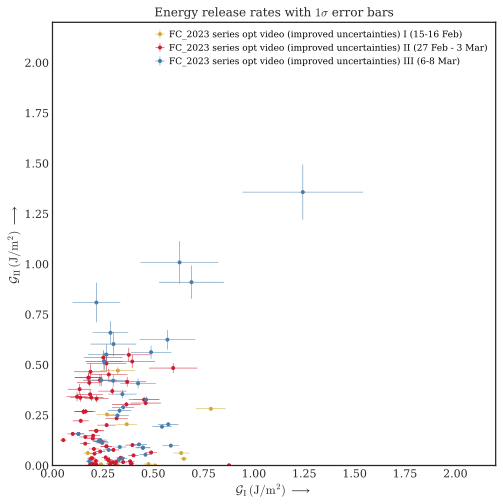

In [316]:
# fracture envelope
REF = False # False if you dont want to have the reference points in it as well
#title = "fracture_envelope_series_default_manual_vs_default_video_cutlength"
#labelz = "default video"

#title = "fracture_envelope_series_default_manual_vs_single_video_cutlength"
#labelz = "single opt video"

#title = "fracture_envelope_series_default_manual_vs_dailymean_video_cutlength"
#labelz = "daily mean video"

#title = "fracture_envelope_series_default_manual_vs_dailyopt_video_cutlength"
#labelz = "daily opt video"

#title = "fracture_envelope_series_default_manual_vs_seriesopt_video_cutlength"
#labelz = "series opt video"

title = "fracture_envelope_seriesopt_video_cutlength_improved_uncertainties"
labelz = "series opt video (improved uncertainties)"

#title = "fracture_envelope_default_manual_cutlength_improved_unc"
#labelz = "default manual cutlength (improved uncertainties)"

# Set plot style
plt.rcdefaults()
#with plt.style.context('dark_background'):
with plt.style.context('seaborn-v0_8-white'):

    # Set fonts
    plt.rc('font', family='serif', size=11)
    plt.rc('mathtext', fontset='cm')

    # Initialize figure and axes
    fig = plt.figure(figsize=[8, 8])
    ax = plt.gca()

    # Match figure and VS code background colors. Theme colors can be found at
    # cmd+shift+P > Developer: Generate Color Theme From Current Settings
    # For background colors see "colors": {"editor.background": ...}
    #fig.set_facecolor('#282c34')
    fig.set_facecolor("white")
    ax.set_facecolor('white')

    # Set axis limits
    plt.axis([0, 2.2, 0, 2.2])
    ax.set_aspect('equal')

    # Set axes labels
    plt.xlabel(r'$\mathcal{G}_\mathrm{I}\, (\mathrm{J/m}^2)\ \longrightarrow$', fontsize=12)
    plt.ylabel(r'$\mathcal{G}_\mathrm{II}\, (\mathrm{J/m}^2)\ \longrightarrow$',fontsize=12)
    
    # Set plot title
    plt.title(r'Energy release rates with $1\sigma$ error bars', size=12)


    # Plot  fracture toughnesses with 1-sigma error bars (series I)
    plt.errorbar(x=x1, y=y1, xerr=x1err, yerr=y1err,
                linestyle='none', marker='o',
                markersize=3, elinewidth=.5,
                color=colors_paper1[0], label="FC_2023 " + labelz + " I (15-16 Feb)")

    # Plot fracture toughnesses with 1-sigma error bars (series II)
    plt.errorbar(x=x2, y=y2, xerr=x2err, yerr=y2err,
                linestyle='none', marker='o',
                markersize=3, elinewidth=.5,
                color=colors_paper1[1], label="FC_2023 " + labelz + " II (27 Feb - 3 Mar)")

    # Plot fracture toughnesses with 1-sigma error bars (series III)
    plt.errorbar(x=x3, y=y3, xerr=x3err, yerr=y3err,
                linestyle='none', marker='o', 
                markersize=3, elinewidth=.5,
                color=colors_paper1[2], label="FC_2023 " + labelz + " III (6-8 Mar)")

    if REF:
        plt.errorbar(x=x1_ref, y=y1_ref, xerr=x1err_ref, yerr=y1err_ref,
            linestyle='none', marker='x',alpha= 0.5,
            markersize=3, elinewidth=.5,
            color=colors_paper1[4], label="FC_2023 REF series I")

    # Plot bunker 2 fracture toughnesses with 1-sigma error bars
    if REF:
        plt.errorbar(x=x2_ref, y=y2_ref, xerr=x2err_ref, yerr=y2err_ref,
                linestyle='none', marker='x',alpha= 0.5,
                markersize=3, elinewidth=.5,
                color=colors_paper1[4], label='FC_2023 REF series II')

    # Plot bunker 2 fracture toughnesses with 1-sigma error bars
    if REF:
        plt.errorbar(x=x3_ref, y=y3_ref, xerr=x3err_ref, yerr=y3err_ref,
                    linestyle='none', marker='x',alpha= 0.5,
                    markersize=3, elinewidth=.5,
                    color=colors_paper1[4],  label="FC_2023 REF series III")
   

    # Show legends
    plt.legend(frameon=False, handletextpad=0, loc='upper right',
               fontsize=9, labelcolor='black')

    plt.savefig(save_fig_path + "20250706_Paper1\\" + title + ".jpg", dpi=600)

# Try to fit the newly obtained "minimal error" data

In [332]:
import energy as nrg
import regression as reg
import visualization as vis

In [373]:
df_test = df.copy()
parameter_GIIc = "GIIc_manual_default"
parameter_GIc = "GIc_manual_default"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df1_dft_man = df_test[df_test['datetime_x']<='2023-02-16']
df2_dft_man = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_dft_man = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_manual_default_min_error"
parameter_GIc = "GIc_manual_default_min_error"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df1_dft_man_min_error = df_test[df_test['datetime_x']<='2023-02-16']
df2_dft_man_min_error = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_dft_man_min_error = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_manual_default_improved_unc"
parameter_GIc = "GIc_manual_default_improved_unc"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df1_dft_man_improved_unc = df_test[df_test['datetime_x']<='2023-02-16']
df2_dft_man_improved_unc = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_dft_man_improved_unc = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_manual_default_perfect_unc"
parameter_GIc = "GIc_manual_default_perfect_unc"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df1_dft_man_perfect_unc = df_test[df_test['datetime_x']<='2023-02-16']
df2_dft_man_perfect_unc = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_dft_man_perfect_unc = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_video_default"
parameter_GIc = "GIc_video_default"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df1_dft_vid = df_test[df_test['datetime_x']<='2023-02-16']
df2_dft_vid = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_dft_vid = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_video_dailyopt"
parameter_GIc = "GIc_video_dailyopt"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df1_day_vid = df_test[df_test['datetime_x']<='2023-02-16']
df2_day_vid = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_day_vid = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]


df_test = df.copy()
parameter_GIIc = "GIIc_video_seriesopt"
parameter_GIc = "GIc_video_seriesopt"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df_ser_vid = df_test

df1_ser_vid = df_test[df_test['datetime_x']<='2023-02-16']
df2_ser_vid = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_ser_vid= df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]


df_test = df.copy()
parameter_GIIc = "GIIc_video_seriesopt_min_error"
parameter_GIc = "GIc_video_seriesopt_min_error"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df_ser_vid_min_error = df_test

df1_ser_vid_min_error = df_test[df_test['datetime_x']<='2023-02-16']
df2_ser_vid_min_error = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_ser_vid_min_error = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_video_seriesopt_improved_unc"
parameter_GIc = "GIc_video_seriesopt_improved_unc"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df_ser_vid_improved_unc = df_test

df1_ser_vid_improved_unc= df_test[df_test['datetime_x']<='2023-02-16']
df2_ser_vid_improved_unc = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_ser_vid_improved_unc = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]

df_test = df.copy()
parameter_GIIc = "GIIc_video_seriesopt_perfect_unc"
parameter_GIc = "GIc_video_seriesopt_perfect_unc"
df_test["GIc"] = df_test[parameter_GIc]
df_test["GIIc"] = df_test[parameter_GIIc]

df_ser_vid_improved_unc = df_test

df1_ser_vid_perfect_unc = df_test[df_test['datetime_x']<='2023-02-16']
df2_ser_vid_perfect_unc = df_test[df_test['datetime_x'].between('2023-02-27','2023-03-03')]
df3_ser_vid_perfect_unc = df_test[df_test['datetime_x'].between('2023-03-06','2023-03-08')]


In [337]:
print(len(df1_ser_vid_improved_unc), len(df2_ser_vid_improved_unc), len(df3_ser_vid_improved_unc))

14 70 36


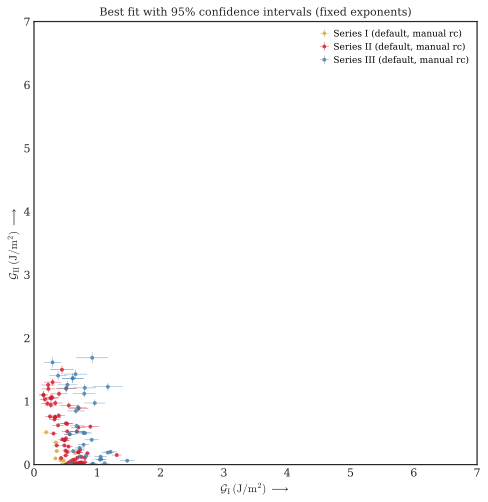

In [341]:
data_dict_advanced = {
    'Series I (default, manual rc)': {'df': df1_dft_man_improved_unc,  'variant': 'B'},
    'Series II (default, manual rc)': {'df': df2_dft_man_improved_unc,  'variant': 'B'},
    'Series III (default, manual rc)': {'df': df3_dft_man_improved_unc,'variant': 'B'}
}
fig, ax = vis.plot_multiple_interactionlaws_fixed_exponents(data_dict_advanced,  save_fig = save_fig_path + "20250706_Paper1\\fits\\", title = "dataset_default_manualrc_improved_unc",Gmax=7.0, colors=colors)
plt.show()

In [340]:
df1_dft_man_improved_unc = df1_dft_man_improved_unc[df1_dft_man_improved_unc["GIc"] < 2]

C:\Users\walet\Anaconda3\envs\weacenv3\Lib\site-packages\pandas\core\ops\array_ops.py:129: FutureWarning: AffineScalarFunc.__lt__() is deprecated. It will be removed in a future release.
  result = libops.scalar_compare(x.ravel(), y, op)


=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (120,)
  Degrees of freedom: 114
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.32071428571428573), np.float64(0.08989285714285715), np.float64(0.26778571428571424), np.float64(0.22862357142857143), np.float64(0.39972222222222226), np.float64(0.3195972222222222)]
  Result: info=2, sum_square=136.320724
  SUCCESS!
Trying starting point 2: [np.float64(0.5131428571428572), np.float64(0.14382857142857144), np.float64(0.4284571428571428), np.float64(0.3657977142857143), np.float64(0.6395555555555557), np.float64(0.5113555555555556)]
  Result: info=2, sum_square=141.708429
  SUCCESS!
Trying starting point 3: [np.float64(0.6414285714285715), np.float64(0.1797857142857143), np.float64(0.535571428571

C:\Users\walet\Desktop\April_Hackathon_2025\code\regression.py:2509: RuntimeWarning: invalid value encountered in power
  dGIc_1 = -(1/n) * (Gi_all/GIc_values)**(1/n-1) * Gi_all / (GIc_values**2)
C:\Users\walet\Desktop\April_Hackathon_2025\code\regression.py:2512: RuntimeWarning: invalid value encountered in power
  dGIc_2 = -(1/n) * (Gi_all/GIc_values)**(1/n-1) * Gi_all / (GIc_values**2)
C:\Users\walet\Desktop\April_Hackathon_2025\code\regression.py:2515: RuntimeWarning: invalid value encountered in power
  dGIc_3 = -(1/n) * (Gi_all/GIc_values)**(1/n-1) * Gi_all / (GIc_values**2)
C:\Users\walet\Desktop\April_Hackathon_2025\code\regression.py:2569: RuntimeWarning: invalid value encountered in power
  dGi = (1/n_fixed) * (Gi_all/GIc_values)**(1/n_fixed-1) / GIc_values


  Result: info=60004, sum_square=inf
  Residual = 108.004397
Testing n=0.30, m=0.20...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.3, m = 0.2
Data assembled successfully:
  Data shape: (120,)
  Degrees of freedom: 114
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.3, m = 0.2
Trying starting point 1: [np.float64(0.32071428571428573), np.float64(0.08989285714285715), np.float64(0.26778571428571424), np.float64(0.22862357142857143), np.float64(0.39972222222222226), np.float64(0.3195972222222222)]
  Result: info=2, sum_square=109.242460
  SUCCESS!
Trying starting point 2: [np.float64(0.5131428571428572), np.float64(0.14382857142857144), np.float64(0.4284571428571428), np.float64(0.3657977142857143), np.float64(0.6395555555555557), np.float64(0.5113555555555556)]
  Result: info=2, sum_square=109.242460
  SUCCESS!
Trying starting point 3: [np.float64(0.6414285714285715), np.float64(0.1797857142857143), np.float64(0.5355714285714285), np.float

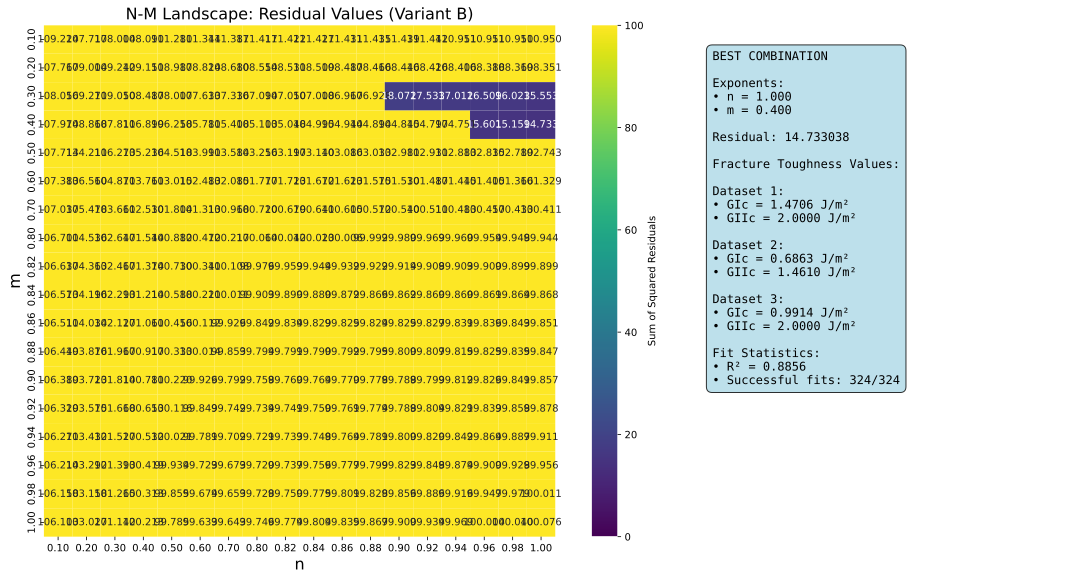


=== ANALYSIS ===
Best with error bars: n=1.00, m=0.40
  Residual: 14.733038
  R²: 0.886


'\nif any(v[\'success\'] for v in results_no_errors.values()):\n    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v[\'success\']], \n                             key=lambda x: x[1][\'residual\'])\n    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")\n    print(f"  Residual: {best_without_errors[1][\'residual\']:.6f}")\n    print(f"  R²: {best_without_errors[1][\'R_squared\']:.3f}")\n    '

In [342]:
# Landscape for the default data - improved uncertainties

# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}
# 2. Create heatmap with error bars
results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_with_errors_bounds2_improved_unc.png"
)
"""
# 3. Create heatmap without error bars
results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_without_errors_bounds2_improved_unc.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_comparison_bounds2_improved_unc.png"
)
"""

# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in results_with_errors.values()):
    best_with_errors = min([(k, v) for k, v in results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={best_with_errors[0][0]:.2f}, m={best_with_errors[0][1]:.2f}")
    print(f"  Residual: {best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {best_with_errors[1]['R_squared']:.3f}")
"""
if any(v['success'] for v in results_no_errors.values()):
    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")
    print(f"  Residual: {best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {best_without_errors[1]['R_squared']:.3f}")
    """

=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (119,)
  Degrees of freedom: 113
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.22582690511084413), np.float64(0.06019024676734251), np.float64(0.26795133602446053), np.float64(0.2283144627210305), np.float64(0.39996786723109745), np.float64(0.31888829392627566)]
  Result: info=2, sum_square=763.165393
  SUCCESS!
Trying starting point 2: [np.float64(0.3613230481773506), np.float64(0.09630439482774802), np.float64(0.42872213763913686), np.float64(0.36530314035364886), np.float64(0.6399485875697559), np.float64(0.5102212702820411)]
  Result: info=2, sum_square=763.165393
  SUCCESS!
Trying starting point 3: [np.float64(0.45165381022168827), np.float64(0.12038049353468502), np.float64(0.53590267

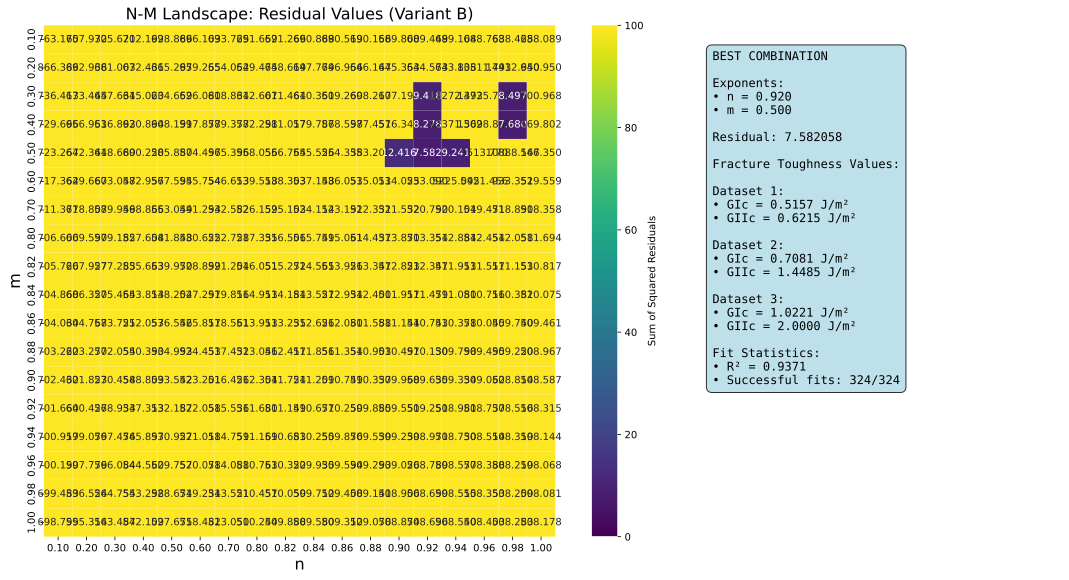


=== ANALYSIS ===
Best with error bars: n=0.92, m=0.50
  Residual: 7.582058
  R²: 0.937


'\nif any(v[\'success\'] for v in results_no_errors.values()):\n    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v[\'success\']], \n                             key=lambda x: x[1][\'residual\'])\n    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")\n    print(f"  Residual: {best_without_errors[1][\'residual\']:.6f}")\n    print(f"  R²: {best_without_errors[1][\'R_squared\']:.3f}")\n    '

In [343]:
# Landscape for the default data - improved uncertainties

# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}
# 2. Create heatmap with error bars
results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_dft_man_improved_unc,df2_dft_man_improved_unc,df3_dft_man_improved_unc],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_with_errors_bounds2_improved_unc_true.png"
)
"""
# 3. Create heatmap without error bars
results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_without_errors_bounds2_improved_unc.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_comparison_bounds2_improved_unc.png"
)
"""

# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in results_with_errors.values()):
    best_with_errors = min([(k, v) for k, v in results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={best_with_errors[0][0]:.2f}, m={best_with_errors[0][1]:.2f}")
    print(f"  Residual: {best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {best_with_errors[1]['R_squared']:.3f}")
"""
if any(v['success'] for v in results_no_errors.values()):
    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")
    print(f"  Residual: {best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {best_without_errors[1]['R_squared']:.3f}")
    """

In [344]:
df1_dft_man_min_error = df1_dft_man_min_error[df1_dft_man_min_error["GIc"] < 2]

C:\Users\walet\Anaconda3\envs\weacenv3\Lib\site-packages\pandas\core\ops\array_ops.py:129: FutureWarning: AffineScalarFunc.__lt__() is deprecated. It will be removed in a future release.
  result = libops.scalar_compare(x.ravel(), y, op)


=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (119,)
  Degrees of freedom: 113
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.22582690511084413), np.float64(0.06019024676734251), np.float64(0.26795133602446053), np.float64(0.2283144627210305), np.float64(0.39996786723109745), np.float64(0.31888829392627566)]
  Result: info=2, sum_square=1185.236989
  SUCCESS!
Trying starting point 2: [np.float64(0.3613230481773506), np.float64(0.09630439482774802), np.float64(0.42872213763913686), np.float64(0.36530314035364886), np.float64(0.6399485875697559), np.float64(0.5102212702820411)]
  Result: info=2, sum_square=1185.236989
  SUCCESS!
Trying starting point 3: [np.float64(0.45165381022168827), np.float64(0.12038049353468502), np.float64(0.535902

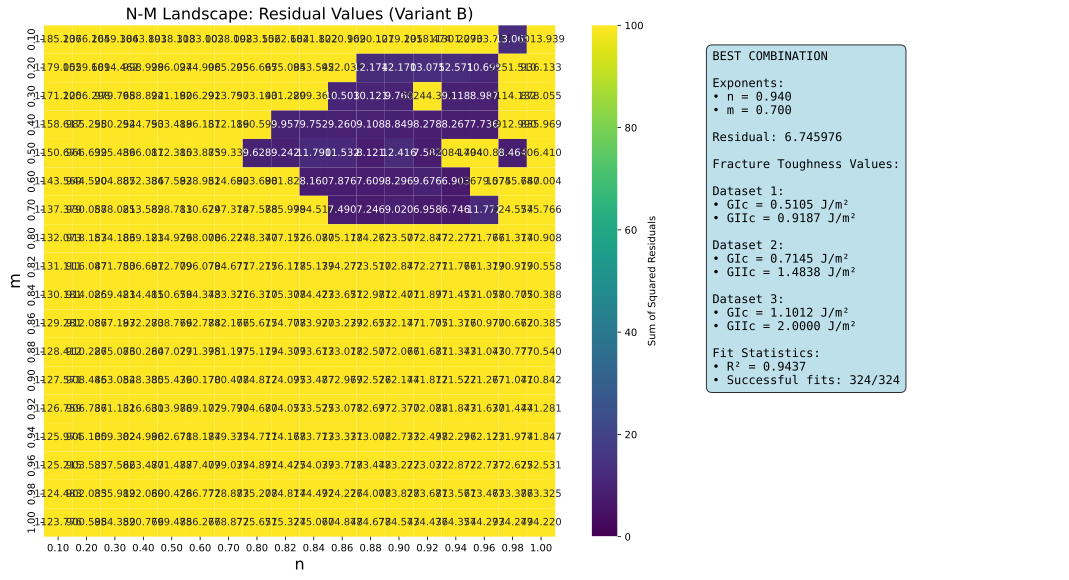


=== ANALYSIS ===
Best with error bars: n=0.94, m=0.70
  Residual: 6.745976
  R²: 0.944


'\nif any(v[\'success\'] for v in results_no_errors.values()):\n    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v[\'success\']], \n                             key=lambda x: x[1][\'residual\'])\n    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")\n    print(f"  Residual: {best_without_errors[1][\'residual\']:.6f}")\n    print(f"  R²: {best_without_errors[1][\'R_squared\']:.3f}")\n    '

In [345]:
# Landscape for the default data - improved uncertainties

# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}
# 2. Create heatmap with error bars
results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_dft_man_min_error,df2_dft_man_min_error,df3_dft_man_min_error],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_with_errors_bounds2_min_error_true.png"
)
"""
# 3. Create heatmap without error bars
results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_without_errors_bounds2_improved_unc.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_comparison_bounds2_improved_unc.png"
)
"""

# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in results_with_errors.values()):
    best_with_errors = min([(k, v) for k, v in results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={best_with_errors[0][0]:.2f}, m={best_with_errors[0][1]:.2f}")
    print(f"  Residual: {best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {best_with_errors[1]['R_squared']:.3f}")
"""
if any(v['success'] for v in results_no_errors.values()):
    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")
    print(f"  Residual: {best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {best_without_errors[1]['R_squared']:.3f}")
    """

=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (120,)
  Degrees of freedom: 114
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.3160583620389571), np.float64(0.11210027514052547), np.float64(0.15076505143702135), np.float64(0.09711898637134843), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=4, sum_square=970.636180
Trying starting point 2: [np.float64(0.5056933792623314), np.float64(0.17936044022484077), np.float64(0.24122408229923417), np.float64(0.1553903781941575), np.float64(0.3097168700169024), np.float64(0.2803701845465449)]
  Result: info=4, sum_square=970.624590
Trying starting point 3: [np.float64(0.6321167240779142), np.float64(0.22420055028105093), np.float64(0.3015301028740427), np.float64(0.19

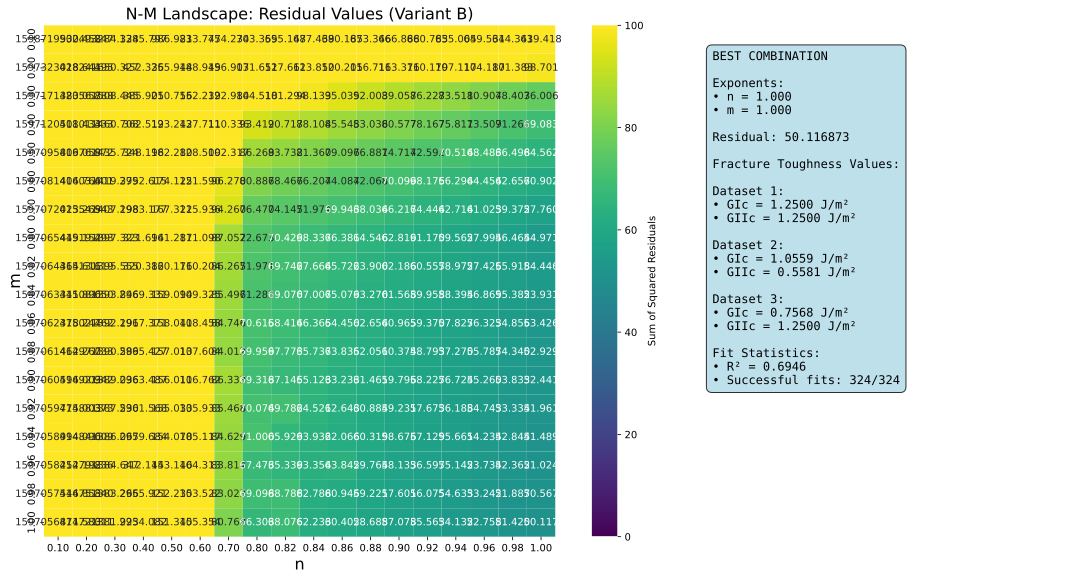


=== ANALYSIS ===
Best with error bars: n=1.00, m=1.00
  Residual: 50.116873
  R²: 0.695


'\nif any(v[\'success\'] for v in opti_results_no_errors.values()):\n    opti_best_without_errors = min([(k, v) for k, v in opti_results_no_errors.items() if v[\'success\']], \n                             key=lambda x: x[1][\'residual\'])\n    print(f"Best without error bars: n={opti_best_without_errors[0][0]:.2f}, m={opti_best_without_errors[0][1]:.2f}")\n    print(f"  Residual: {opti_best_without_errors[1][\'residual\']:.6f}")\n    print(f"  R²: {opti_best_without_errors[1][\'R_squared\']:.3f}")\n'

In [346]:
# Landscape for the new data - improved unc
# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':1.25,
    'GIIc_min': 0.0, 'GIIc_max': 1.25,
}
# 2. Create heatmap with error bars
opti_results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_ser_vid_improved_unc,df2_ser_vid_improved_unc,df3_ser_vid_improved_unc],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_with_errors_bounds125_improved_unc.png"
)
"""
# 3. Create heatmap without error bars
opti_results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_ser_vid_cor,df2_ser_vid_cor,df3_ser_vid_cor],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_without_errors_bounds125.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_ser_vid_cor,df2_ser_vid_cor,df3_ser_vid_cor],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_comparison_bounds125.png"
)
"""
# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in opti_results_with_errors.values()):
    opti_best_with_errors = min([(k, v) for k, v in opti_results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={opti_best_with_errors[0][0]:.2f}, m={opti_best_with_errors[0][1]:.2f}")
    print(f"  Residual: {opti_best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {opti_best_with_errors[1]['R_squared']:.3f}")
    
"""
if any(v['success'] for v in opti_results_no_errors.values()):
    opti_best_without_errors = min([(k, v) for k, v in opti_results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={opti_best_without_errors[0][0]:.2f}, m={opti_best_without_errors[0][1]:.2f}")
    print(f"  Residual: {opti_best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {opti_best_without_errors[1]['R_squared']:.3f}")
"""

In [352]:
# Landscape for the new data - minimal error
# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':1.25,
    'GIIc_min': 0.0, 'GIIc_max': 1.25,
}
# 2. Create heatmap with error bars
opti_results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_ser_vid_min_error,df2_ser_vid_min_error,df3_ser_vid_min_error],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_with_errors_bounds125_min_error.png"
)
"""
# 3. Create heatmap without error bars
opti_results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_ser_vid_cor,df2_ser_vid_cor,df3_ser_vid_cor],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_without_errors_bounds125.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_ser_vid_cor,df2_ser_vid_cor,df3_ser_vid_cor],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_comparison_bounds125.png"
)
"""
# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in opti_results_with_errors.values()):
    opti_best_with_errors = min([(k, v) for k, v in opti_results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={opti_best_with_errors[0][0]:.2f}, m={opti_best_with_errors[0][1]:.2f}")
    print(f"  Residual: {opti_best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {opti_best_with_errors[1]['R_squared']:.3f}")
    
"""
if any(v['success'] for v in opti_results_no_errors.values()):
    opti_best_without_errors = min([(k, v) for k, v in opti_results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={opti_best_without_errors[0][0]:.2f}, m={opti_best_without_errors[0][1]:.2f}")
    print(f"  Residual: {opti_best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {opti_best_without_errors[1]['R_squared']:.3f}")
"""

=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (120,)
  Degrees of freedom: 114
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.3160583620389571), np.float64(0.11210027514052547), np.float64(0.15076505143702135), np.float64(0.09711898637134843), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=4, sum_square=971.462033
Trying starting point 2: [np.float64(0.5056933792623314), np.float64(0.17936044022484077), np.float64(0.24122408229923417), np.float64(0.1553903781941575), np.float64(0.3097168700169024), np.float64(0.2803701845465449)]
  Result: info=12, sum_square=20000000026051.191406
Trying starting point 3: [np.float64(0.6321167240779142), np.float64(0.22420055028105093), np.float64(0.3015301028740427), np.


KeyboardInterrupt



In [353]:
# Visualisation for the default , minimal uncertainty fit

#results default data with best outcomes, n = 0.94, m= 0.7
n = 0.94
m= 0.7
my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}

results = reg.odr_multi_dataset_fixed_exponents(
            [df1_dft_man_min_error, df2_dft_man_min_error, df3_dft_man_min_error], 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )

=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.94, m = 0.7
Data assembled successfully:
  Data shape: (119,)
  Degrees of freedom: 113
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.94, m = 0.7
Trying starting point 1: [np.float64(0.22582690511084413), np.float64(0.06019024676734251), np.float64(0.26795133602446053), np.float64(0.2283144627210305), np.float64(0.39996786723109745), np.float64(0.31888829392627566)]
  Result: info=4, sum_square=642.474896
Trying starting point 2: [np.float64(0.3613230481773506), np.float64(0.09630439482774802), np.float64(0.42872213763913686), np.float64(0.36530314035364886), np.float64(0.6399485875697559), np.float64(0.5102212702820411)]
  Result: info=4, sum_square=642.340340
Trying starting point 3: [np.float64(0.45165381022168827), np.float64(0.12038049353468502), np.float64(0.5359026720489211), np.float64(0.456628925442061), np.float64(0.7999357344621949), np.float64(0.6377765878525513)]
  Result: info=4

C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1575: RuntimeWarning: invalid value encountered in power
  Gii_fit = GIIc * (1 - (G_values/GIc)**(1/n))**(1/(1/m))
C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1608: RuntimeWarning: invalid value encountered in power
  Gii_fit_upper = GIIc_upper * (1 - (G_values/GIc_lower)**(1/n))**(1/(1/m))
C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1616: RuntimeWarning: invalid value encountered in power
  Gii_fit_lower = GIIc_lower * (1 - (G_values/GIc_upper)**(1/n))**(1/(1/m))



=== Series I (default, manual rc) Confidence Intervals ===
GIc: 0.5105 ± 0.0258 = [0.4848, 0.5363]
GIIc: 0.9187 ± 0.0258 = [0.8929, 0.9444]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0203 to 0.9337
Lower curve range: 0.0219 to 0.8838
Band width range: 0.000138 to 0.164780
Average band width: 0.040808
Plotted confidence interval band for Series I (default, manual rc)

=== Series II (default, manual rc) Confidence Intervals ===
GIc: 0.7145 ± 0.0258 = [0.6887, 0.7402]
GIIc: 1.4838 ± 0.0258 = [1.4581, 1.5096]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0289 to 1.4979
Lower curve range: 0.0316 to 1.4476
Band width range: 0.000215 to 0.213639
Average band width: 0.047871
Plotted confidence interval band for Series II (default, manual rc)

=== Series III (default, manual rc) Confidence Intervals ===
GIc: 1.1012 ± 0.0258 = [1.0754, 1.1269]
GIIc: 2.0000 ± 0.0258 = [1.9742, 2.0258]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve 

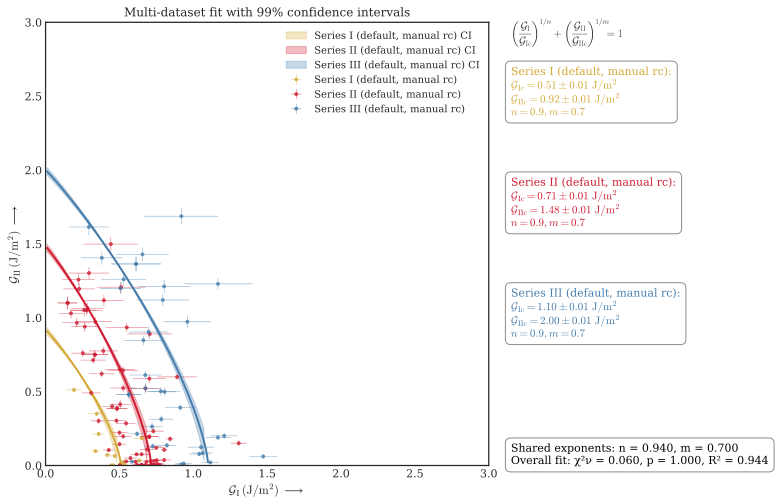

In [354]:
# Example usage with chi-squared statistics
fit_result = results
data_dict_with_ci = {
    'Series I (default, manual rc)': {
        'df': df1_dft_man_min_error,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_1'],
            'GIIc': fit_result['GIIc_1'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_1'],
            'GIIc': fit_result['stddev_GIIc_1'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series II (default, manual rc)': {
        'df': df2_dft_man_min_error,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_2'],
            'GIIc': fit_result['GIIc_2'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_2'],
            'GIIc': fit_result['stddev_GIIc_2'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series III (default, manual rc)': {
        'df': df3_dft_man_min_error,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_3'],
            'GIIc': fit_result['GIIc_3'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_3'],
            'GIIc': fit_result['stddev_GIIc_3'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
}

# Add overall fit statistics
overall_stats = {
    'reduced_chi_squared': fit_result['reduced_chi_squared'],
    'p_value': fit_result['p_value'],
    'R_squared': fit_result['R_squared']
}

# Add to first dataset for overall display
data_dict_with_ci[list(data_dict_with_ci.keys())[0]]['overall_fit_stats'] = overall_stats

fig, ax = vis.plot_multiple_interactionlaws_with_fit(
    data_dict_with_ci, 
    save_fig=save_fig_path + "20250706_Paper1\\fits\\", 
    title="default_manual_bounds2_minerror_n094_m07", 
    Gmax=3.0, 
    colors=colors, ci=0.99
)

In [355]:
# Visualisation for the default improved fit

#results default data with best outcomes, n = 0.92, m= 0.5
n = 0.92
m= 0.5
my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}

results = reg.odr_multi_dataset_fixed_exponents(
            [df1_dft_man_improved_unc, df2_dft_man_improved_unc, df3_dft_man_improved_unc], 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )

=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.92, m = 0.5
Data assembled successfully:
  Data shape: (119,)
  Degrees of freedom: 113
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.92, m = 0.5
Trying starting point 1: [np.float64(0.22582690511084413), np.float64(0.06019024676734251), np.float64(0.26795133602446053), np.float64(0.2283144627210305), np.float64(0.39996786723109745), np.float64(0.31888829392627566)]
  Result: info=4, sum_square=496.641161
Trying starting point 2: [np.float64(0.3613230481773506), np.float64(0.09630439482774802), np.float64(0.42872213763913686), np.float64(0.36530314035364886), np.float64(0.6399485875697559), np.float64(0.5102212702820411)]
  Result: info=4, sum_square=496.632311
Trying starting point 3: [np.float64(0.45165381022168827), np.float64(0.12038049353468502), np.float64(0.5359026720489211), np.float64(0.456628925442061), np.float64(0.7999357344621949), np.float64(0.6377765878525513)]
  Result: info=4

C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1575: RuntimeWarning: invalid value encountered in sqrt
  Gii_fit = GIIc * (1 - (G_values/GIc)**(1/n))**(1/(1/m))
C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1608: RuntimeWarning: invalid value encountered in sqrt
  Gii_fit_upper = GIIc_upper * (1 - (G_values/GIc_lower)**(1/n))**(1/(1/m))
C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1616: RuntimeWarning: invalid value encountered in sqrt
  Gii_fit_lower = GIIc_lower * (1 - (G_values/GIc_upper)**(1/n))**(1/(1/m))



=== Series I (default, manual rc) Confidence Intervals ===
GIc: 0.5157 ± 0.0258 = [0.4900, 0.5415]
GIIc: 0.6215 ± 0.0258 = [0.5958, 0.6473]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0320 to 0.6426
Lower curve range: 0.0352 to 0.5919
Band width range: 0.000233 to 0.161158
Average band width: 0.033882
Plotted confidence interval band for Series I (default, manual rc)

=== Series II (default, manual rc) Confidence Intervals ===
GIc: 0.7081 ± 0.0258 = [0.6824, 0.7339]
GIIc: 1.4485 ± 0.0258 = [1.4228, 1.4743]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0818 to 1.4668
Lower curve range: 0.0877 to 1.4161
Band width range: 0.000274 to 0.317886
Average band width: 0.048641
Plotted confidence interval band for Series II (default, manual rc)

=== Series III (default, manual rc) Confidence Intervals ===
GIc: 1.0221 ± 0.0258 = [0.9963, 1.0478]
GIIc: 2.0000 ± 0.0258 = [1.9742, 2.0258]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve 

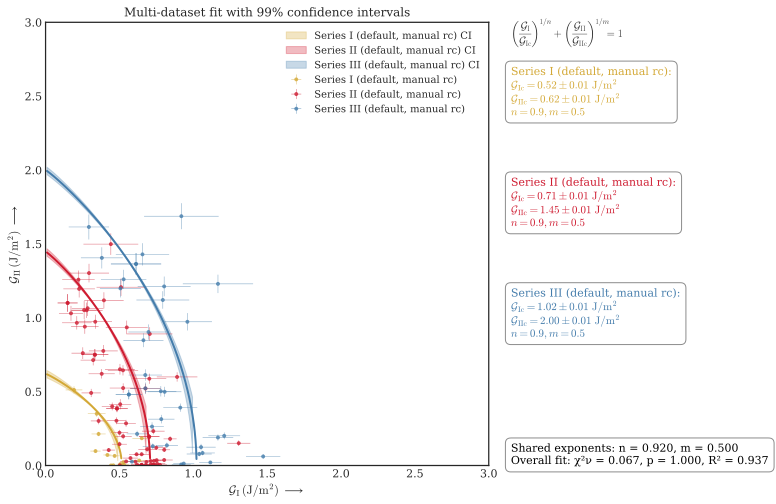

In [356]:
# Example usage with chi-squared statistics
fit_result = results
data_dict_with_ci = {
    'Series I (default, manual rc)': {
        'df': df1_dft_man_improved_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_1'],
            'GIIc': fit_result['GIIc_1'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_1'],
            'GIIc': fit_result['stddev_GIIc_1'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series II (default, manual rc)': {
        'df': df2_dft_man_improved_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_2'],
            'GIIc': fit_result['GIIc_2'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_2'],
            'GIIc': fit_result['stddev_GIIc_2'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series III (default, manual rc)': {
        'df': df3_dft_man_improved_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_3'],
            'GIIc': fit_result['GIIc_3'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_3'],
            'GIIc': fit_result['stddev_GIIc_3'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
}

# Add overall fit statistics
overall_stats = {
    'reduced_chi_squared': fit_result['reduced_chi_squared'],
    'p_value': fit_result['p_value'],
    'R_squared': fit_result['R_squared']
}

# Add to first dataset for overall display
data_dict_with_ci[list(data_dict_with_ci.keys())[0]]['overall_fit_stats'] = overall_stats

fig, ax = vis.plot_multiple_interactionlaws_with_fit(
    data_dict_with_ci, 
    save_fig=save_fig_path + "20250706_Paper1\\fits\\", 
    title="default_manual_bounds2_improvedunc_n092_m05", 
    Gmax=3.0, 
    colors=colors, ci=0.99
)

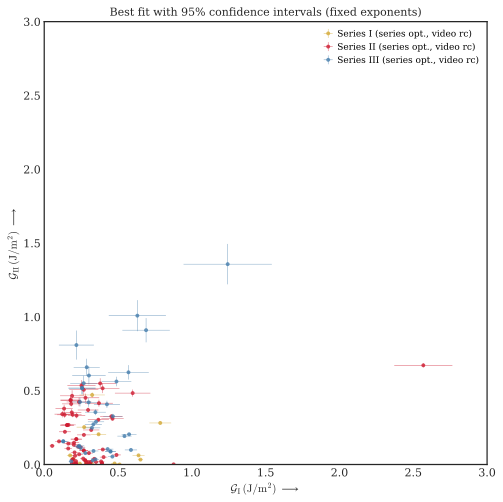

In [357]:
data_dict_advanced = {
    'Series I (series opt., video rc)': {'df': df1_ser_vid_min_error,  'variant': 'B'},
    'Series II (series opt., video rc)': {'df': df2_ser_vid_min_error,  'variant': 'B'},
    'Series III (series opt., video rc)': {'df': df3_ser_vid_min_error,'variant': 'B'}
}
fig, ax = vis.plot_multiple_interactionlaws_fixed_exponents(data_dict_advanced,  save_fig = save_fig_path + "20250706_Paper1\\fits\\", title = "dataset_ser_vid_min_error",Gmax=3.0, colors=colors)
plt.show()

In [358]:
# fit with the opti data - min uncertainty
#results opti data with best outcomes, n = 1, m= 1
n =1
m= 1
my_bounds = {
    'GIc_min': 0.0, 'GIc_max':1.25,
    'GIIc_min': 0.0, 'GIIc_max': 1.25,
}

results = reg.odr_multi_dataset_fixed_exponents(
            [df1_ser_vid_min_error, df2_ser_vid_min_error, df3_ser_vid_min_error], 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )


=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 1, m = 1
Data assembled successfully:
  Data shape: (120,)
  Degrees of freedom: 114
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 1, m = 1
Trying starting point 1: [np.float64(0.3160583620389571), np.float64(0.11210027514052547), np.float64(0.15076505143702135), np.float64(0.09711898637134843), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=12, sum_square=2977.385044
Trying starting point 2: [np.float64(0.5056933792623314), np.float64(0.17936044022484077), np.float64(0.24122408229923417), np.float64(0.1553903781941575), np.float64(0.3097168700169024), np.float64(0.2803701845465449)]
  Result: info=12, sum_square=2977.385084
Trying starting point 3: [np.float64(0.6321167240779142), np.float64(0.22420055028105093), np.float64(0.3015301028740427), np.float64(0.19423797274269686), np.float64(0.387146087521128), np.float64(0.3504627306831811)]
  Result: info=12, sum_sq


=== Series I (series opt., video rc) Confidence Intervals ===
GIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
GIIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0039 to 1.2653
Lower curve range: 0.0060 to 1.2146
Band width range: 0.000083 to 0.050692
Average band width: 0.025104
Plotted confidence interval band for Series I (series opt., video rc)

=== Series II (series opt., video rc) Confidence Intervals ===
GIc: 1.0559 ± 0.0258 = [1.0302, 1.0817]
GIIc: 0.5581 ± 0.0258 = [0.5323, 0.5839]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0032 to 0.5782
Lower curve range: 0.0006 to 0.5274
Band width range: 0.000127 to 0.050770
Average band width: 0.021246
Plotted confidence interval band for Series II (series opt., video rc)

=== Series III (series opt., video rc) Confidence Intervals ===
GIc: 0.7568 ± 0.0258 = [0.7310, 0.7825]
GIIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
Standard deviations: GIc=0.010000, GIIc=0.0100

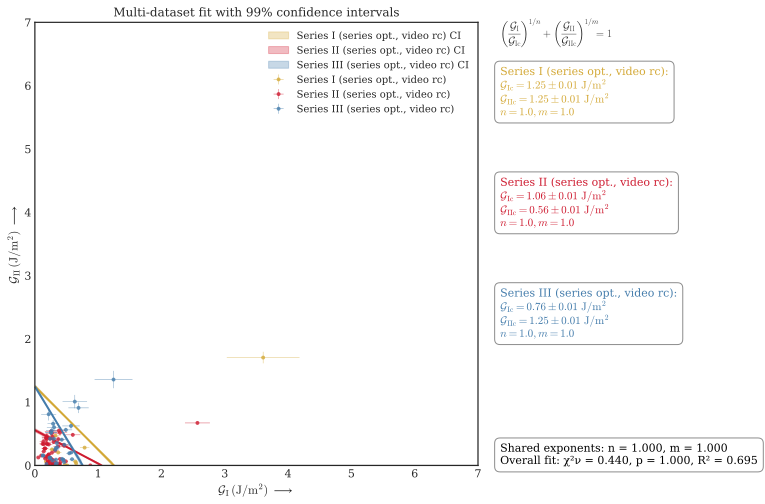

In [360]:
# Example usage with chi-squared statistics
fit_result = results
data_dict_with_ci = {
    'Series I (series opt., video rc)': {
        'df': df1_ser_vid_min_error,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_1'],
            'GIIc': fit_result['GIIc_1'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_1'],
            'GIIc': fit_result['stddev_GIIc_1'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series II (series opt., video rc)': {
        'df': df2_ser_vid_min_error,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_2'],
            'GIIc': fit_result['GIIc_2'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_2'],
            'GIIc': fit_result['stddev_GIIc_2'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series III (series opt., video rc)': {
        'df': df3_ser_vid_min_error,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_3'],
            'GIIc': fit_result['GIIc_3'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_3'],
            'GIIc': fit_result['stddev_GIIc_3'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
}

# Add overall fit statistics
overall_stats = {
    'reduced_chi_squared': fit_result['reduced_chi_squared'],
    'p_value': fit_result['p_value'],
    'R_squared': fit_result['R_squared']
}

# Add to first dataset for overall display
data_dict_with_ci[list(data_dict_with_ci.keys())[0]]['overall_fit_stats'] = overall_stats

fig, ax = vis.plot_multiple_interactionlaws_with_fit(
    data_dict_with_ci, 
    save_fig=save_fig_path + "20250706_Paper1\\fits\\", 
    title="opti_video_bounds125_n1_m1_min_error", 
    Gmax=7.0, 
    colors=colors, ci=0.99
)

In [361]:
# fit with the opti data - min uncertainty
#results opti data with best outcomes, n = 1, m= 1
n =1
m= 1
my_bounds = {
    'GIc_min': 0.0, 'GIc_max':1.25,
    'GIIc_min': 0.0, 'GIIc_max': 1.25,
}

results = reg.odr_multi_dataset_fixed_exponents(
            [df1_ser_vid_improved_unc, df2_ser_vid_improved_unc, df3_ser_vid_improved_unc], 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )


=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 1, m = 1
Data assembled successfully:
  Data shape: (120,)
  Degrees of freedom: 114
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 1, m = 1
Trying starting point 1: [np.float64(0.3160583620389571), np.float64(0.11210027514052547), np.float64(0.15076505143702135), np.float64(0.09711898637134843), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=12, sum_square=2924.401629
Trying starting point 2: [np.float64(0.5056933792623314), np.float64(0.17936044022484077), np.float64(0.24122408229923417), np.float64(0.1553903781941575), np.float64(0.3097168700169024), np.float64(0.2803701845465449)]
  Result: info=12, sum_square=2924.401619
Trying starting point 3: [np.float64(0.6321167240779142), np.float64(0.22420055028105093), np.float64(0.3015301028740427), np.float64(0.19423797274269686), np.float64(0.387146087521128), np.float64(0.3504627306831811)]
  Result: info=12, sum_sq


=== Series I (series opt., video rc) Confidence Intervals ===
GIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
GIIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0039 to 1.2653
Lower curve range: 0.0060 to 1.2146
Band width range: 0.000083 to 0.050692
Average band width: 0.025104
Plotted confidence interval band for Series I (series opt., video rc)

=== Series II (series opt., video rc) Confidence Intervals ===
GIc: 1.0559 ± 0.0258 = [1.0302, 1.0817]
GIIc: 0.5581 ± 0.0258 = [0.5323, 0.5839]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0032 to 0.5782
Lower curve range: 0.0006 to 0.5274
Band width range: 0.000127 to 0.050770
Average band width: 0.021246
Plotted confidence interval band for Series II (series opt., video rc)

=== Series III (series opt., video rc) Confidence Intervals ===
GIc: 0.7568 ± 0.0258 = [0.7310, 0.7825]
GIIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
Standard deviations: GIc=0.010000, GIIc=0.0100

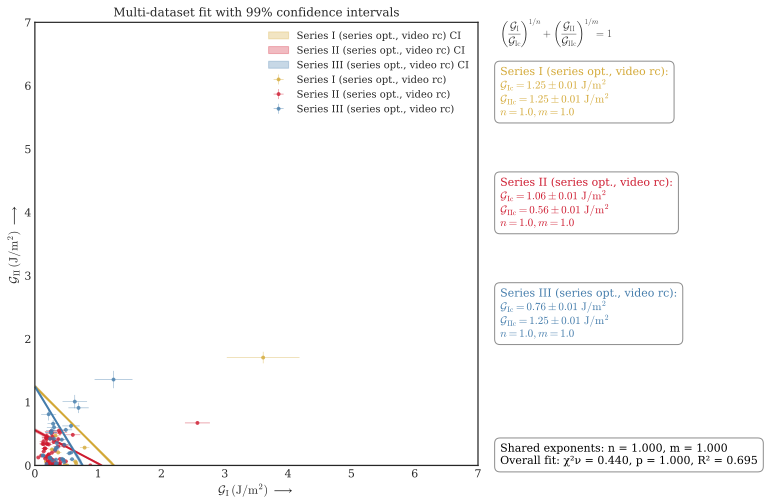

In [362]:
# Example usage with chi-squared statistics
fit_result = results
data_dict_with_ci = {
    'Series I (series opt., video rc)': {
        'df': df1_ser_vid_improved_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_1'],
            'GIIc': fit_result['GIIc_1'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_1'],
            'GIIc': fit_result['stddev_GIIc_1'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series II (series opt., video rc)': {
        'df': df2_ser_vid_improved_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_2'],
            'GIIc': fit_result['GIIc_2'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_2'],
            'GIIc': fit_result['stddev_GIIc_2'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series III (series opt., video rc)': {
        'df': df3_ser_vid_improved_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_3'],
            'GIIc': fit_result['GIIc_3'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_3'],
            'GIIc': fit_result['stddev_GIIc_3'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
}

# Add overall fit statistics
overall_stats = {
    'reduced_chi_squared': fit_result['reduced_chi_squared'],
    'p_value': fit_result['p_value'],
    'R_squared': fit_result['R_squared']
}

# Add to first dataset for overall display
data_dict_with_ci[list(data_dict_with_ci.keys())[0]]['overall_fit_stats'] = overall_stats

fig, ax = vis.plot_multiple_interactionlaws_with_fit(
    data_dict_with_ci, 
    save_fig=save_fig_path + "20250706_Paper1\\fits\\", 
    title="opti_video_bounds125_n1_m1_improved_unc", 
    Gmax=7.0, 
    colors=colors, ci=0.99
)

# Perfect uncertainties (including uncertainties for slab density and thicknesses)

In [365]:
df["layers"][0]
layers_array = parse_layers_string(df["layers"][0])
layers_array

array([[262.  ,  33.75],
       [242.  ,  33.75],
       [258.  ,  33.75],
       [294.  ,  33.75]])

In [366]:
original_array = np.array([[262.  ,  33.75],
                          [242.  ,  33.75],
                          [258.  ,  33.75],
                          [294.  ,  33.75]])

# Create uncertainties array with 5% error
uncertainties_array = original_array * 0.05  # 5% of each value

# Create unumpy array
uarray_with_5_percent = unumpy.uarray(original_array, uncertainties_array)

print("Original array:")
print(original_array)
print("\nUncertainties (5% of each value):")
print(uncertainties_array)
print("\nUnumpy array with 5% uncertainties:")
print(uarray_with_5_percent)

Original array:
[[262.    33.75]
 [242.    33.75]
 [258.    33.75]
 [294.    33.75]]

Uncertainties (5% of each value):
[[13.1     1.6875]
 [12.1     1.6875]
 [12.9     1.6875]
 [14.7     1.6875]]

Unumpy array with 5% uncertainties:
[[262.0+/-13.100000000000001 33.75+/-1.6875]
 [242.0+/-12.100000000000001 33.75+/-1.6875]
 [258.0+/-12.9 33.75+/-1.6875]
 [294.0+/-14.700000000000001 33.75+/-1.6875]]


In [368]:
# Initialize output arrays
G1c, G2c, Gc, G2G, slope_incl, surface_lineload, rc = [], [], [], [], [], [], []

def safe_literal_eval(s):
    if isinstance(s, str):
        # Replace 'nan' with 'None' which literal_eval can handle
        s = s.replace('nan', 'None')
        try:
            result = literal_eval(s)
            # Convert None back to np.nan
            if isinstance(result, list):
                result = [[np.nan if x is None else x for x in sublist] for sublist in result]
            return result
        except:
            return s
    return s
    
def parse_layers_string(layers_str):
    """Manually parse the layers string"""
    # Remove outer brackets
    layers_str = layers_str.strip('[]')
    
    # Split by '], [' to get individual layers
    layer_strings = layers_str.split('], [')
    
    layers_list = []
    for layer_str in layer_strings:
        # Remove any remaining brackets
        layer_str = layer_str.strip('[]')
        # Split by comma and convert to floats
        values = [float(x.strip()) for x in layer_str.split(',')]
        layers_list.append(values)
    
    return np.array(layers_list)

# Loop through individual experiments
for i, exp in df.iterrows():

    # Unpack deterministric dataframe inputs
    #n = exp.bunker                          # Bunker number
    E = 0.25
    nu = 0.25
    G = E/2/(1+nu)

    # Unpack uncertain dataframe inputs
    a = ufloat(exp.rc, 2, 'a')                                         # Cut length +/- 2mm
    t = ufloat(30, 1, 't')                                         # Weak-layer thickness +/- 1 mm
    phi = ufloat(exp.slope_incl.nominal_value, 2, 'phi')                              # Slope angle (degrees) +/- 2°

    p = ufloat(exp.surface_lineload.nominal_value, 0.025*exp.surface_lineload.nominal_value, 'p')    # Surface line load (N/mm) 2.5% overall 
    cut_direction = exp.cut_direction
    length = ufloat(exp.slablength, 0.005*exp.slablength , "length") #0.5 percent
    layers_array = parse_layers_string(exp["layers"])
    # Create uncertainties array with 5% error
    uncertainties_array = original_array * 0.05  # 5% of each value

    # Create unumpy array
    uarray_with_5_percent = unumpy.uarray(original_array, uncertainties_array)
    
    # Write to dataframe
    #print(i, np.array(safe_literal_eval(exp["layers"])))
    G1c_i = wGIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=4.4)
    G2c_i = wGIIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=4.4)
    if G1c_i == "nan" or pd.isna(G1c_i):
        print("check", exp["exp_id"])
     
    G1c.append(G1c_i)
    G2c.append(G2c_i)
    Gc.append(G1c_i+G2c_i)
    G2G.append(G2c_i/(G1c_i+G2c_i))
    slope_incl.append(phi)
    surface_lineload.append(p)
    rc.append(a)
    #G2G.aoppend()
    
# Add fracture toughnesses to dataframe
df['GIc_manual_default_perfect_unc'] = G1c
df['GIIc_manual_default_perfect_unc'] = G2c
df['Gc_manual_default_perfect_unc'] = Gc
df['GIIG_manual_default_perfect_unc'] = G2G
df['slope_incl_perfect_unc']=slope_incl
df['surface_lineload_perfect_unc']=surface_lineload
df['rc_manual']=rc
#df_tft['GIIG'] = G2c/(G1c+G2c)

df.to_pickle(workspace+ '%s.pkl'%("df_default_measured_cutlength" +'_filtered_YESoutliers_unc_perfect'))

In [371]:
# Initialize output arrays
G1c, G2c, Gc, G2G, slope_incl, surface_lineload, rc = [], [], [], [], [], [], []

# Also track which rows we're processing
processed_rows = []

# Loop through individual experiments
for i, exp in df.iterrows():
    if isinstance(exp.E_wl_series_opt, int) or isinstance(exp.E_wl_series_opt, float):
        if not np.isnan(exp.E_wl_series_opt):
            # Unpack deterministic dataframe inputs
            E = ufloat(exp.E_wl_series_opt, exp.ci1_series_opt,"E")  # outcomes of series optimization
            print("E_wl", E)
            nu = 0.25
            G = E/2/(1+nu)
            
            # Unpack uncertain dataframe inputs

            if not pd.isna(exp.video_cutlength):
                if exp.video_cutlength == "Outlier":
                        print(f"video_cutlength is Outlier, using rc: {exp.video_cutlength}")
                        a = ufloat(exp.rc, 2, 'a')
                else:
                    a = ufloat(exp.video_cutlength, 1, 'a')  # VIDEO Cut length +/- 1 mm
            else:
                print(f"video_cutlength is NaN, using rc: {exp.rc}")
                a = ufloat(exp.rc, 2, 'a')
            t = ufloat(30, 1, 't')  # Weak-layer thickness +/- 1 mm


            #surface_lineload_nominal = extract_nominal_from_string(exp.surface_lineload)

            phi = ufloat(exp.slope_incl.nominal_value, 2, 'phi')  # Slope angle (degrees) +/- 2°
            p = ufloat(exp.surface_lineload.nominal_value, 0.01*exp.surface_lineload.nominal_value, 'p')  # Surface line load (N/mm) 1% overall 
            cut_direction = exp.cut_direction
        
            C1 = ufloat(exp.C1_series_opt, exp.ci2_series_opt,"C1")  # outcomes of series optimization
            print("C1", C1)
            length = ufloat(exp.slablength, 0.005*exp.slablength , "length") #0.5 percent
            
            layers_array = parse_layers_string(exp["layers"])
            # Write to dataframe
            G1c_i = wGIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=C1)
            G2c_i = wGIIc(layers_array, phi, a, p, t, E, cut_direction, nu=0.25, L=length, C1=C1)
            
            # Append results and track the row
            G1c.append(G1c_i)
            G2c.append(G2c_i)
            Gc.append(G1c_i + G2c_i)
            G2G.append(G2c_i / (G1c_i + G2c_i))
            slope_incl.append(phi)
            surface_lineload.append(p)
            rc.append(a)
            processed_rows.append(i)

print(f"Processed {len(processed_rows)} rows with E_wl_series_opt")

# Initialize columns with None to handle ufloat objects
df['GIc_video_seriesopt_perfect_unc'] = None
df['GIIc_video_seriesopt_perfect_unc'] = None
df['Gc_video_seriesopt_perfect_unc'] = None
df['GIIG_video_seriesopt_perfect_unc'] = None

# Add fracture toughnesses to dataframe only for processed rows
for i, row_idx in enumerate(processed_rows):
    df.at[row_idx, 'GIc_video_seriesopt_perfect_unc'] = G1c[i]
    df.at[row_idx, 'GIIc_video_seriesopt_perfect_unc'] = G2c[i]
    df.at[row_idx, 'Gc_video_seriesopt_perfect_unc'] = Gc[i]
    df.at[row_idx, 'GIIG_video_seriesopt_perfect_unc'] = G2G[i]

# Optional: Add the other columns if you want them
# df['slope_incl_dailyopt'] = None
# df['surface_lineload_dailyopt'] = None
# df['rc_dailyopt'] = None

# for i, row_idx in enumerate(processed_rows):
#     df.at[row_idx, 'slope_incl_dailyopt'] = slope_incl[i]
#     df.at[row_idx, 'surface_lineload_dailyopt'] = surface_lineload[i]
#     df.at[row_idx, 'rc_dailyopt'] = rc[i]

df.to_pickle(workspace + '%s.pkl' % ("df_series_opti_video_cutlength" + '_filtered_YESoutliers_unc_perfect'))

print(f"Successfully added fracture toughness values to {len(processed_rows)} rows")

E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 222.5
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 162.5
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
video_cutlength is NaN, using rc: 675.0
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 0.5510+/-0.0010
C1 5.1970+/-0.0020
E_wl 1.383+/-0.015
video_cutlength is NaN, using rc: 500.0
C1 4.957+/-0.005
E_wl 1.383+/-0.015
video_cutlength is NaN, using rc: 460.0
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.957+/-0.005
E_wl 1.383+/-0.015
C1 4.

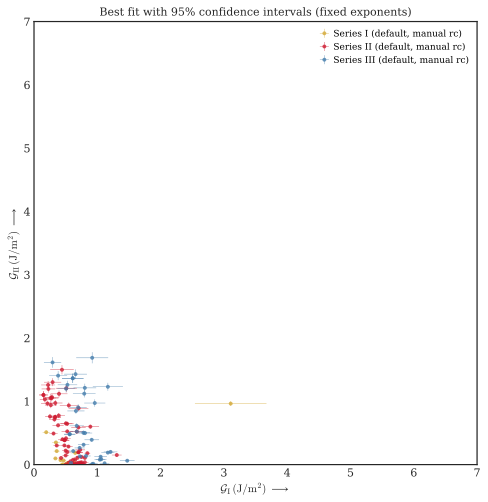

In [374]:
data_dict_advanced = {
    'Series I (default, manual rc)': {'df': df1_dft_man_perfect_unc,  'variant': 'B'},
    'Series II (default, manual rc)': {'df': df2_dft_man_perfect_unc,  'variant': 'B'},
    'Series III (default, manual rc)': {'df': df3_dft_man_perfect_unc,'variant': 'B'}
}
fig, ax = vis.plot_multiple_interactionlaws_fixed_exponents(data_dict_advanced,  save_fig = save_fig_path + "20250706_Paper1\\fits\\", title = "dataset_default_manualrc_perfect_unc",Gmax=7.0, colors=colors)
plt.show()

In [375]:
df1_dft_man_perfect_unc = df1_dft_man_perfect_unc[df1_dft_man_perfect_unc["GIc"] < 2]

C:\Users\walet\Anaconda3\envs\weacenv3\Lib\site-packages\pandas\core\ops\array_ops.py:129: FutureWarning: AffineScalarFunc.__lt__() is deprecated. It will be removed in a future release.
  result = libops.scalar_compare(x.ravel(), y, op)


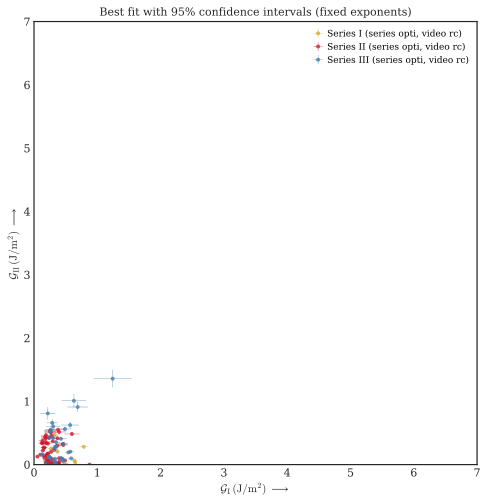

In [378]:
data_dict_advanced = {
    'Series I (series opti, video rc)': {'df':df1_ser_vid_perfect_unc,  'variant': 'B'},
    'Series II (series opti, video rc)': {'df': df2_ser_vid_perfect_unc,  'variant': 'B'},
    'Series III (series opti, video rc)': {'df': df3_ser_vid_perfect_unc,'variant': 'B'}
}
fig, ax = vis.plot_multiple_interactionlaws_fixed_exponents(data_dict_advanced,  save_fig = save_fig_path + "20250706_Paper1\\fits\\", title = "dataset_opti_videorc_perfect_unc",Gmax=7.0, colors=colors)
plt.show()

In [377]:
df1_ser_vid_perfect_unc = df1_ser_vid_perfect_unc[df1_ser_vid_perfect_unc["GIc"] < 1.25]
df2_ser_vid_perfect_unc = df2_ser_vid_perfect_unc[df2_ser_vid_perfect_unc["GIc"] < 1.25]
df3_ser_vid_perfect_unc = df3_ser_vid_perfect_unc[df3_ser_vid_perfect_unc["GIc"] < 1.25]


C:\Users\walet\Anaconda3\envs\weacenv3\Lib\site-packages\pandas\core\ops\array_ops.py:129: FutureWarning: AffineScalarFunc.__lt__() is deprecated. It will be removed in a future release.
  result = libops.scalar_compare(x.ravel(), y, op)


=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (119,)
  Degrees of freedom: 113
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.22582690511084413), np.float64(0.06019024676734251), np.float64(0.26795133602446053), np.float64(0.2283144627210305), np.float64(0.39996786723109745), np.float64(0.31888829392627566)]
  Result: info=2, sum_square=766.359425
  SUCCESS!
Trying starting point 2: [np.float64(0.3613230481773506), np.float64(0.09630439482774802), np.float64(0.42872213763913686), np.float64(0.36530314035364886), np.float64(0.6399485875697559), np.float64(0.5102212702820411)]
  Result: info=2, sum_square=766.359425
  SUCCESS!
Trying starting point 3: [np.float64(0.45165381022168827), np.float64(0.12038049353468502), np.float64(0.53590267

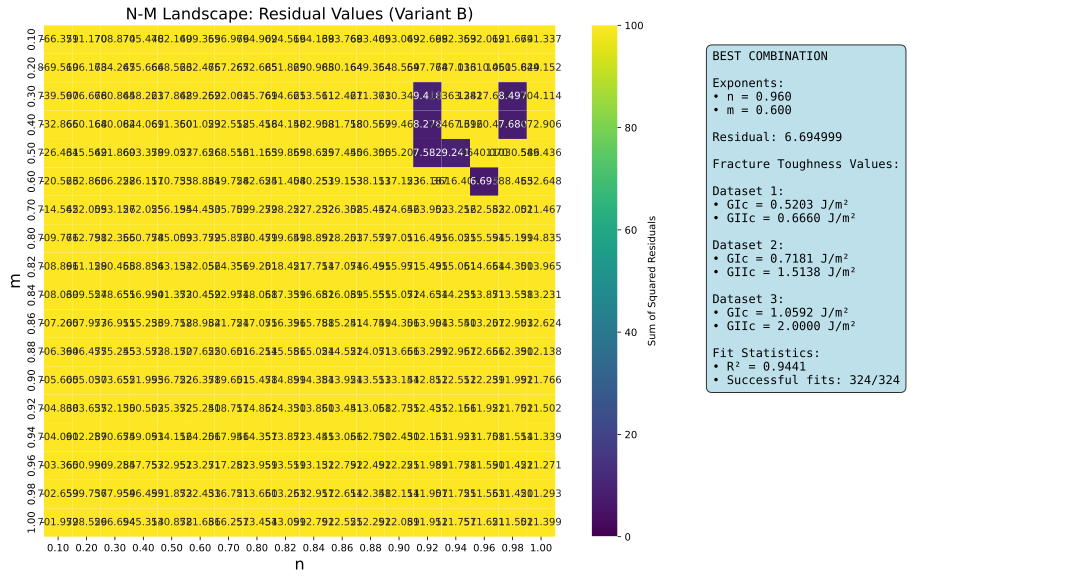


=== ANALYSIS ===
Best with error bars: n=0.96, m=0.60
  Residual: 6.694999
  R²: 0.944


'\nif any(v[\'success\'] for v in results_no_errors.values()):\n    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v[\'success\']], \n                             key=lambda x: x[1][\'residual\'])\n    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")\n    print(f"  Residual: {best_without_errors[1][\'residual\']:.6f}")\n    print(f"  R²: {best_without_errors[1][\'R_squared\']:.3f}")\n    '

In [379]:
# Landscape for the default data - perfect uncertainties

# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}
# 2. Create heatmap with error bars
results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_dft_man_perfect_unc,df2_dft_man_perfect_unc,df3_dft_man_perfect_unc],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_with_errors_bounds2_perfect_unc.png"
)
"""
# 3. Create heatmap without error bars
results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_without_errors_bounds2_perfect_unc.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_dft_man,df2_dft_man,df3_dft_man],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "default_data_landscape_comparison_bounds2_perfect_unc.png"
)
"""

# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in results_with_errors.values()):
    best_with_errors = min([(k, v) for k, v in results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={best_with_errors[0][0]:.2f}, m={best_with_errors[0][1]:.2f}")
    print(f"  Residual: {best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {best_with_errors[1]['R_squared']:.3f}")
"""
if any(v['success'] for v in results_no_errors.values()):
    best_without_errors = min([(k, v) for k, v in results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={best_without_errors[0][0]:.2f}, m={best_without_errors[0][1]:.2f}")
    print(f"  Residual: {best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {best_without_errors[1]['R_squared']:.3f}")
    """

=== CREATING N-M LANDSCAPE HEATMAP ===
Testing 324 exponent combinations...
Testing n=0.10, m=0.10...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.1, m = 0.1
Data assembled successfully:
  Data shape: (118,)
  Degrees of freedom: 112
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.1, m = 0.1
Trying starting point 1: [np.float64(0.20167008973999617), np.float64(0.05517510829760504), np.float64(0.13434048823162406), np.float64(0.09365821750488278), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=12, sum_square=4619.235944
Trying starting point 2: [np.float64(0.3226721435839939), np.float64(0.08828017327616806), np.float64(0.2149447811705985), np.float64(0.14985314800781244), np.float64(0.3097168700169024), np.float64(0.2803701845465449)]
  Result: info=12, sum_square=4619.235944
Trying starting point 3: [np.float64(0.40334017947999234), np.float64(0.11035021659521008), np.float64(0.2686809764632481), np.float6

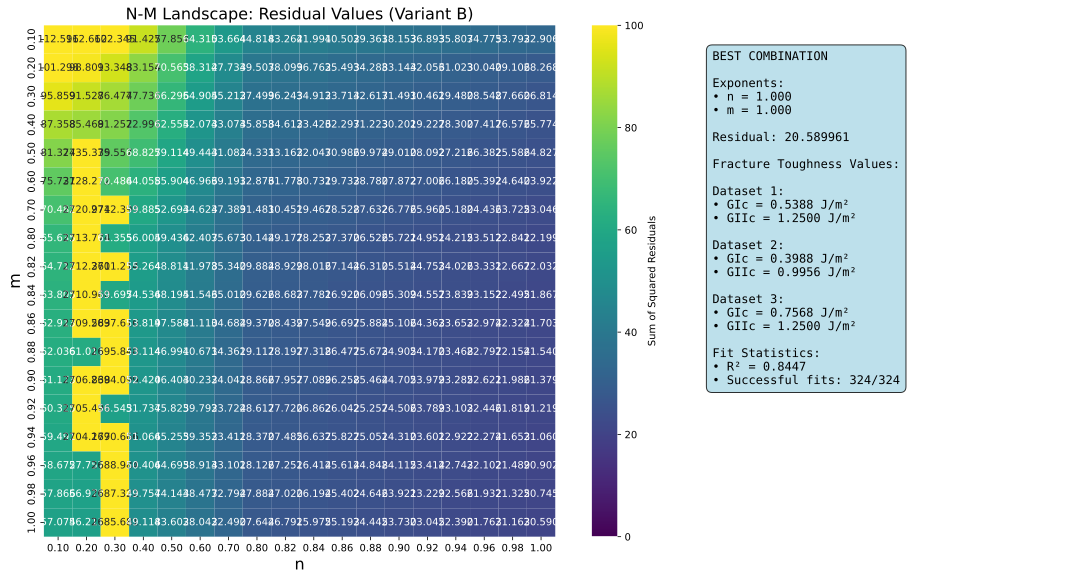


=== ANALYSIS ===
Best with error bars: n=1.00, m=1.00
  Residual: 20.589961
  R²: 0.845


'\nif any(v[\'success\'] for v in opti_results_no_errors.values()):\n    opti_best_without_errors = min([(k, v) for k, v in opti_results_no_errors.items() if v[\'success\']], \n                             key=lambda x: x[1][\'residual\'])\n    print(f"Best without error bars: n={opti_best_without_errors[0][0]:.2f}, m={opti_best_without_errors[0][1]:.2f}")\n    print(f"  Residual: {opti_best_without_errors[1][\'residual\']:.6f}")\n    print(f"  R²: {opti_best_without_errors[1][\'R_squared\']:.3f}")\n'

In [380]:
# Landscape for the new data - minimal error
# 1. Create a comprehensive exponent grid
exponents_to_try = []
n_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
m_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]

for n in n_values:
    for m in m_values:
        exponents_to_try.append((n, m))

my_bounds = {
    'GIc_min': 0.0, 'GIc_max':1.25,
    'GIIc_min': 0.0, 'GIIc_max': 1.25,
}
# 2. Create heatmap with error bars
opti_results_with_errors = reg.create_n_m_landscape_heatmap(
    [df1_ser_vid_perfect_unc,df2_ser_vid_perfect_unc,df3_ser_vid_perfect_unc],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_with_errors_bounds125_perfect_unc.png"
)
"""
# 3. Create heatmap without error bars
opti_results_no_errors = reg.create_n_m_landscape_heatmap_no_errors(
    [df1_ser_vid_cor,df2_ser_vid_cor,df3_ser_vid_cor],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_without_errors_bounds125.png"
)

# 4. Create side-by-side comparison
reg.compare_landscapes_with_without_errors(
    [df1_ser_vid_cor,df2_ser_vid_cor,df3_ser_vid_cor],
    exponents_to_try, var='B', bounds = my_bounds, save_path=save_fig_path + "20250706_Paper1\\fits\\" + "opti_data_landscape_comparison_bounds125.png"
)
"""
# 5. Analyze the results
print("\n=== ANALYSIS ===")
if any(v['success'] for v in opti_results_with_errors.values()):
    opti_best_with_errors = min([(k, v) for k, v in opti_results_with_errors.items() if v['success']], 
                          key=lambda x: x[1]['residual'])
    print(f"Best with error bars: n={opti_best_with_errors[0][0]:.2f}, m={opti_best_with_errors[0][1]:.2f}")
    print(f"  Residual: {opti_best_with_errors[1]['residual']:.6f}")
    print(f"  R²: {opti_best_with_errors[1]['R_squared']:.3f}")
    
"""
if any(v['success'] for v in opti_results_no_errors.values()):
    opti_best_without_errors = min([(k, v) for k, v in opti_results_no_errors.items() if v['success']], 
                             key=lambda x: x[1]['residual'])
    print(f"Best without error bars: n={opti_best_without_errors[0][0]:.2f}, m={opti_best_without_errors[0][1]:.2f}")
    print(f"  Residual: {opti_best_without_errors[1]['residual']:.6f}")
    print(f"  R²: {opti_best_without_errors[1]['R_squared']:.3f}")
"""

In [403]:
# Visualisation for the default perfect fit

#results default data with best outcomes, n = 0.96, m= 0.6
n = 0.96
m= 0.6
my_bounds = {
    'GIc_min': 0.0, 'GIc_max':2.0,
    'GIIc_min': 0.0, 'GIIc_max': 2.0,
}

results = reg.odr_multi_dataset_fixed_exponents(
            [df1_dft_man_perfect_unc, df2_dft_man_perfect_unc, df3_dft_man_perfect_unc], 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )

=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 0.96, m = 0.6
Data assembled successfully:
  Total data points: 119
  Degrees of freedom: 113
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 0.96, m = 0.6
Trying starting point 1: [np.float64(0.22582690511084413), np.float64(0.06019024676734251), np.float64(0.26795133602446053), np.float64(0.2283144627210305), np.float64(0.39996786723109745), np.float64(0.31888829392627566)]
  Result: info=4, sum_square=475.977719
Trying starting point 2: [np.float64(0.3613230481773506), np.float64(0.09630439482774802), np.float64(0.42872213763913686), np.float64(0.36530314035364886), np.float64(0.6399485875697559), np.float64(0.5102212702820411)]
  Result: info=4, sum_square=475.993296
Trying starting point 3: [np.float64(0.45165381022168827), np.float64(0.12038049353468502), np.float64(0.5359026720489211), np.float64(0.456628925442061), np.float64(0.7999357344621949), np.float64(0.6377765878525513)]
  Result: in

C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1575: RuntimeWarning: invalid value encountered in power
  Gii_fit = GIIc * (1 - (G_values/GIc)**(1/n))**(1/(1/m))
C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1608: RuntimeWarning: invalid value encountered in power
  Gii_fit_upper = GIIc_upper * (1 - (G_values/GIc_lower)**(1/n))**(1/(1/m))
C:\Users\walet\Desktop\April_Hackathon_2025\code\visualization.py:1616: RuntimeWarning: invalid value encountered in power
  Gii_fit_lower = GIIc_lower * (1 - (G_values/GIc_upper)**(1/n))**(1/(1/m))



=== Series I (default, manual rc) Confidence Intervals ===
GIc: 0.5203 ± 0.0258 = [0.4945, 0.5461]
GIIc: 0.6660 ± 0.0258 = [0.6402, 0.6917]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0309 to 0.6846
Lower curve range: 0.0074 to 0.6342
Band width range: 0.000190 to 0.132950
Average band width: 0.032909
Plotted confidence interval band for Series I (default, manual rc)

=== Series II (default, manual rc) Confidence Intervals ===
GIc: 0.7181 ± 0.0258 = [0.6923, 0.7438]
GIIc: 1.5138 ± 0.0258 = [1.4880, 1.5396]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0590 to 1.5284
Lower curve range: 0.0199 to 1.4780
Band width range: 0.000273 to 0.258252
Average band width: 0.048622
Plotted confidence interval band for Series II (default, manual rc)

=== Series III (default, manual rc) Confidence Intervals ===
GIc: 1.0592 ± 0.0258 = [1.0334, 1.0849]
GIIc: 2.0000 ± 0.0258 = [1.9742, 2.0258]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve 

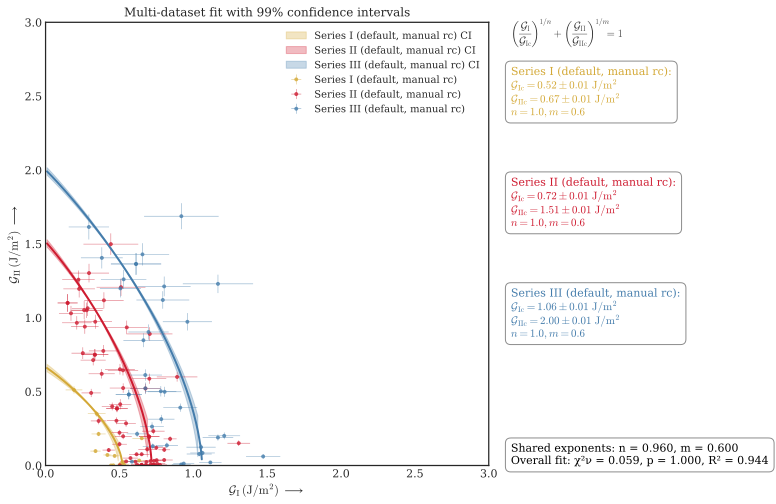

In [404]:
# Example usage with chi-squared statistics
fit_result = results
data_dict_with_ci = {
    'Series I (default, manual rc)': {
        'df': df1_dft_man_perfect_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_1'],
            'GIIc': fit_result['GIIc_1'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_1'],
            'GIIc': fit_result['stddev_GIIc_1'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series II (default, manual rc)': {
        'df': df2_dft_man_perfect_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_2'],
            'GIIc': fit_result['GIIc_2'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_2'],
            'GIIc': fit_result['stddev_GIIc_2'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series III (default, manual rc)': {
        'df': df3_dft_man_perfect_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_3'],
            'GIIc': fit_result['GIIc_3'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_3'],
            'GIIc': fit_result['stddev_GIIc_3'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
}

# Add overall fit statistics
overall_stats = {
    'reduced_chi_squared': fit_result['reduced_chi_squared'],
    'p_value': fit_result['p_value'],
    'R_squared': fit_result['R_squared']
}

# Add to first dataset for overall display
data_dict_with_ci[list(data_dict_with_ci.keys())[0]]['overall_fit_stats'] = overall_stats

fig, ax = vis.plot_multiple_interactionlaws_with_fit(
    data_dict_with_ci, 
    save_fig=save_fig_path + "20250706_Paper1\\fits\\", 
    title="default_manual_bounds2_perfect_unc_n096_m06", 
    Gmax=3.0, 
    colors=colors, ci=0.99
)

In [444]:
save_fig_path

'C:\\Users\\walet\\Desktop\\April_Hackathon_2025\\Fracture_envelope_plots\\'

In [385]:
# fit with the opti data - perfect uncertainty
#results opti data with best outcomes, n = 1, m= 1
n =1
m= 1
my_bounds = {
    'GIc_min': 0.0, 'GIc_max':1.25,
    'GIIc_min': 0.0, 'GIIc_max': 1.25,
}

results = reg.odr_multi_dataset_fixed_exponents(
            [df1_ser_vid_perfect_unc, df2_ser_vid_perfect_unc, df3_ser_vid_perfect_unc], 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )


=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 1, m = 1
Data assembled successfully:
  Data shape: (118,)
  Degrees of freedom: 112
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 1, m = 1
Trying starting point 1: [np.float64(0.20167008973999617), np.float64(0.05517510829760504), np.float64(0.13434048823162406), np.float64(0.09365821750488278), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=12, sum_square=2645.278694
Trying starting point 2: [np.float64(0.3226721435839939), np.float64(0.08828017327616806), np.float64(0.2149447811705985), np.float64(0.14985314800781244), np.float64(0.3097168700169024), np.float64(0.2803701845465449)]
  Result: info=12, sum_square=2645.278683
Trying starting point 3: [np.float64(0.40334017947999234), np.float64(0.11035021659521008), np.float64(0.2686809764632481), np.float64(0.18731643500976555), np.float64(0.387146087521128), np.float64(0.3504627306831811)]
  Result: info=12, sum_


=== Series I (series opt., video rc) Confidence Intervals ===
GIc: 0.5388 ± 0.0258 = [0.5130, 0.5646]
GIIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0005 to 1.2509
Lower curve range: 0.0019 to 1.2026
Band width range: 0.000230 to 0.111643
Average band width: 0.046458
Plotted confidence interval band for Series I (series opt., video rc)

=== Series II (series opt., video rc) Confidence Intervals ===
GIc: 0.3988 ± 0.0258 = [0.3730, 0.4246]
GIIc: 0.9956 ± 0.0258 = [0.9698, 1.0214]
Standard deviations: GIc=0.010000, GIIc=0.010000
Upper curve range: 0.0025 to 0.9940
Lower curve range: 0.0035 to 0.9470
Band width range: 0.000531 to 0.117274
Average band width: 0.048862
Plotted confidence interval band for Series II (series opt., video rc)

=== Series III (series opt., video rc) Confidence Intervals ===
GIc: 0.7568 ± 0.0258 = [0.7310, 0.7825]
GIIc: 1.2500 ± 0.0258 = [1.2242, 1.2758]
Standard deviations: GIc=0.010000, GIIc=0.0100

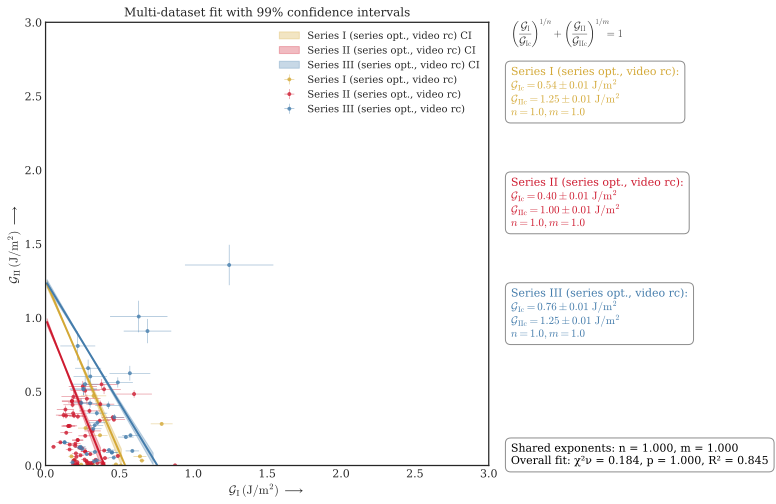

In [387]:
# Example usage with chi-squared statistics
fit_result = results
data_dict_with_ci = {
    'Series I (series opt., video rc)': {
        'df': df1_ser_vid_perfect_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_1'],
            'GIIc': fit_result['GIIc_1'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_1'],
            'GIIc': fit_result['stddev_GIIc_1'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series II (series opt., video rc)': {
        'df': df2_ser_vid_perfect_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_2'],
            'GIIc': fit_result['GIIc_2'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_2'],
            'GIIc': fit_result['stddev_GIIc_2'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
    'Series III (series opt., video rc)': {
        'df': df3_ser_vid_perfect_unc,
        'variant': 'B',
        'fit_params': {
            'GIc': fit_result['GIc_3'],
            'GIIc': fit_result['GIIc_3'],
            'n': fit_result['n'],
            'm': fit_result['m']
        },
        'fit_stddev': {
            'GIc': fit_result['stddev_GIc_3'],
            'GIIc': fit_result['stddev_GIIc_3'],
            'n': fit_result['stddev_n'],
            'm': fit_result['stddev_m']
        }
    },
}

# Add overall fit statistics
overall_stats = {
    'reduced_chi_squared': fit_result['reduced_chi_squared'],
    'p_value': fit_result['p_value'],
    'R_squared': fit_result['R_squared']
}

# Add to first dataset for overall display
data_dict_with_ci[list(data_dict_with_ci.keys())[0]]['overall_fit_stats'] = overall_stats

fig, ax = vis.plot_multiple_interactionlaws_with_fit(
    data_dict_with_ci, 
    save_fig=save_fig_path + "20250706_Paper1\\fits\\", 
    title="opti_video_bounds125_n1_m1_perfect_unc", 
    Gmax=3.0, 
    colors=colors, ci=0.99
)

In [394]:
import numpy as np
import pandas as pd
from uncertainties import ufloat
import sys
import os

# Add the code directory to path
sys.path.append('code')
import regression as reg

def create_clean_dummy_dataset(n=1, m=1, GIc_values=[0.5, 0.6, 0.7], GIIc_values=[0.3, 0.4, 0.5], 
                              n_points_per_dataset=20, noise_level=0.0):
    """
    Create a clean dummy dataset that follows the interaction law exactly.
    
    Parameters:
    -----------
    n, m : float
        Exponents for the interaction law
    GIc_values, GIIc_values : list
        True GIc and GIIc values for each dataset
    n_points_per_dataset : int
        Number of data points per dataset
    noise_level : float
        Standard deviation of noise to add (0.0 for perfect data)
    
    Returns:
    --------
    df_list : list of DataFrames
        List of DataFrames with synthetic data
    """
    
    df_list = []
    
    for dataset_idx, (GIc_true, GIIc_true) in enumerate(zip(GIc_values, GIIc_values)):
        print(f"Creating dataset {dataset_idx + 1} with GIc={GIc_true:.2f}, GIIc={GIIc_true:.2f}")
        
        # Generate Gi values (Mode I fracture toughness)
        Gi_values = np.linspace(0.1 * GIc_true, 0.9 * GIc_true, n_points_per_dataset)
        
        # Calculate corresponding Gii values using the interaction law
        # For Variant B: (Gi/GIc)^(1/n) + (Gii/GIIc)^(1/m) = 1
        # Therefore: Gii = GIIc * (1 - (Gi/GIc)^(1/n))^(1/(1/m))
        
        if n == 1 and m == 1:
            # Simplified case: Gi/GIc + Gii/GIIc = 1
            Gii_values = GIIc_true * (1 - Gi_values/GIc_true)
        else:
            # General case
            Gii_values = GIIc_true * (1 - (Gi_values/GIc_true)**(1/n))**(1/(1/m))
        
        # Add small noise if requested
        if noise_level > 0:
            Gi_noise = np.random.normal(0, noise_level * GIc_true, n_points_per_dataset)
            Gii_noise = np.random.normal(0, noise_level * GIIc_true, n_points_per_dataset)
            Gi_values += Gi_noise
            Gii_values += Gii_noise
            
            # Ensure positive values
            Gi_values = np.maximum(Gi_values, 0.01 * GIc_true)
            Gii_values = np.maximum(Gii_values, 0.01 * GIIc_true)
        
        # Create realistic uncertainties (5-10% for realistic test)
        Gi_uncertainties = 0.05 * GIc_true * np.ones(n_points_per_dataset)  # 5% uncertainty
        Gii_uncertainties = 0.08 * GIIc_true * np.ones(n_points_per_dataset)  # 8% uncertainty
        
        # Create ufloat objects
        Gi_with_unc = [ufloat(gi, gi_unc) for gi, gi_unc in zip(Gi_values, Gi_uncertainties)]
        Gii_with_unc = [ufloat(gii, gii_unc) for gii, gii_unc in zip(Gii_values, Gii_uncertainties)]
        
        # Create DataFrame
        df = pd.DataFrame({
            'GIc': Gi_with_unc,
            'GIIc': Gii_with_unc
        })
        
        df_list.append(df)
        
        print(f"  Dataset {dataset_idx + 1}: {len(df)} points")
        print(f"  Gi range: {Gi_values.min():.3f} - {Gi_values.max():.3f}")
        print(f"  Gii range: {Gii_values.min():.3f} - {Gii_values.max():.3f}")
    
    return df_list

def test_clean_dataset():
    """Test the regression with a clean dummy dataset."""
    
    print("=" * 60)
    print("TESTING WITH CLEAN DUMMY DATASET")
    print("=" * 60)
    
    # Create clean dummy dataset with realistic uncertainties
    print("\n1. Creating clean dummy dataset with realistic uncertainties...")
    df_list = create_clean_dummy_dataset(
        n=1, m=1,  # True exponents
        GIc_values=[0.5, 0.6, 0.7],  # True GIc values
        GIIc_values=[0.3, 0.4, 0.5],  # True GIIc values
        n_points_per_dataset=20,  # Points per dataset
        noise_level=0.0  # No noise for perfect data
    )
    
    print(f"\nCreated {len(df_list)} datasets with {sum(len(df) for df in df_list)} total points")
    
    # Test with fixed exponents (n=1, m=1)
    print("\n2. Running regression with fixed exponents (n=1, m=1)...")
    
    n = 1
    m = 1
    my_bounds = {
        'GIc_min': 0.0, 'GIc_max': 1.25,
        'GIIc_min': 0.0, 'GIIc_max': 1.25,
    }
    
    try:
        results = reg.odr_multi_dataset_fixed_exponents(
            df_list, 
            dim=1, n_fixed=n, m_fixed=m, var='B', print_results=True, bounds=my_bounds
        )
        
        print("\n3. Results Summary:")
        print(f"   Reduced χ² = {results['reduced_chi_squared']:.6f} (should be ≈ 1.0 for perfect fit)")
        print(f"   R² = {results['R_squared']:.6f}")
        print(f"   p-value = {results['p_value']:.6f}")
        
        print("\n4. Fitted Parameters:")
        print(f"   GIc (dataset 1): {results['GIc_1']:.4f} ± {results['stddev_GIc_1']:.4f}")
        print(f"   GIc (dataset 2): {results['GIc_2']:.4f} ± {results['stddev_GIc_2']:.4f}")
        print(f"   GIc (dataset 3): {results['GIc_3']:.4f} ± {results['stddev_GIc_3']:.4f}")
        print(f"   GIIc (dataset 1): {results['GIIc_1']:.4f} ± {results['stddev_GIIc_1']:.4f}")
        print(f"   GIIc (dataset 2): {results['GIIc_2']:.4f} ± {results['stddev_GIIc_2']:.4f}")
        print(f"   GIIc (dataset 3): {results['GIIc_3']:.4f} ± {results['stddev_GIIc_3']:.4f}")
        
        print("\n5. Expected vs Fitted Values:")
        expected_GIc = [0.5, 0.6, 0.7]
        expected_GIIc = [0.3, 0.4, 0.5]
        
        for i in range(3):
            gi_fitted = results[f'GIc_{i+1}']
            gi_expected = expected_GIc[i]
            gii_fitted = results[f'GIIc_{i+1}']
            gii_expected = expected_GIIc[i]
            
            print(f"   Dataset {i+1}:")
            print(f"     GIc: expected {gi_expected:.3f}, fitted {gi_fitted:.3f}, diff {abs(gi_fitted-gi_expected):.6f}")
            print(f"     GIIc: expected {gii_expected:.3f}, fitted {gii_fitted:.3f}, diff {abs(gii_fitted-gii_expected):.6f}")
        
        # Test with different exponents
        print("\n" + "=" * 60)
        print("TESTING WITH DIFFERENT EXPONENTS")
        print("=" * 60)
        
        # Create dataset with n=2, m=2
        print("\n1. Creating dataset with n=2, m=2...")
        df_list_2 = create_clean_dummy_dataset(
            n=2, m=2,  # True exponents
            GIc_values=[0.5, 0.6, 0.7],
            GIIc_values=[0.3, 0.4, 0.5],
            n_points_per_dataset=20,
            noise_level=0.0
        )
        
        # Also test with some noise
        print("\n1b. Creating dataset with n=2, m=2 and small noise...")
        df_list_2_noisy = create_clean_dummy_dataset(
            n=2, m=2,  # True exponents
            GIc_values=[0.5, 0.6, 0.7],
            GIIc_values=[0.3, 0.4, 0.5],
            n_points_per_dataset=20,
            noise_level=0.02  # 2% noise
        )
        
        # Test with wrong exponents (n=1, m=1)
        print("\n2. Running regression with wrong exponents (n=1, m=1)...")
        results_wrong = reg.odr_multi_dataset_fixed_exponents(
            df_list_2, 
            dim=1, n_fixed=1, m_fixed=1, var='B', print_results=True, bounds=my_bounds
        )
        
        print(f"\n3. Results with wrong exponents:")
        print(f"   Reduced χ² = {results_wrong['reduced_chi_squared']:.6f} (should be >> 1.0)")
        print(f"   R² = {results_wrong['R_squared']:.6f}")
        
        # Test with correct exponents (n=2, m=2)
        print("\n4. Running regression with correct exponents (n=2, m=2)...")
        results_correct = reg.odr_multi_dataset_fixed_exponents(
            df_list_2, 
            dim=1, n_fixed=2, m_fixed=2, var='B', print_results=True, bounds=my_bounds
        )
        
        print(f"\n5. Results with correct exponents:")
        print(f"   Reduced χ² = {results_correct['reduced_chi_squared']:.6f} (should be ≈ 1.0)")
        print(f"   R² = {results_correct['R_squared']:.6f}")
        
        print(f"\n6. Comparison:")
        print(f"   Wrong exponents:  Reduced χ² = {results_wrong['reduced_chi_squared']:.6f}")
        print(f"   Correct exponents: Reduced χ² = {results_correct['reduced_chi_squared']:.6f}")
        if results_correct['reduced_chi_squared'] > 0:
            print(f"   Ratio: {results_wrong['reduced_chi_squared']/results_correct['reduced_chi_squared']:.2f}")
        else:
            print(f"   Ratio: Cannot compute (correct reduced χ² = 0)")
        
        # Test with noisy data
        print("\n7. Testing with noisy data (n=2, m=2 data with n=2, m=2 model)...")
        results_noisy = reg.odr_multi_dataset_fixed_exponents(
            df_list_2_noisy, 
            dim=1, n_fixed=2, m_fixed=2, var='B', print_results=True, bounds=my_bounds
        )
        
        print(f"\n8. Results with noisy data:")
        print(f"   Reduced χ² = {results_noisy['reduced_chi_squared']:.6f} (should be ≈ 1.0)")
        print(f"   R² = {results_noisy['R_squared']:.6f}")
        
    except Exception as e:
        print(f"Error during regression: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    test_clean_dataset()

TESTING WITH CLEAN DUMMY DATASET

1. Creating clean dummy dataset with realistic uncertainties...
Creating dataset 1 with GIc=0.50, GIIc=0.30
  Dataset 1: 20 points
  Gi range: 0.050 - 0.450
  Gii range: 0.030 - 0.270
Creating dataset 2 with GIc=0.60, GIIc=0.40
  Dataset 2: 20 points
  Gi range: 0.060 - 0.540
  Gii range: 0.040 - 0.360
Creating dataset 3 with GIc=0.70, GIIc=0.50
  Dataset 3: 20 points
  Gi range: 0.070 - 0.630
  Gii range: 0.050 - 0.450

Created 3 datasets with 60 total points

2. Running regression with fixed exponents (n=1, m=1)...
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 1, m = 1
Data assembled successfully:
  Total data points: 60
  Degrees of freedom: 54
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 1, m = 1
Trying starting point 1: [np.float64(0.125), np.float64(0.075), np.float64(0.15000000000000002), np.float64(0.09999999999999999), np.float64(0.175), np.float64(0.12499999999999997)]
  Result: info=2, sum_square

In [396]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'exp_id', 'date',
       'datetime_x', 'fieldsite', 'slope_incl', 'h_wl_notch', 'h_wl_sledge',
       ...
       'GIc_manual_default_perfect_unc', 'GIIc_manual_default_perfect_unc',
       'Gc_manual_default_perfect_unc', 'GIIG_manual_default_perfect_unc',
       'slope_incl_perfect_unc', 'surface_lineload_perfect_unc',
       'GIc_video_seriesopt_perfect_unc', 'GIIc_video_seriesopt_perfect_unc',
       'Gc_video_seriesopt_perfect_unc', 'GIIG_video_seriesopt_perfect_unc'],
      dtype='object', length=112)

In [397]:
# Print the uncertainties in your real data
for i, df in enumerate([df1_ser_vid_perfect_unc, df2_ser_vid_perfect_unc, df3_ser_vid_perfect_unc]):
    print(f"Dataset {i+1}:")
    gi_uncertainties = df['GIc'].apply(lambda x: x.std_dev).values
    gii_uncertainties = df['GIIc'].apply(lambda x: x.std_dev).values
    print(f"  Gi uncertainties: {gi_uncertainties.mean():.4f} ± {gi_uncertainties.std():.4f}")
    print(f"  Gii uncertainties: {gii_uncertainties.mean():.4f} ± {gii_uncertainties.std():.4f}")

Dataset 1:
  Gi uncertainties: 0.0339 ± 0.0241
  Gii uncertainties: 0.0044 ± 0.0043
Dataset 2:
  Gi uncertainties: 0.0428 ± 0.0283
  Gii uncertainties: 0.0102 ± 0.0108
Dataset 3:
  Gi uncertainties: 0.0733 ± 0.0554
  Gii uncertainties: 0.0282 ± 0.0330


In [398]:
# Calculate the actual scatter in your data
for i, df in enumerate([df1_ser_vid_perfect_unc, df2_ser_vid_perfect_unc, df3_ser_vid_perfect_unc]):
    gi_values = df['GIc'].apply(lambda x: x.nominal_value).values
    gii_values = df['GIIc'].apply(lambda x: x.nominal_value).values
    print(f"Dataset {i+1}:")
    print(f"  Gi scatter: {gi_values.std():.4f} (CV: {gi_values.std()/gi_values.mean():.2%})")
    print(f"  Gii scatter: {gii_values.std():.4f} (CV: {gii_values.std()/gii_values.mean():.2%})")

Dataset 1:
  Gi scatter: 0.1858 (CV: 46.06%)
  Gii scatter: 0.1412 (CV: 127.97%)
Dataset 2:
  Gi scatter: 0.1240 (CV: 46.14%)
  Gii scatter: 0.1711 (CV: 91.34%)
Dataset 3:
  Gi scatter: 0.2002 (CV: 51.72%)
  Gii scatter: 0.3101 (CV: 88.49%)


In [401]:
df["GIc"]

84       0.35+/-0.06
85       0.63+/-0.19
86       0.57+/-0.14
87       0.42+/-0.09
88     0.279+/-0.031
89       0.33+/-0.04
90       0.47+/-0.07
91     0.231+/-0.033
92     0.183+/-0.019
93       0.45+/-0.04
94     0.329+/-0.022
95       0.22+/-0.12
96       0.69+/-0.16
97       0.49+/-0.10
98       0.26+/-0.09
99       0.26+/-0.09
100      0.29+/-0.09
101      0.43+/-0.04
102    0.247+/-0.032
103      0.32+/-0.06
104      0.35+/-0.07
105      0.30+/-0.08
106      0.27+/-0.09
107      0.59+/-0.05
108      0.33+/-0.06
109    0.237+/-0.034
110      0.57+/-0.06
111      0.54+/-0.05
112    0.347+/-0.027
113    0.129+/-0.029
114    0.129+/-0.029
115      0.45+/-0.04
116      0.24+/-0.07
117      0.30+/-0.11
118    0.461+/-0.033
119      1.24+/-0.30
Name: GIc, dtype: object

In [402]:
def analyze_dataset_uncertainties_vs_scatter(df_list, dataset_names=None):
    """Analyze uncertainties vs scatter for each dataset separately"""
    
    if dataset_names is None:
        dataset_names = [f"Dataset {i+1}" for i in range(len(df_list))]
    
    for i, (df, name) in enumerate(zip(df_list, dataset_names)):
        print(f"\n{'='*50}")
        print(f"{name}")
        print(f"{'='*50}")
        
        # Extract values and uncertainties
        gi_values = df['GIc'].apply(lambda x: x.nominal_value).values
        gii_values = df['GIIc'].apply(lambda x: x.nominal_value).values
        gi_uncertainties = df['GIc'].apply(lambda x: x.std_dev).values
        gii_uncertainties = df['GIIc'].apply(lambda x: x.std_dev).values
        
        # Calculate statistics
        gi_mean = gi_values.mean()
        gii_mean = gii_values.mean()
        gi_std = gi_values.std()
        gii_std = gii_values.std()
        
        gi_unc_mean = gi_uncertainties.mean()
        gii_unc_mean = gii_uncertainties.mean()
        
        print(f"Gi (Mode I fracture toughness):")
        print(f"  Mean value: {gi_mean:.4f}")
        print(f"  Standard deviation (scatter): {gi_std:.4f}")
        print(f"  Mean uncertainty: {gi_unc_mean:.4f}")
        print(f"  Scatter/Uncertainty ratio: {gi_std/gi_unc_mean:.1f}")
        print(f"  Uncertainty as % of mean: {gi_unc_mean/gi_mean:.1%}")
        print(f"  Scatter as % of mean: {gi_std/gi_mean:.1%}")
        
        print(f"\nGii (Mode II fracture toughness):")
        print(f"  Mean value: {gii_mean:.4f}")
        print(f"  Standard deviation (scatter): {gii_std:.4f}")
        print(f"  Mean uncertainty: {gii_unc_mean:.4f}")
        print(f"  Scatter/Uncertainty ratio: {gii_std/gii_unc_mean:.1f}")
        print(f"  Uncertainty as % of mean: {gii_unc_mean/gii_mean:.1%}")
        print(f"  Scatter as % of mean: {gii_std/gii_mean:.1%}")
        
        # Check individual points
        print(f"\nIndividual point analysis:")
        print(f"  Gi uncertainties range: {gi_uncertainties.min():.4f} - {gi_uncertainties.max():.4f}")
        print(f"  Gii uncertainties range: {gii_uncertainties.min():.4f} - {gii_uncertainties.max():.4f}")
        
        # Check if uncertainties vary systematically
        if len(gi_values) > 5:
            print(f"\nUncertainty vs value correlation:")
            gi_corr = np.corrcoef(gi_values, gi_uncertainties)[0,1]
            gii_corr = np.corrcoef(gii_values, gii_uncertainties)[0,1]
            print(f"  Gi uncertainty-value correlation: {gi_corr:.3f}")
            print(f"  Gii uncertainty-value correlation: {gii_corr:.3f}")

# Run the analysis
analyze_dataset_uncertainties_vs_scatter(
    [df1_ser_vid_perfect_unc, df2_ser_vid_perfect_unc, df3_ser_vid_perfect_unc],
    ["Dataset 1", "Dataset 2", "Dataset 3"]
)


Dataset 1
Gi (Mode I fracture toughness):
  Mean value: 0.4033
  Standard deviation (scatter): 0.1858
  Mean uncertainty: 0.0339
  Scatter/Uncertainty ratio: 5.5
  Uncertainty as % of mean: 8.4%
  Scatter as % of mean: 46.1%

Gii (Mode II fracture toughness):
  Mean value: 0.1104
  Standard deviation (scatter): 0.1412
  Mean uncertainty: 0.0044
  Scatter/Uncertainty ratio: 31.9
  Uncertainty as % of mean: 4.0%
  Scatter as % of mean: 128.0%

Individual point analysis:
  Gi uncertainties range: 0.0092 - 0.0859
  Gii uncertainties range: 0.0002 - 0.0178

Uncertainty vs value correlation:
  Gi uncertainty-value correlation: 0.289
  Gii uncertainty-value correlation: 0.920

Dataset 2
Gi (Mode I fracture toughness):
  Mean value: 0.2687
  Standard deviation (scatter): 0.1240
  Mean uncertainty: 0.0428
  Scatter/Uncertainty ratio: 2.9
  Uncertainty as % of mean: 15.9%
  Scatter as % of mean: 46.1%

Gii (Mode II fracture toughness):
  Mean value: 0.1873
  Standard deviation (scatter): 0.1711

In [443]:
# Run the analysis
analyze_dataset_uncertainties_vs_scatter(
    [df1_ser_vid_min_error, df2_ser_vid_min_error, df3_ser_vid_min_error],
    ["Dataset 1", "Dataset 2", "Dataset 3"]
)


Dataset 1
Gi (Mode I fracture toughness):
  Mean value: 0.6321
  Standard deviation (scatter): 0.8441
  Mean uncertainty: 0.0723
  Scatter/Uncertainty ratio: 11.7
  Uncertainty as % of mean: 11.4%
  Scatter as % of mean: 133.5%

Gii (Mode II fracture toughness):
  Mean value: 0.2242
  Standard deviation (scatter): 0.4325
  Mean uncertainty: 0.0105
  Scatter/Uncertainty ratio: 41.1
  Uncertainty as % of mean: 4.7%
  Scatter as % of mean: 192.9%

Individual point analysis:
  Gi uncertainties range: 0.0092 - 0.5746
  Gii uncertainties range: 0.0002 - 0.0911

Uncertainty vs value correlation:
  Gi uncertainty-value correlation: 0.974
  Gii uncertainty-value correlation: 0.986

Dataset 2
Gi (Mode I fracture toughness):
  Mean value: 0.3015
  Standard deviation (scatter): 0.2993
  Mean uncertainty: 0.0446
  Scatter/Uncertainty ratio: 6.7
  Uncertainty as % of mean: 14.8%
  Scatter as % of mean: 99.3%

Gii (Mode II fracture toughness):
  Mean value: 0.1942
  Standard deviation (scatter): 0.1

In [405]:
analyze_dataset_uncertainties_vs_scatter(
    [df1_dft_man_perfect_unc, df2_dft_man_perfect_unc, df3_dft_man_perfect_unc],
    ["Dataset 1", "Dataset 2", "Dataset 3"]
)


Dataset 1
Gi (Mode I fracture toughness):
  Mean value: 0.4517
  Standard deviation (scatter): 0.1206
  Mean uncertainty: 0.0378
  Scatter/Uncertainty ratio: 3.2
  Uncertainty as % of mean: 8.4%
  Scatter as % of mean: 26.7%

Gii (Mode II fracture toughness):
  Mean value: 0.1204
  Standard deviation (scatter): 0.1508
  Mean uncertainty: 0.0086
  Scatter/Uncertainty ratio: 17.5
  Uncertainty as % of mean: 7.2%
  Scatter as % of mean: 125.3%

Individual point analysis:
  Gi uncertainties range: 0.0187 - 0.0637
  Gii uncertainties range: 0.0005 - 0.0247

Uncertainty vs value correlation:
  Gi uncertainty-value correlation: -0.140
  Gii uncertainty-value correlation: 0.965

Dataset 2
Gi (Mode I fracture toughness):
  Mean value: 0.5359
  Standard deviation (scatter): 0.2119
  Mean uncertainty: 0.0769
  Scatter/Uncertainty ratio: 2.8
  Uncertainty as % of mean: 14.3%
  Scatter as % of mean: 39.5%

Gii (Mode II fracture toughness):
  Mean value: 0.4566
  Standard deviation (scatter): 0.432

In [406]:
def test_model_adequacy_with_scatter_uncertainties(df_list):
    """Test model adequacy using scatter-based uncertainties"""
    
    df_list_scatter = []
    for i, df in enumerate(df_list):
        df_new = df.copy()
        
        # Calculate scatter-based uncertainties (10% of scatter)
        gi_values = df['GIc'].apply(lambda x: x.nominal_value).values
        gii_values = df['GIIc'].apply(lambda x: x.nominal_value).values
        
        gi_unc = gi_values.std() * 0.1
        gii_unc = gii_values.std() * 0.1
        
        # Create new ufloat objects
        new_gi = [ufloat(val, gi_unc) for val in gi_values]
        new_gii = [ufloat(val, gii_unc) for val in gii_values]
        
        df_new['GIc'] = new_gi
        df_new['GIIc'] = new_gii
        
        df_list_scatter.append(df_new)
        
        print(f"Dataset {i+1} scatter-based test:")
        print(f"  Gi scatter uncertainty: {gi_unc:.4f} ({gi_unc/gi_values.mean():.1%} of mean)")
        print(f"  Gii scatter uncertainty: {gii_unc:.4f} ({gii_unc/gii_values.mean():.1%} of mean)")
    
    # Run regression with scatter-based uncertainties
    results = reg.odr_multi_dataset_fixed_exponents(
        df_list_scatter, 
        dim=1, n_fixed=1, m_fixed=1, var='B', print_results=True, bounds=my_bounds
    )
    
    print(f"\nModel adequacy test:")
    print(f"  Reduced χ² = {results['reduced_chi_squared']:.3f}")
    print(f"  R² = {results['R_squared']:.3f}")
    
    return results

# Test model adequacy
adequacy_results = test_model_adequacy_with_scatter_uncertainties([df1_ser_vid_perfect_unc, df2_ser_vid_perfect_unc, df3_ser_vid_perfect_unc])

Dataset 1 scatter-based test:
  Gi scatter uncertainty: 0.0186 (4.6% of mean)
  Gii scatter uncertainty: 0.0141 (12.8% of mean)
Dataset 2 scatter-based test:
  Gi scatter uncertainty: 0.0124 (4.6% of mean)
  Gii scatter uncertainty: 0.0171 (9.1% of mean)
Dataset 3 scatter-based test:
  Gi scatter uncertainty: 0.0200 (5.2% of mean)
  Gii scatter uncertainty: 0.0310 (8.8% of mean)
=== MULTI-DATASET REGRESSION WITH FIXED EXPONENTS ===
Fixed exponents: n = 1, m = 1
Data assembled successfully:
  Total data points: 118
  Degrees of freedom: 112
  Free parameters: 6 (3 GIc + 3 GIIc)
  Fixed parameters: n = 1, m = 1
Trying starting point 1: [np.float64(0.20167008973999617), np.float64(0.05517510829760504), np.float64(0.13434048823162406), np.float64(0.09365821750488278), np.float64(0.193573043760564), np.float64(0.17523136534159056)]
  Result: info=12, sum_square=11342.565438
Trying starting point 2: [np.float64(0.3226721435839939), np.float64(0.08828017327616806), np.float64(0.21494478117059